In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/proj005-p01-nyc-citibike-ds-20230731/nyc_citibike_trip_2014_2015_20230801_v1.csv


<img style="float:left" src="https://i.imgur.com/DWQOJgU.png" width="1500">

<h1 style="text-alignment:justify">NYC Citibike Trips</h1>
<hr>
04 Aug 2023

<div>
<img style="float: left" src="https://i.postimg.cc/qvZpHzhk/002-Img-Objectives-Draft-2-20220819.png(https://postimg.cc/cvYpQ1Bj)" width="75">
<h2 id="Obj1">Objectives</h2>
<hr>

<h3 style="text-align:justify">In this project, we will walk through the Data Analytics process, starting from data acquisition and analysis, to gaining business insights and creating models using BigQuery with SQL and Python. The case study will showcase data analyst, business intelligence, and data science analyses to acquire valuable business insights.
<br><br>
The New York Citibike Cyclistic's Customer Growth Team is developing a business plan for the next year (2016). Therefore, the case study will only utilize data from 2014 and 2015. The team's primary objective is to understand how their customers are using their bikes, with a focus on identifying customer demand at different station locations. The key question is: How can we apply customer usage insights to inform new station growth?<br><br>
After part 1 (P01) we have cleaned the data, in this part 2 (P02), we will concentrate on data mining, and part 3 (P03) we will continue creating predictive models on the demand side. The goal of data mining is to gain a deeper understanding of the data and to use this knowledge to make informed decisions, create predictive models, or find valuable patterns and trends for valuable insights. <b>Develop machine learning models that predicts citibike total trip or trip durations based on location and time of day.</b>
</h3> 
<p style = "font-family: Arial; font-size: 18px">Note: This project's dataset was created for pedagogical purposes and may not represent real-world data. The project consists of multiple notebook parts, focusing on combining data from various tables and conducting data analysis and prediction to acquire valuable insights.</p>    
</div> 

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Remember:</b><p style = "font-family:Verdana; font-size:14px">We must be <b>objective</b> in analyzing the data in order to acquire valuable insights and understand it by collecting, fact checking or challenging the data and other sources. Go to where the data - Genchi Genbutsu attitudes. Data must be <b>Clear, Objective, Valuable, Focus, Agile, Scientific and Timeframe (COV-FAST)</b></p>
    <p style = "font-family:Verdana; font-size:14px">There are methodologies to be considered logistic regression, random forest or neural networking. We can use the same preprocessing dataset and try each options methodologies in seperate notebooks</p>
</div>
    <h3>Methodologies Overview</h3>
<h3>Data Analysis PACE Steps:</h3>
   <ol style="font-family:Verdana; font-size:16px">
    <li><img style="float:left" src="https://i.imgur.com/gIne5bH.png" width="50"> Define (Plan & Analyze - EDA) - PART 1</li> 
    <blockquote>
    <ol>Understand your data in the problem context
        <br>EDA - check model, assumption & select model
    </ol>
    </blockquote>
        <li><img style="float:left" src="https://i.imgur.com/rb8V6X5.png" width="50">Measure (Analyze - EDA)</li>
    <blockquote>
    <ol> EDA - check model, assumption & select model
     </ol>
    </blockquote>
    <li><img style="float:left" src="https://i.imgur.com/J4M3HKM.png" width="50">Analyze (Construct) </li>
    <blockquote>
    <ol>Contruct and evaluate model
     </ol>
    </blockquote>
    <li><img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50">Improve (Execute) - interpret model and share the story</li>
    <br>
    <li>Control</li>   

# Methodologies Overview
<hr>

<h3 style = "text-align:center">Table 1.1. DMAIC vs Data Analytics Methodologies (Define)</h3>
<table style="color:black;
           display:fill;
           border-colapse: colapse;
           width: 100%;
           border: 1px solid black;
           border-collapse: collapse;
           border-style: solid;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
  <tr>
    <th colspan="5">Six Sigma DMAIC 12 Steps</th>
  </tr>
    
  <tr>
        <th colspan="2"><em>Define</em></th>
    <th colspan="3">Customer expectations of the process? </th>
  </tr>
    
  <tr>
    <th>Steps</th>
    <th>Description</th>
    <th>Focus</th>
    <th>Tools</th>
    <th>Timeline</th>
  </tr>
    
  <tr>
    <td style ="text-align:left" >A
      </td>
    <td>Identify Project's CTQ</td>
    <td style = "text-align:center">      
      Y 
    </td>
    <td style ="text-align:left">
      CTQ drill down tree, 
        VOC, Pareto, Bar Chart 
    </td>
      <td style ="text-align:center">
      3 - 5 days 
    </td>
  </tr>
    
  <tr>
    <td style ="text-align:left" >B
      </td>
    <td>Define Process Mapping</td>
    <td style = "text-align:center">      
     Y
    </td>
    <td style ="text-align:left">
     SIPOC
    </td>
    <td style ="text-align:center">
      3 - 5 days 
    </td>
  </tr>
    
  <tr>
    <td style ="text-align:left" >C
      </td>
    <td>Establish The Team's Charter</td>
    <td style = "text-align:center">      
     Y
    </td>
    <td style ="text-align:left">
     Milestones, Team Members, Stakeholders, Project Charter 
    </td>
    <td style ="text-align:center">
      3 - 5 days 
    </td>
  </tr>
    
<tr style = "border-top: solid ">
    <th colspan="5">Data Analytics 6 Steps - Project Initiation and Planning Phase</th>
  </tr>
    
 <tr>
        <th colspan="2"><em>Ask and Prepare</em></th>
    <th colspan="3">Customer expectations of the process? </th>
 </tr>
    
  <tr>
    <th>Steps</th>
    <th>Description</th>
    <th>Focus</th>
    <th>Tools</th>
    <th>Timeline</th>
  </tr>
    
  <tr>
    <td style ="text-align:left" >Ask - Mining
      </td>
    <td>A Clear Statement of The Business Task</td>
    <td style = "text-align:center">      
      Y 
    </td>
    <td style ="text-align:left">
      CTQ drill down tree, 
        VOC, Pareto, Bar Chart  
    </td>
    <td style ="text-align:center">
      3 - 5 days 
    </td>
  </tr>
    
  <tr>
    <td style ="text-align:left" >Ask - Mining
      </td>
    <td>Mapping Key Stakholders</td>
    <td style = "text-align:center">      
     Y
    </td>
    <td style ="text-align:left">
     RACI Matrix
    </td>
    <td style ="text-align:center">
      3 - 5 days 
    </td>
  </tr>
    
  <tr>
    <td style ="text-align:left" >Prepare
      </td>
    <td>A Description of All Data Used</td>
    <td style = "text-align:center">      
     Y
    </td>
    <td style ="text-align:left">
     Data Preparation or Mining 
    </td>
    <td style ="text-align:center">
      3 - 5 days 
    </td>
  </tr>
    
 </table>

<img style="float:left" src="https://i.imgur.com/gIne5bH.png" width="80">

# Import the relevant libraries

In [2]:
# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Preprocessing
### Load the data

In [3]:
raw_data=pd.read_csv('/kaggle/input/proj005-p01-nyc-citibike-ds-20230731/nyc_citibike_trip_2014_2015_20230801_v1.csv')

In [4]:
df = raw_data.copy()

In [5]:
df.head()

user_type  bike_id       neighborhood_start borough_start  trip_duration  \
0  Subscriber  16909.0           Midtown Center     Manhattan       5.216667   
1  Subscriber  16800.0                 Union Sq     Manhattan       3.416667   
2  Subscriber  18404.0  Two Bridges/Seward Park     Manhattan       4.416667   
3  Subscriber  16331.0            Midtown South     Manhattan       6.216667   
4  Subscriber  18661.0  Greenwich Village North     Manhattan      16.083333   

         date           start_time  start_station_id     start_station_name  \
0  2015-07-09  2015-07-09 15:42:30             520.0        W 52 St & 5 Ave   
1  2015-07-09  2015-07-09 14:00:51             168.0        W 18 St & 6 Ave   
2  2015-07-09  2015-07-09 07:54:55             350.0  Clinton St & Grand St   
3  2015-07-09  2015-07-09 15:36:21             485.0        W 37 St & 5 Ave   
4  2015-07-09  2015-07-09 09:29:18             345.0        W 13 St & 6 Ave   

   start_station_latitude  start_station_longitude           neighborhood_end  \
0               40.759923               -73.976485  Times Sq/Theatre District   
1               40.739713               -73.994564                   Flatiron   
2               40.715595               -73.987030    Two Bridges/Seward Park   
3               40.750380               -73.983390             Midtown Center   
4               40.736494               -73.997044             Midtown Center   

  borough_end            stop_time  end_station_id      end_station_name  \
0   Manhattan  2015-07-09 15:47:44           493.0       W 45 St & 6 Ave   
1   Manhattan  2015-07-09 14:04:17           334.0       W 20 St & 7 Ave   
2   Manhattan  2015-07-09 07:59:21           400.0  Pitt St & Stanton St   
3   Manhattan  2015-07-09 15:42:35           524.0       W 43 St & 6 Ave   
4   Manhattan  2015-07-09 09:45:24           524.0       W 43 St & 6 Ave   

   end_station_latitude  end_station_longitude  birth_year     sex   age  \
0             40.756800             -73.982912  1968-01-01  female  47.5   
1             40.742388             -73.997262  1970-01-01  female  45.5   
2             40.719261             -73.981780  1954-01-01    male  61.5   
3             40.755273             -73.983169  1960-01-01    male  55.5   
4             40.755273             -73.983169  1987-01-01  female  28.5   

   zip_code_start  zip_code_end  temp  wdsp  prcp  fog  rain_drizzle  \
0           10103         10036  74.7   3.6   0.0    0             1   
1           10011         10011  74.7   3.6   0.0    0             1   
2           10002         10002  74.7   3.6   0.0    0             1   
3           10018         10110  74.7   3.6   0.0    0             1   
4           10011         10110  74.7   3.6   0.0    0             1   

   snow_ice_pellets  hail  thunder  tornado_funnel_cloud  
0                 0     0        0                     0  
1                 0     0        0                     0  
2                 0     0        0                     0  
3                 0     0        0                     0  
4                 0     0        0                     0

In [6]:
df.describe(include='all').transpose()

count  unique                  top    freq  \
user_type                  168203       2           Subscriber  148884   
bike_id                  168203.0     NaN                  NaN     NaN   
neighborhood_start         168203      70         East Chelsea   11048   
borough_start              168203       3            Manhattan  154308   
trip_duration            168203.0     NaN                  NaN     NaN   
date                       168203     698           2015-10-08     522   
start_time                 168203  165833  2015-06-08 18:18:00       5   
start_station_id         168203.0     NaN                  NaN     NaN   
start_station_name         168203     493      8 Ave & W 31 St    1938   
start_station_latitude   168203.0     NaN                  NaN     NaN   
start_station_longitude  168203.0     NaN                  NaN     NaN   
neighborhood_end           168203      70         East Chelsea   10838   
borough_end                168203       3            Manhattan  154120   
stop_time                  168203  165798  2015-06-30 17:44:00       5   
end_station_id           168203.0     NaN                  NaN     NaN   
end_station_name           168203     494   E 17 St & Broadway    1701   
end_station_latitude     168203.0     NaN                  NaN     NaN   
end_station_longitude    168203.0     NaN                  NaN     NaN   
birth_year                 168203      73           1979-01-01   23862   
sex                        168203       3                 male  114472   
age                      168203.0     NaN                  NaN     NaN   
zip_code_start           168203.0     NaN                  NaN     NaN   
zip_code_end             168203.0     NaN                  NaN     NaN   
temp                     168203.0     NaN                  NaN     NaN   
wdsp                     168203.0     NaN                  NaN     NaN   
prcp                     168203.0     NaN                  NaN     NaN   
fog                      168203.0     NaN                  NaN     NaN   
rain_drizzle             168203.0     NaN                  NaN     NaN   
snow_ice_pellets         168203.0     NaN                  NaN     NaN   
hail                     168203.0     NaN                  NaN     NaN   
thunder                  168203.0     NaN                  NaN     NaN   
tornado_funnel_cloud     168203.0     NaN                  NaN     NaN   

                                 mean         std        min        25%  \
user_type                         NaN         NaN        NaN        NaN   
bike_id                  18775.676956  2586.96839    14529.0    16587.0   
neighborhood_start                NaN         NaN        NaN        NaN   
borough_start                     NaN         NaN        NaN        NaN   
trip_duration               14.224354   23.091919        1.0        6.5   
date                              NaN         NaN        NaN        NaN   
start_time                        NaN         NaN        NaN        NaN   
start_station_id           510.067377  544.936094       72.0      307.0   
start_station_name                NaN         NaN        NaN        NaN   
start_station_latitude       40.73468    0.019731  40.678907  40.721101   
start_station_longitude    -73.990528    0.013106 -74.017134 -73.999947   
neighborhood_end                  NaN         NaN        NaN        NaN   
borough_end                       NaN         NaN        NaN        NaN   
stop_time                         NaN         NaN        NaN        NaN   
end_station_id             507.961344   539.21662       72.0      307.0   
end_station_name                  NaN         NaN        NaN        NaN   
end_station_latitude        40.734453    0.019689  40.678907  40.720874   
end_station_longitude      -73.990655    0.013126 -74.017134  -74.00004   
birth_year                        NaN         NaN        NaN        NaN   
sex                               NaN         NaN        NaN        NaN   
age       

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168203 entries, 0 to 168202
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_type                168203 non-null  object 
 1   bike_id                  168203 non-null  float64
 2   neighborhood_start       168203 non-null  object 
 3   borough_start            168203 non-null  object 
 4   trip_duration            168203 non-null  float64
 5   date                     168203 non-null  object 
 6   start_time               168203 non-null  object 
 7   start_station_id         168203 non-null  float64
 8   start_station_name       168203 non-null  object 
 9   start_station_latitude   168203 non-null  float64
 10  start_station_longitude  168203 non-null  float64
 11  neighborhood_end         168203 non-null  object 
 12  borough_end              168203 non-null  object 
 13  stop_time                168203 non-null  object 
 14  end_

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">The data types related to dates are not in the datetime format. Instead, the data types in this dataframe are object, float64, and int64.<p>
</div>

### Date

In [8]:
# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

In [9]:
type(df['date'][0])

str

In [10]:
type(df['birth_year'][0])

str

In [11]:
type(df['start_time'][0])

str

In [12]:
# Get the date
#df['date'] = df['date'].apply(lambda Date: Date[:10]) #take 0-10 which is Date str
# Convert 'date' column to datetime format with the correct format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [13]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# Create trip duration
# Convert `tpep_pickup_datetime` to datetime format
df['start_time']=pd.to_datetime(df['start_time'], format = '%Y-%m-%d %H:%M:%S')

# Convert `tpep_dropoff_datetime` to datetime format
df['stop_time']=pd.to_datetime(df['stop_time'], format = '%Y-%m-%d %H:%M:%S')

df.head()

user_type  bike_id       neighborhood_start borough_start  trip_duration  \
0  Subscriber  16909.0           Midtown Center     Manhattan       5.216667   
1  Subscriber  16800.0                 Union Sq     Manhattan       3.416667   
2  Subscriber  18404.0  Two Bridges/Seward Park     Manhattan       4.416667   
3  Subscriber  16331.0            Midtown South     Manhattan       6.216667   
4  Subscriber  18661.0  Greenwich Village North     Manhattan      16.083333   

        date          start_time  start_station_id     start_station_name  \
0 2015-07-09 2015-07-09 15:42:30             520.0        W 52 St & 5 Ave   
1 2015-07-09 2015-07-09 14:00:51             168.0        W 18 St & 6 Ave   
2 2015-07-09 2015-07-09 07:54:55             350.0  Clinton St & Grand St   
3 2015-07-09 2015-07-09 15:36:21             485.0        W 37 St & 5 Ave   
4 2015-07-09 2015-07-09 09:29:18             345.0        W 13 St & 6 Ave   

   start_station_latitude  start_station_longitude           neighborhood_end  \
0               40.759923               -73.976485  Times Sq/Theatre District   
1               40.739713               -73.994564                   Flatiron   
2               40.715595               -73.987030    Two Bridges/Seward Park   
3               40.750380               -73.983390             Midtown Center   
4               40.736494               -73.997044             Midtown Center   

  borough_end           stop_time  end_station_id      end_station_name  \
0   Manhattan 2015-07-09 15:47:44           493.0       W 45 St & 6 Ave   
1   Manhattan 2015-07-09 14:04:17           334.0       W 20 St & 7 Ave   
2   Manhattan 2015-07-09 07:59:21           400.0  Pitt St & Stanton St   
3   Manhattan 2015-07-09 15:42:35           524.0       W 43 St & 6 Ave   
4   Manhattan 2015-07-09 09:45:24           524.0       W 43 St & 6 Ave   

   end_station_latitude  end_station_longitude  birth_year     sex   age  \
0             40.756800             -73.982912  1968-01-01  female  47.5   
1             40.742388             -73.997262  1970-01-01  female  45.5   
2             40.719261             -73.981780  1954-01-01    male  61.5   
3             40.755273             -73.983169  1960-01-01    male  55.5   
4             40.755273             -73.983169  1987-01-01  female  28.5   

   zip_code_start  zip_code_end  temp  wdsp  prcp  fog  rain_drizzle  \
0           10103         10036  74.7   3.6   0.0    0             1   
1           10011         10011  74.7   3.6   0.0    0             1   
2           10002         10002  74.7   3.6   0.0    0             1   
3           10018         10110  74.7   3.6   0.0    0             1   
4           10011         10110  74.7   3.6   0.0    0             1   

   snow_ice_pellets  hail  thunder  tornado_funnel_cloud  
0                 0     0        0                     0  
1                 0     0        0                     0  
2                 0     0        0                     0  
3                 0     0        0                     0  
4                 0     0        0                     0

In [15]:
# Get the date
#df['date'] = df['date'].apply(lambda Date: Date[:10]) #take 0-10 which is Date str
# Convert 'date' column to datetime format with the correct format
df['birth_year'] = pd.to_datetime(df['birth_year'], format='%Y-%m-%d')

In [16]:
df['birth_year'] = df['birth_year'].dt.year

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168203 entries, 0 to 168202
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_type                168203 non-null  object        
 1   bike_id                  168203 non-null  float64       
 2   neighborhood_start       168203 non-null  object        
 3   borough_start            168203 non-null  object        
 4   trip_duration            168203 non-null  float64       
 5   date                     168203 non-null  datetime64[ns]
 6   start_time               168203 non-null  datetime64[ns]
 7   start_station_id         168203 non-null  float64       
 8   start_station_name       168203 non-null  object        
 9   start_station_latitude   168203 non-null  float64       
 10  start_station_longitude  168203 non-null  float64       
 11  neighborhood_end         168203 non-null  object        
 12  borough_end     

In [18]:
df.isna().mean()

user_type                  0.0
bike_id                    0.0
neighborhood_start         0.0
borough_start              0.0
trip_duration              0.0
date                       0.0
start_time                 0.0
start_station_id           0.0
start_station_name         0.0
start_station_latitude     0.0
start_station_longitude    0.0
neighborhood_end           0.0
borough_end                0.0
stop_time                  0.0
end_station_id             0.0
end_station_name           0.0
end_station_latitude       0.0
end_station_longitude      0.0
birth_year                 0.0
sex                        0.0
age                        0.0
zip_code_start             0.0
zip_code_end               0.0
temp                       0.0
wdsp                       0.0
prcp                       0.0
fog                        0.0
rain_drizzle               0.0
snow_ice_pellets           0.0
hail                       0.0
thunder                    0.0
tornado_funnel_cloud       0.0
dtype: f

In [19]:
sns.set(style='whitegrid')

<Axes: >

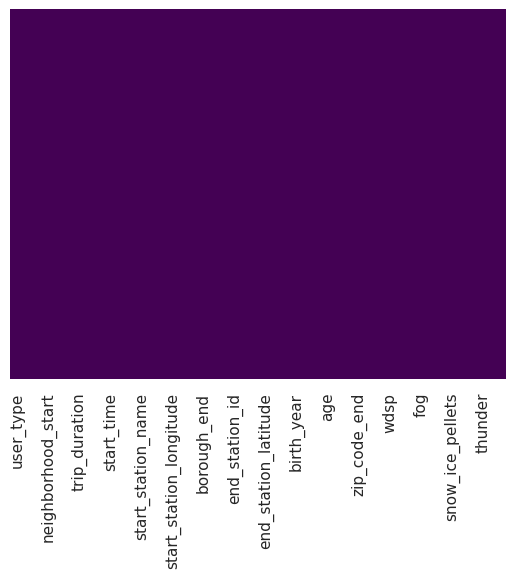

In [20]:
sns.heatmap(df.isna(), yticklabels=False,cbar=False,cmap='viridis')

#### Duplicate data

In [21]:
df.duplicated().mean()*100

0.0

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Results:</b><p style = "font-family:Verdana; font-size:14px">No missing and duplicated values.</p>
</div>

#### Check for similar start and end station

#### Subscribers' station

In [22]:
df_neigh_stat_subs = df[df['user_type'] == 'Subscriber'].groupby(['neighborhood_start', 'start_station_name', 'neighborhood_end', 'end_station_name']).count()['user_type'].sort_values(ascending=False)
df_neigh_stat_subs.head(20)

neighborhood_start         start_station_name         neighborhood_end           end_station_name         
Flatiron                   W 21 St & 6 Ave            East Chelsea               9 Ave & W 22 St              65
Battery Park City          Vesey Pl & River Terrace   TriBeCa/Civic Center       Greenwich St & N Moore St    62
                           West Thames St             Battery Park City          Vesey Pl & River Terrace     62
Midtown Center             E 43 St & Vanderbilt Ave   Garment District           W 41 St & 8 Ave              60
Greenwich Village North    Lafayette St & E 8 St      East Village               E 10 St & Avenue A           57
East Chelsea               W 26 St & 8 Ave            West Chelsea/Hudson Yards  11 Ave & W 27 St             56
                           W 17 St & 8 Ave            East Chelsea               8 Ave & W 31 St              55
                           W 22 St & 10 Ave           East Chelsea               W 22 St & 8 Ave      

#### Change customer to casual

In [23]:
df['user_type'].value_counts()

Subscriber    148884
Customer       19319
Name: user_type, dtype: int64

In [24]:
# Rename 'customer' to 'casual' in the 'user_type' column
df['user_type'].replace('Customer', 'Casual', inplace=True)

#### Casual's station

In [25]:
df_neigh_stat_cas = df[df['user_type'] == 'Casual'].groupby(['neighborhood_start', 'start_station_name', 'neighborhood_end', 'end_station_name']).count()['user_type'].sort_values(ascending=False)
df_neigh_stat_cas

neighborhood_start         start_station_name                 neighborhood_end           end_station_name                 
Midtown North              Grand Army Plaza & Central Park S  Midtown North              Grand Army Plaza & Central Park S    113
Lincoln Square East        Broadway & W 60 St                 Lincoln Square East        Broadway & W 60 St                    85
TriBeCa/Civic Center       Centre St & Chambers St            TriBeCa/Civic Center       Centre St & Chambers St               73
DUMBO/Vinegar Hill         Old Fulton St                      TriBeCa/Civic Center       Centre St & Chambers St               46
West Chelsea/Hudson Yards  12 Ave & W 40 St                   Battery Park City          West St & Chambers St                 42
                                                                                                                             ... 
Greenwich Village North    Broadway & E 14 St                 West Village               Perry St

#### Check distance and trip duration
#### Station distance

In [26]:
import math

def station_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Difference in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Calculate distance
    distance = R * c
    return distance

# Apply the haversine_distance function to create a new column 'distance_km'
df['distance_km'] = df.apply(lambda row: station_distance(row['start_station_latitude'], row['start_station_longitude'], row['end_station_latitude'], row['end_station_longitude']), axis=1)
df.head()

user_type  bike_id       neighborhood_start borough_start  trip_duration  \
0  Subscriber  16909.0           Midtown Center     Manhattan       5.216667   
1  Subscriber  16800.0                 Union Sq     Manhattan       3.416667   
2  Subscriber  18404.0  Two Bridges/Seward Park     Manhattan       4.416667   
3  Subscriber  16331.0            Midtown South     Manhattan       6.216667   
4  Subscriber  18661.0  Greenwich Village North     Manhattan      16.083333   

        date          start_time  start_station_id     start_station_name  \
0 2015-07-09 2015-07-09 15:42:30             520.0        W 52 St & 5 Ave   
1 2015-07-09 2015-07-09 14:00:51             168.0        W 18 St & 6 Ave   
2 2015-07-09 2015-07-09 07:54:55             350.0  Clinton St & Grand St   
3 2015-07-09 2015-07-09 15:36:21             485.0        W 37 St & 5 Ave   
4 2015-07-09 2015-07-09 09:29:18             345.0        W 13 St & 6 Ave   

   start_station_latitude  start_station_longitude           neighborhood_end  \
0               40.759923               -73.976485  Times Sq/Theatre District   
1               40.739713               -73.994564                   Flatiron   
2               40.715595               -73.987030    Two Bridges/Seward Park   
3               40.750380               -73.983390             Midtown Center   
4               40.736494               -73.997044             Midtown Center   

  borough_end           stop_time  end_station_id      end_station_name  \
0   Manhattan 2015-07-09 15:47:44           493.0       W 45 St & 6 Ave   
1   Manhattan 2015-07-09 14:04:17           334.0       W 20 St & 7 Ave   
2   Manhattan 2015-07-09 07:59:21           400.0  Pitt St & Stanton St   
3   Manhattan 2015-07-09 15:42:35           524.0       W 43 St & 6 Ave   
4   Manhattan 2015-07-09 09:45:24           524.0       W 43 St & 6 Ave   

   end_station_latitude  end_station_longitude  birth_year     sex   age  \
0             40.756800             -73.982912        1968  female  47.5   
1             40.742388             -73.997262        1970  female  45.5   
2             40.719261             -73.981780        1954    male  61.5   
3             40.755273             -73.983169        1960    male  55.5   
4             40.755273             -73.983169        1987  female  28.5   

   zip_code_start  zip_code_end  temp  wdsp  prcp  fog  rain_drizzle  \
0           10103         10036  74.7   3.6   0.0    0             1   
1           10011         10011  74.7   3.6   0.0    0             1   
2           10002         10002  74.7   3.6   0.0    0             1   
3           10018         10110  74.7   3.6   0.0    0             1   
4           10011         10110  74.7   3.6   0.0    0             1   

   snow_ice_pellets  hail  thunder  tornado_funnel_cloud  distance_km  
0                 0     0        0                     0     0.643063  
1                 0     0        0                     0     0.374357  
2                 0     0        0                     0     0.601551  
3                 0     0        0                     0     0.544392  
4                 0     0        0                     0     2.392996

#### Subscriber's distance by trip duration

In [27]:
df[df['user_type'] == 'Subscriber'].groupby(['neighborhood_start', 'start_station_name', 'neighborhood_end', 'end_station_name'])[['trip_duration', 'distance_km']].mean().sort_values(by=['trip_duration', 'distance_km'], ascending=False)

trip_duration  \
neighborhood_start        start_station_name       neighborhood_end          end_station_name                         
Lenox Hill West           1 Ave & E 68 St          Upper East Side North     E 81 St & Park Ave         1401.583333   
Greenwich Village North   W 13 St & 6 Ave          Upper West Side South     W 84 St & Broadway          886.233333   
TriBeCa/Civic Center      Franklin St & W Broadway Midtown Center            W 52 St & 5 Ave             869.033333   
Lower East Side           Allen St & Hester St     Midtown East              E 53 St & Lexington Ave     847.933333   
Financial District South  Water - Whitehall Plaza  Times Sq/Theatre District Broadway & W 49 St          709.683333   
...                                                                                                             ...   
Kips Bay                  E 27 St & 1 Ave          Kips Bay                  E 27 St & 1 Ave               1.183333   
Greenwich Village North   Washington Pl & Broadway Greenwich Village North   Washington Square E           1.175000   
Lincoln Square East       W 74 St & Columbus Ave   Lincoln Square East       Columbus Ave & W 72 St        1.166667   
Williamsburg (South Side) S 4 St & Wythe Ave       Williamsburg (South Side) S 4 St & Wythe Ave            1.100000   
Gramercy                  E 15 St & 3 Ave          Gramercy                  E 16 St & Irving Pl           1.066667   

                                                                                                      distance_km  
neighborhood_start        start_station_name       neighborhood_end          end_station_name                      
Lenox Hill West           1 Ave & E 68 St          Upper East Side North     E 81 St & Park Ave          1.310803  
Greenwich Village North   W 13 St & 6 Ave          Upper West Side South     W 84 St & Broadway          5.839666  
TriBeCa/Civic Center      Franklin St & W Broadway Midtown Center            W 52 St & 5 Ave             5.201457  
Lower East Side           Allen St & Hester St     Midtown East              E 53 St & Lexington Ave     5.023569  
Financial District South  Water - Whitehall Plaza  Times Sq/Theatre District Broadway & W 49 St          6.885962  
...                                                                                                           ...  
Kips Bay                  E 27 St & 1 Ave          Kips Bay                  E 27 St & 1 Ave             0.000000  
Greenwich Village North   Washington Pl & Broadway Greenwich Village North   Washington Square E         0.214675  
Lincoln Square East       W 74 St & Columbus Ave   Lincoln Square East       Columbus Ave & W 72 St      0.206814  
Williamsburg (South Side) S 4 St & Wythe Ave       Williamsburg (South Side) S 4 St & Wythe Ave          0.000000  
Gramercy                  E 15 St & 3 Ave          Gramercy                  E 16 St & Irving Pl         0.125494  

[48719 rows x 2 columns]

#### Subscriber's trip duration by distance

In [28]:
df[df['user_type'] == 'Subscriber'].groupby(['neighborhood_start', 'start_station_name', 'neighborhood_end', 'end_station_name'])[['distance_km','trip_duration']].mean().sort_values(by=['distance_km', 'trip_duration'], ascending=False)

distance_km  \
neighborhood_start          start_station_name            neighborhood_end            end_station_name                             
Clinton Hill                Fulton St & Grand Ave         Lincoln Square West         11 Ave & W 59 St                 10.226617   
                            Fulton St & Waverly Ave       Lincoln Square West         11 Ave & W 59 St                 10.039324   
Lincoln Square West         11 Ave & W 59 St              Park Slope                  Dean St & 4 Ave                   9.877708   
Park Slope                  Dean St & 4 Ave               Lincoln Square West         11 Ave & W 59 St                  9.877708   
Upper West Side South       W 84 St & Broadway            Battery Park City           Little West St & 1 Pl             9.617292   
...                                                                                                                          ...   
Downtown Brooklyn/MetroTech Cadman Plaza E & Red Cross Pl Downtown Brooklyn/MetroTech Cadman Plaza E & Red Cross Pl     0.000000   
Greenpoint                  Milton St & Franklin St       Greenpoint                  Milton St & Franklin St           0.000000   
Murray Hill                 Pershing Square North         Murray Hill                 Pershing Square North             0.000000   
Kips Bay                    E 27 St & 1 Ave               Kips Bay                    E 27 St & 1 Ave                   0.000000   
Williamsburg (South Side)   S 4 St & Wythe Ave            Williamsburg (South Side)   S 4 St & Wythe Ave                0.000000   

                                                                                                                     trip_duration  
neighborhood_start          start_station_name            neighborhood_end            end_station_name                              
Clinton Hill                Fulton St & Grand Ave         Lincoln Square West         11 Ave & W 59 St                    5.116667  
                            Fulton St & Waverly Ave       Lincoln Square West         11 Ave & W 59 St                    7.816667  
Lincoln Square West         11 Ave & W 59 St              Park Slope                  Dean St & 4 Ave                   171.133333  
Park Slope                  Dean St & 4 Ave               Lincoln Square West         11 Ave & W 59 St                   16.833333  
Upper West Side South       W 84 St & Broadway            Battery Park City           Little West St & 1 Pl              41.850000  
...                                                                                                                            ...  
Downtown Brooklyn/MetroTech Cadman Plaza E & Red Cross Pl Downtown Brooklyn/MetroTech Cadman Plaza E & Red Cross Pl       1.566667  
Greenpoint                  Milton St & Franklin St       Greenpoint                  Milton St & Franklin St             1.566667  
Murray Hill                 Pershing Square North         Murray Hill                 Pershing Square North               1.483333  
Kips Bay                    E 27 St & 1 Ave               Kips Bay                    E 27 St & 1 Ave                     1.183333  
Williamsburg (South Side)   S 4 St & Wythe Ave            Williamsburg (South Side)   S 4 St & Wythe Ave                  1.100000  

[48719 rows x 2 columns]

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">We observed that there are instances where the starting neighborhood and the ending neighborhood are identical. Upon further investigation, we discovered that these instances are associated with the same stations and a distance of 0 km. Therefore, we will proceed to remove data entries that pertain to similar stations.</p>
</div>

#### Drop similar start and end station

In [29]:
count_same_stations = df[df['start_station_name'] == df['end_station_name']]['start_station_name'].value_counts()
count_same_stations

Grand Army Plaza & Central Park S    129
Broadway & W 60 St                   123
Centre St & Chambers St               82
12 Ave & W 40 St                      61
Broadway & W 58 St                    59
                                    ... 
E 82 St & 2 Ave                        1
McKibbin St & Manhattan Ave            1
Pershing Square North                  1
Union Ave & N 12 St                    1
Driggs Ave & Lorimer St                1
Name: start_station_name, Length: 418, dtype: int64

In [30]:
count_same_stations.sum()

3833

In [31]:
count_same_stations.sum() / len(df)*100

2.2787940762055374

In [32]:
df = df[df['start_station_name'] != df['end_station_name']]

In [33]:
count_same_stations = df[df['start_station_name'] == df['end_station_name']]['start_station_name'].value_counts()
count_same_stations

Series([], Name: start_station_name, dtype: int64)

In [34]:
count_same_stations.sum()

0

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">We observed that there are instances where the starting neighborhood and the ending neighborhood are identical. Upon further investigation, we discovered that these instances are associated with the same stations and a distance of 0 km. Therefore, we will proceed to remove data entries that pertain to similar stations.</p>
</div>

<img style="float:left" src="https://i.imgur.com/rb8V6X5.png" width="50">

# Explarotary Data Analysis (EDA)

# Understand your customer (1)
## Number of trips
#### Subscriber vs Customer (Casual)

In [35]:
df_1 = df.copy()

In [36]:
df_1.describe(include='all').transpose()

/tmp/ipykernel_32/2476705564.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_1.describe(include='all').transpose()
/tmp/ipykernel_32/2476705564.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_1.describe(include='all').transpose()
/tmp/ipykernel_32/2476705564.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_1.describe(include='all').transpose()


count  unique                  top    freq  \
user_type                  164370       2           Subscriber  146446   
bike_id                  164370.0     NaN                  NaN     NaN   
neighborhood_start         164370      70         East Chelsea   10891   
borough_start              164370       3            Manhattan  151053   
trip_duration            164370.0     NaN                  NaN     NaN   
date                       164370     698  2015-10-08 00:00:00     519   
start_time                 164370  162085  2015-06-23 09:18:00       5   
start_station_id         164370.0     NaN                  NaN     NaN   
start_station_name         164370     493      8 Ave & W 31 St    1927   
start_station_latitude   164370.0     NaN                  NaN     NaN   
start_station_longitude  164370.0     NaN                  NaN     NaN   
neighborhood_end           164370      70         East Chelsea   10681   
borough_end                164370       3            Manhattan  150865   
stop_time                  164370  162055  2015-06-30 17:44:00       5   
end_station_id           164370.0     NaN                  NaN     NaN   
end_station_name           164370     494   E 17 St & Broadway    1680   
end_station_latitude     164370.0     NaN                  NaN     NaN   
end_station_longitude    164370.0     NaN                  NaN     NaN   
birth_year               164370.0     NaN                  NaN     NaN   
sex                        164370       3                 male  112704   
age                      164370.0     NaN                  NaN     NaN   
zip_code_start           164370.0     NaN                  NaN     NaN   
zip_code_end             164370.0     NaN                  NaN     NaN   
temp                     164370.0     NaN                  NaN     NaN   
wdsp                     164370.0     NaN                  NaN     NaN   
prcp                     164370.0     NaN                  NaN     NaN   
fog                      164370.0     NaN                  NaN     NaN   
rain_drizzle             164370.0     NaN                  NaN     NaN   
snow_ice_pellets         164370.0     NaN                  NaN     NaN   
hail                     164370.0     NaN                  NaN     NaN   
thunder                  164370.0     NaN                  NaN     NaN   
tornado_funnel_cloud     164370.0     NaN                  NaN     NaN   
distance_km              164370.0     NaN                  NaN     NaN   

                                      first                last          mean  \
user_type                               NaT                 NaT           NaN   
bike_id                                 NaT                 NaT  18778.471899   
neighborhood_start                      NaT                 NaT           NaN   
borough_start                           NaT                 NaT           NaN   
trip_duration                           NaT                 NaT     13.957399   
date                    2014-01-01 00:00:00 2015-11-29 00:00:00           NaN   
start_time              2014-01-01 01:41:17 2015-11-29 22:57:57           NaN   
start_station_id                        NaT                 NaT    507.897153   
start_station_name                      NaT                 NaT           NaN   
start_station_latitude                  NaT                 NaT     40.734746   
start_station_longitude                 NaT                 NaT    -73.990538   
neighborhood_end                        NaT                 NaT           NaN   
borough_end                             NaT                 NaT           NaN   
stop_time               2014-01-01 01:46:12 2015-11-29 22:59:07           NaN   
end_station_id                          NaT                 NaT    505.742009   
end_station_name                        NaT                 NaT           NaN   
end_station_latitude                    NaT                 NaT     40.734514   
end_station_longitude                   NaT          

Text(0.5, 1.0, 'Number of Trips Subscriber vs Casual 2014 to Nov 2015')

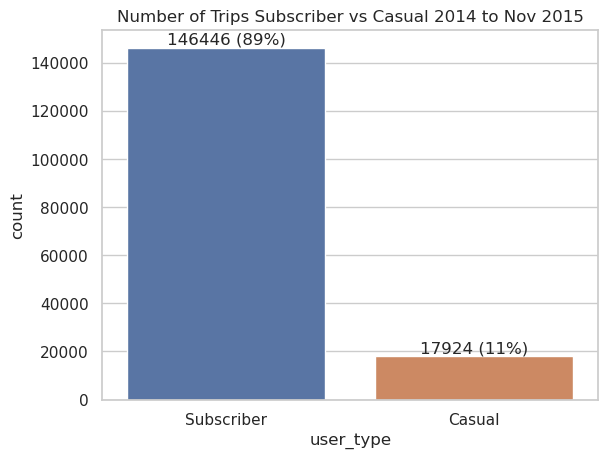

In [37]:
ax = sns.countplot(x=df_1['user_type'],
                   order=df_1['user_type'].value_counts(ascending=False).index);
        
abs_values = df_1['user_type'].value_counts(ascending=False)
rel_values = df_1['user_type'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

# Show the plot (optional)
plt.title('Number of Trips Subscriber vs Casual 2014 to Nov 2015')

# Save the graph as '01_subs_vs_cas_200230731.png'
#plt.savefig('01_subs_vs_cas_bar_200230731.png', dpi=100, bbox_inches = "tight")

### Date, week, month and year

In [38]:
# Create a 'day' col
df_1['day'] = df_1['date'].dt.day_name().str.lower()

In [39]:
# Assuming df_2 is your DataFrame
def group_day(day):
    if day in ['saturday', 'sunday']:
        return 'weekend'
    else:
        return 'weekdays'

In [40]:
df_1['day_groups'] = df_1['day'].apply(group_day)

#### Week

In [41]:
# Create 'month' col
df_1['week'] = df_1['date'].dt.strftime('%W').str.lower()

#### Month

In [42]:
# Create 'month' col
df_1['month'] = df_1['date'].dt.strftime('%b').str.lower()

#### Year

In [43]:
# Create 'month' col
df_1['year'] = df_1['date'].dt.strftime('%Y').str.lower()

In [44]:
df_1.select_dtypes(include='object')

user_type              neighborhood_start borough_start  \
0       Subscriber                  Midtown Center     Manhattan   
1       Subscriber                        Union Sq     Manhattan   
2       Subscriber         Two Bridges/Seward Park     Manhattan   
3       Subscriber                   Midtown South     Manhattan   
4       Subscriber         Greenwich Village North     Manhattan   
...            ...                             ...           ...   
168197  Subscriber                        Gramercy     Manhattan   
168199  Subscriber  Stuy Town/Peter Cooper Village     Manhattan   
168200  Subscriber                        Union Sq     Manhattan   
168201  Subscriber         Two Bridges/Seward Park     Manhattan   
168202  Subscriber         Greenwich Village North     Manhattan   

           start_station_name           neighborhood_end borough_end  \
0             W 52 St & 5 Ave  Times Sq/Theatre District   Manhattan   
1             W 18 St & 6 Ave                   Flatiron   Manhattan   
2       Clinton St & Grand St    Two Bridges/Seward Park   Manhattan   
3             W 37 St & 5 Ave             Midtown Center   Manhattan   
4             W 13 St & 6 Ave             Midtown Center   Manhattan   
...                       ...                        ...         ...   
168197    E 16 St & Irving Pl               East Chelsea   Manhattan   
168199        E 23 St & 1 Ave  Times Sq/Theatre District   Manhattan   
168200     E 17 St & Broadway       TriBeCa/Civic Center   Manhattan   
168201    Henry St & Grand St              Alphabet City   Manhattan   
168202  Lafayette St & E 8 St               East Chelsea   Manhattan   

             end_station_name     sex       day day_groups week month  year  
0             W 45 St & 6 Ave  female  thursday   weekdays   27   jul  2015  
1             W 20 St & 7 Ave  female  thursday   weekdays   27   jul  2015  
2        Pitt St & Stanton St    male  thursday   weekdays   27   jul  2015  
3             W 43 St & 6 Ave    male  thursday   weekdays   27   jul  2015  
4             W 43 St & 6 Ave  female  thursday   weekdays   27   jul  2015  
...                       ...     ...       ...        ...  ...   ...   ...  
168197        8 Ave & W 31 St    male   tuesday   weekdays   04   jan  2015  
168199     Broadway & W 49 St    male   tuesday   weekdays   04   jan  2015  
168200  Warren St & Church St    male   tuesday   weekdays   04   jan  2015  
168201      Avenue D & E 3 St    male   tuesday   weekdays   04   jan  2015  
168202        9 Ave & W 16 St    male   tuesday   weekdays   04   jan  2015  

[164370 rows x 13 columns]

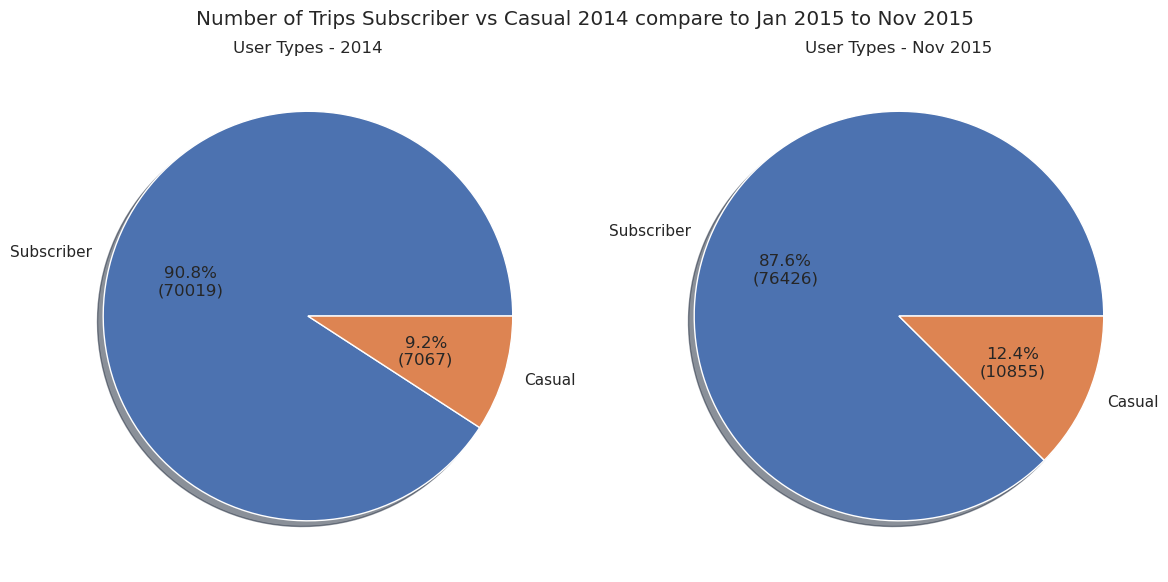

In [45]:
# Create two separate pie charts for each year
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Filter data for the year 2014
df_2014 = df_1[df_1['year'] == '2014'] #df_2014 = df_1[df_1['date'].dt.year == 2014]

# Filter data for the year 2015
df_2015 = df_1[df_1['year'] == '2015'] #df_2015 = df_1[df_1['date'].dt.year == 2015]

# Plot pie chart for 2014
ax_2014 = axes[0]
ax_2014.pie(df_2014['user_type'].value_counts(),
            labels=df_2014['user_type'].value_counts().index,
            autopct=lambda pct: f'{pct:.1f}%\n({int(pct * sum(df_2014["user_type"].value_counts()) / 100)})',
            shadow=True)
ax_2014.set_title('User Types - 2014')

# Plot pie chart for 2015
ax_2015 = axes[1]
ax_2015.pie(df_2015['user_type'].value_counts(),
            labels=df_2015['user_type'].value_counts().index,
            autopct=lambda pct: f'{pct:.1f}%\n({int(pct * sum(df_2015["user_type"].value_counts()) / 100)})',
            shadow=True)
ax_2015.set_title('User Types - Nov 2015')

#Title
plt.suptitle('Number of Trips Subscriber vs Casual 2014 compare to Jan 2015 to Nov 2015')
# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as '01_subs_vs_cas_2014_Nov_2015_200230731.png'
#plt.savefig('02_subs_vs_cas_2014_Nov_2015_pie_200230731.png', dpi=100, bbox_inches = "tight")

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">There are two user types: subscribers and casual users. The number of trips for both customer types increased in 2015 compared to 2014. Subsribers are more than 85% while Casual is below 15%.</p>
</div>

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px"><b>This data does not represent the total number of annual members or subscribers, which would be 86,802 (86.6%) from Jan 2015 to Nov 2015, nor does it accurately reflect the number of casual customers. Rather, it indicates that the entry data consists of significantly more subscribers than casual customers. To obtain precise information on each customer's contribution, we would need to assign unique IDs to both subscribers and casual customers, differentiating them by those who use the service annualy, for seven days and those who use it for only one day.
<br><br>
Moreover, the data shows imbalanced data with subscribers as the majority class.</b><p>
</div>

#### Hours
#### Start hours

Text(91.25, 0.5, 'Start Time (Hour)')

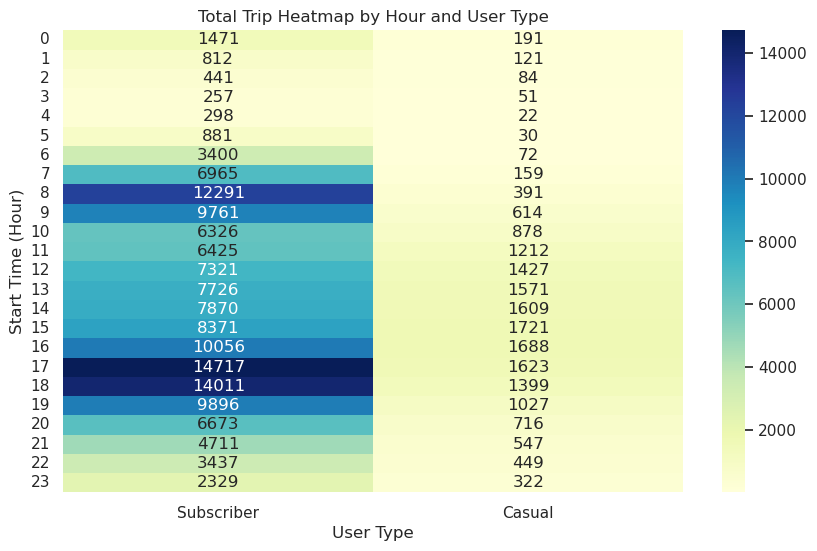

In [46]:
# Group the data by both hour of start_time and user_type
pivot_df = df_1.groupby([df_1['start_time'].dt.hour, 'user_type'])['user_type'].count().unstack()

# Reorder the columns
pivot_df = pivot_df[['Subscriber', 'Casual']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Total Trip Heatmap by Hour and User Type')
plt.xlabel('User Type')
plt.ylabel('Start Time (Hour)')

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">"There are two user types: subscribers and casual users. The number of trips for 'Subscribers' that are above 6,000 occurs between 7 am and 8 pm. On the other hand, for 'Casual' users, the number of trips that exceeds 1,000 is observed between 11 am and 7 pm.</p>
</div>

#### Create user type and month

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Please note:</b><p style = "font-family:Verdana; font-size:14px"><b>As we do not know the exact new customers and the current customers, we are unable to calculate the revenue and determine the precise number of each user type. Our reliable data will be the trips and the average time.</b><p>
</div>

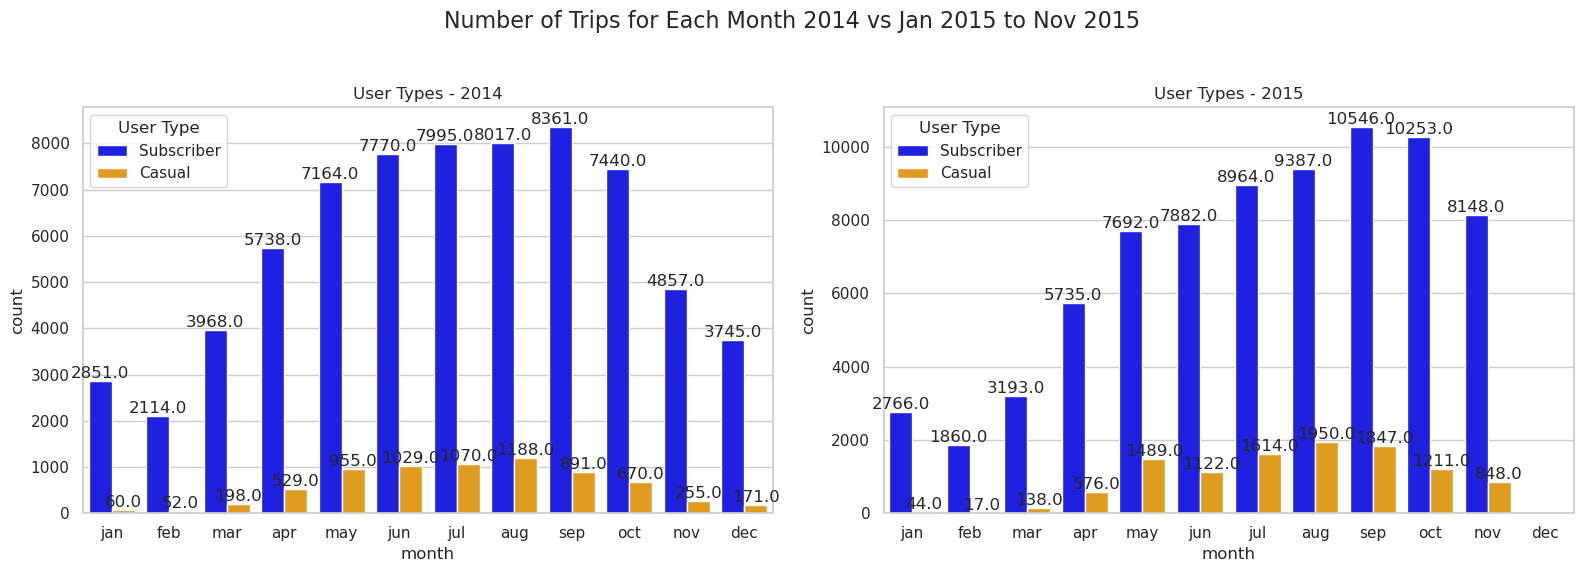

In [47]:

# Create two separate countplots for each year
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot countplot for 2014
ax_2014 = sns.countplot(x='month', hue='user_type', data=df_2014,
                        order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        palette={'Subscriber': 'blue', 'Casual': 'orange'},
                        ax=axes[0])
ax_2014.set_title('User Types - 2014')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2014
ax_2014.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Plot countplot for 2015
ax_2015 = sns.countplot(x='month', hue='user_type', data=df_2015,
                        order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        palette={'Subscriber': 'blue', 'Casual': 'orange'},
                        ax=axes[1])
ax_2015.set_title('User Types - 2015')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2015
ax_2015.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Add title and adjust spacing between subplots
plt.suptitle('Number of Trips for Each Month 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as '07_subs_vs_cas_2014_2015_200230731_bar_monthly.png'
#plt.savefig('03_subs_vs_cas_2014_2015_200230731_bar_monthly.png', dpi=100, bbox_inches="tight")

Text(91.25, 0.5, 'Start Time (Hour)')

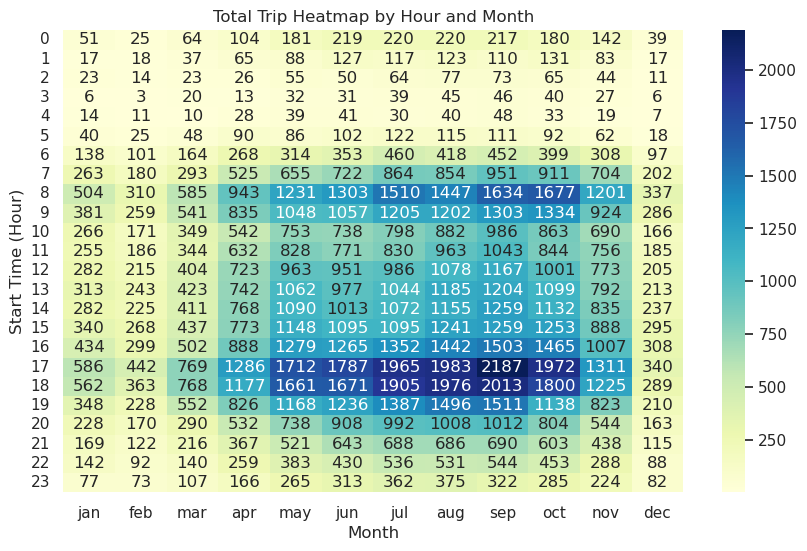

In [48]:
# Group the data by both hour of start_time and user_type
pivot_df = df_1.groupby([df_1['start_time'].dt.hour, 'month'])['user_type'].count().unstack()
#pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day_groups', values='user_type', aggfunc='count')

# Reorder the columns
pivot_df = pivot_df[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Total Trip Heatmap by Hour and Month')
plt.xlabel('Month')
plt.ylabel('Start Time (Hour)')

#### Trips by seasonal month

In [49]:
def month_season(month):
    month = month.lower()  # Convert to lowercase to handle variations
    if month in ['mar', 'apr', 'may']:
        return 'Spring'
    elif month in ['jun', 'jul', 'aug']:
        return 'Summer'
    elif month in ['sep', 'oct', 'nov']:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to create the 'month_season' column
df_1['month_season'] = df_1['month'].apply(month_season)

In [50]:
df_1.head()

user_type  bike_id       neighborhood_start borough_start  trip_duration  \
0  Subscriber  16909.0           Midtown Center     Manhattan       5.216667   
1  Subscriber  16800.0                 Union Sq     Manhattan       3.416667   
2  Subscriber  18404.0  Two Bridges/Seward Park     Manhattan       4.416667   
3  Subscriber  16331.0            Midtown South     Manhattan       6.216667   
4  Subscriber  18661.0  Greenwich Village North     Manhattan      16.083333   

        date          start_time  start_station_id     start_station_name  \
0 2015-07-09 2015-07-09 15:42:30             520.0        W 52 St & 5 Ave   
1 2015-07-09 2015-07-09 14:00:51             168.0        W 18 St & 6 Ave   
2 2015-07-09 2015-07-09 07:54:55             350.0  Clinton St & Grand St   
3 2015-07-09 2015-07-09 15:36:21             485.0        W 37 St & 5 Ave   
4 2015-07-09 2015-07-09 09:29:18             345.0        W 13 St & 6 Ave   

   start_station_latitude  start_station_longitude           neighborhood_end  \
0               40.759923               -73.976485  Times Sq/Theatre District   
1               40.739713               -73.994564                   Flatiron   
2               40.715595               -73.987030    Two Bridges/Seward Park   
3               40.750380               -73.983390             Midtown Center   
4               40.736494               -73.997044             Midtown Center   

  borough_end           stop_time  end_station_id      end_station_name  \
0   Manhattan 2015-07-09 15:47:44           493.0       W 45 St & 6 Ave   
1   Manhattan 2015-07-09 14:04:17           334.0       W 20 St & 7 Ave   
2   Manhattan 2015-07-09 07:59:21           400.0  Pitt St & Stanton St   
3   Manhattan 2015-07-09 15:42:35           524.0       W 43 St & 6 Ave   
4   Manhattan 2015-07-09 09:45:24           524.0       W 43 St & 6 Ave   

   end_station_latitude  end_station_longitude  birth_year     sex   age  \
0             40.756800             -73.982912        1968  female  47.5   
1             40.742388             -73.997262        1970  female  45.5   
2             40.719261             -73.981780        1954    male  61.5   
3             40.755273             -73.983169        1960    male  55.5   
4             40.755273             -73.983169        1987  female  28.5   

   zip_code_start  zip_code_end  temp  wdsp  prcp  fog  rain_drizzle  \
0           10103         10036  74.7   3.6   0.0    0             1   
1           10011         10011  74.7   3.6   0.0    0             1   
2           10002         10002  74.7   3.6   0.0    0             1   
3           10018         10110  74.7   3.6   0.0    0             1   
4           10011         10110  74.7   3.6   0.0    0             1   

   snow_ice_pellets  hail  thunder  tornado_funnel_cloud  distance_km  \
0                 0     0        0                     0     0.643063   
1                 0     0        0                     0     0.374357   
2                 0     0        0                     0     0.601551   
3                 0     0        0                     0     0.544392   
4                 0     0        0                     0     2.392996   

        day day_groups week month  year month_season  
0  thursday   weekdays   27   jul  2015       Summer  
1  thursday   weekdays   27   jul  2015       Summer  
2  thursday   weekdays   27   jul  2015       Summer  
3  thursday   weekdays   27   jul  2015       Summer  
4  thursday   weekdays   27   jul  2015       Summer

In [51]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164370 entries, 0 to 168202
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_type                164370 non-null  object        
 1   bike_id                  164370 non-null  float64       
 2   neighborhood_start       164370 non-null  object        
 3   borough_start            164370 non-null  object        
 4   trip_duration            164370 non-null  float64       
 5   date                     164370 non-null  datetime64[ns]
 6   start_time               164370 non-null  datetime64[ns]
 7   start_station_id         164370 non-null  float64       
 8   start_station_name       164370 non-null  object        
 9   start_station_latitude   164370 non-null  float64       
 10  start_station_longitude  164370 non-null  float64       
 11  neighborhood_end         164370 non-null  object        
 12  borough_end     

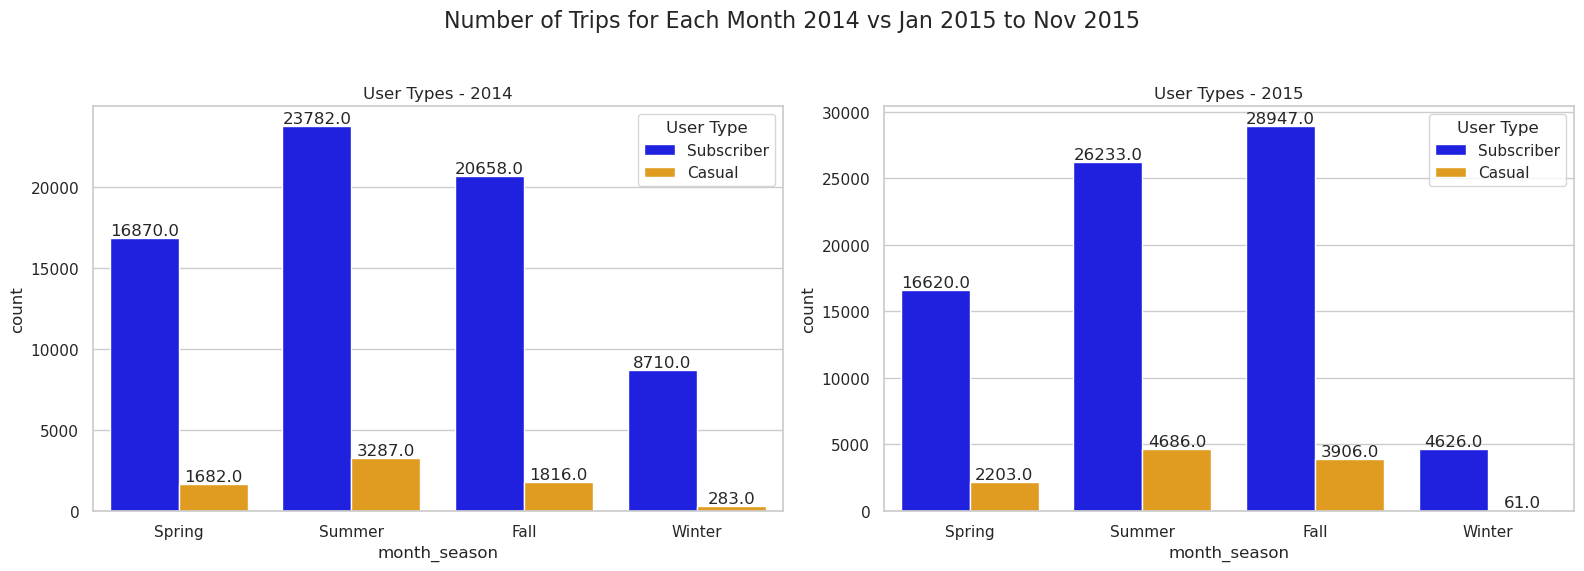

In [52]:
# Order of the month_season categories
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Filter data for the year 2014
df_2014 = df_1[df_1['year'] == '2014'] #df_2014 = df_1[df_1['date'].dt.year == 2014]

# Filter data for the year 2015
df_2015 = df_1[df_1['year'] == '2015'] #df_2015 = df_1[df_1['date'].dt.year == 2015]


# Create two separate countplots for each year
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot countplot for 2014
ax_2014 = sns.countplot(x='month_season', hue='user_type', data=df_2014,
                        order=season_order,
                        palette={'Subscriber': 'blue', 'Casual': 'orange'},
                        ax=axes[0])
ax_2014.set_title('User Types - 2014')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2014
ax_2014.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Plot countplot for 2015
ax_2015 = sns.countplot(x='month_season', hue='user_type', data=df_2015,
                        order=season_order,
                        palette={'Subscriber': 'blue', 'Casual': 'orange'},
                        ax=axes[1])
ax_2015.set_title('User Types - 2015')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2015
ax_2015.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Add title and adjust spacing between subplots
plt.suptitle('Number of Trips for Each Month 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as '04_subs_vs_cas_2014_2015_200230731_bar_seasonal.png'
#plt.savefig('04_subs_vs_cas_2014_2015_200230731_bar_seasonal.png', dpi=100, bbox_inches="tight")

Text(91.25, 0.5, 'Start Time (Hour)')

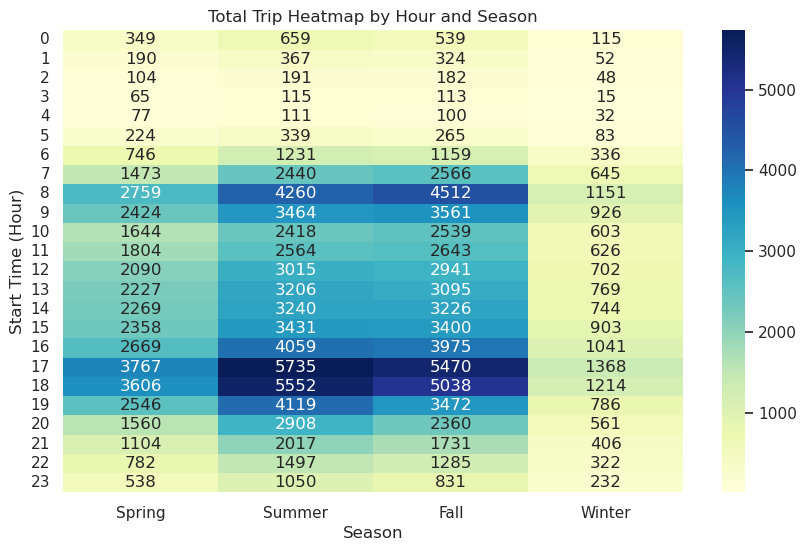

In [53]:
# Group the data by both hour of start_time and user_type
pivot_df = df_1.groupby([df_1['start_time'].dt.hour, 'month_season'])['user_type'].count().unstack()
#pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day_groups', values='user_type', aggfunc='count')

# Reorder the columns
pivot_df = pivot_df[['Spring', 'Summer', 'Fall', 'Winter']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Total Trip Heatmap by Hour and Season')
plt.xlabel('Season')
plt.ylabel('Start Time (Hour)')

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">In the initial months of 2015, spanning from January to March (Q1), there was a noticeable decrease in the number of trips compared to 2014. This can be attributed to various ongoing challenges that were being actively addressed. However, starting from March, there was a noticeable upturn in the number of trips. Additionally, upon examining the monthly seasonal graph, it becomes evident that we should allocate additional resources for bike during the fall and summer months, while the bike preparation and scheduling medium to large maintenance activities can be conducted during the spring and winter months. It's important to consider that the winter data comprises only January and February of the same year, excluding data from the subsequent year. Furthermore, please take into account that the dataset does not yet encompass information for December 2015.</p>
</div>

Text(91.25, 0.5, 'Start Time (Hour)')

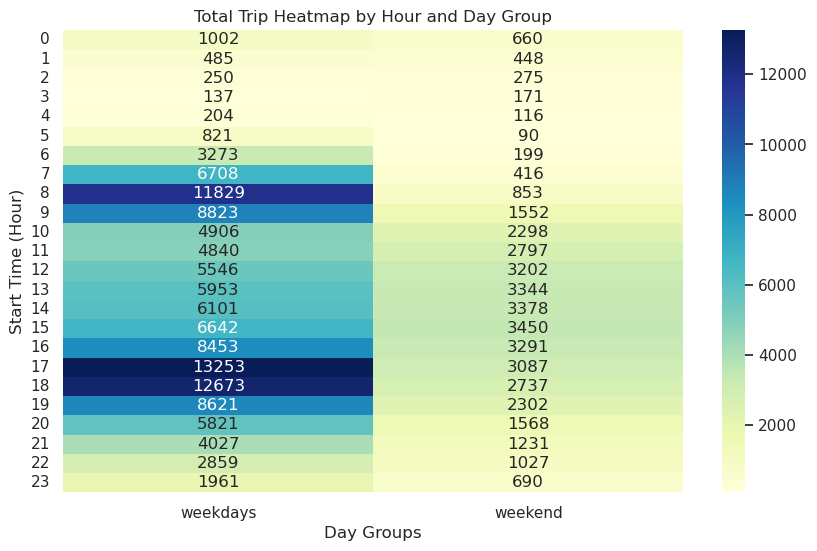

In [54]:
# Create a pivot table to arrange data for the heatmap
pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day_groups', values='user_type', aggfunc='count')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Total Trip Heatmap by Hour and Day Group')
plt.xlabel('Day Groups')
plt.ylabel('Start Time (Hour)')

Text(91.25, 0.5, 'Start Time (Hour)')

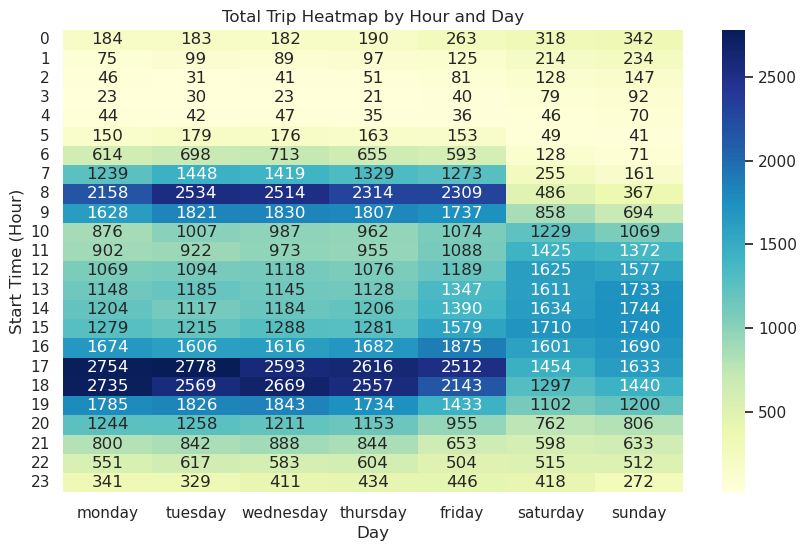

In [55]:
# Create a pivot table to arrange data for the heatmap
pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day', values='user_type', aggfunc='count')

# Reorder the columns
pivot_df = pivot_df[['monday', 'tuesday', 'wednesday', 'thursday','friday','saturday', 'sunday']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Total Trip Heatmap by Hour and Day')
plt.xlabel('Day')
plt.ylabel('Start Time (Hour)')

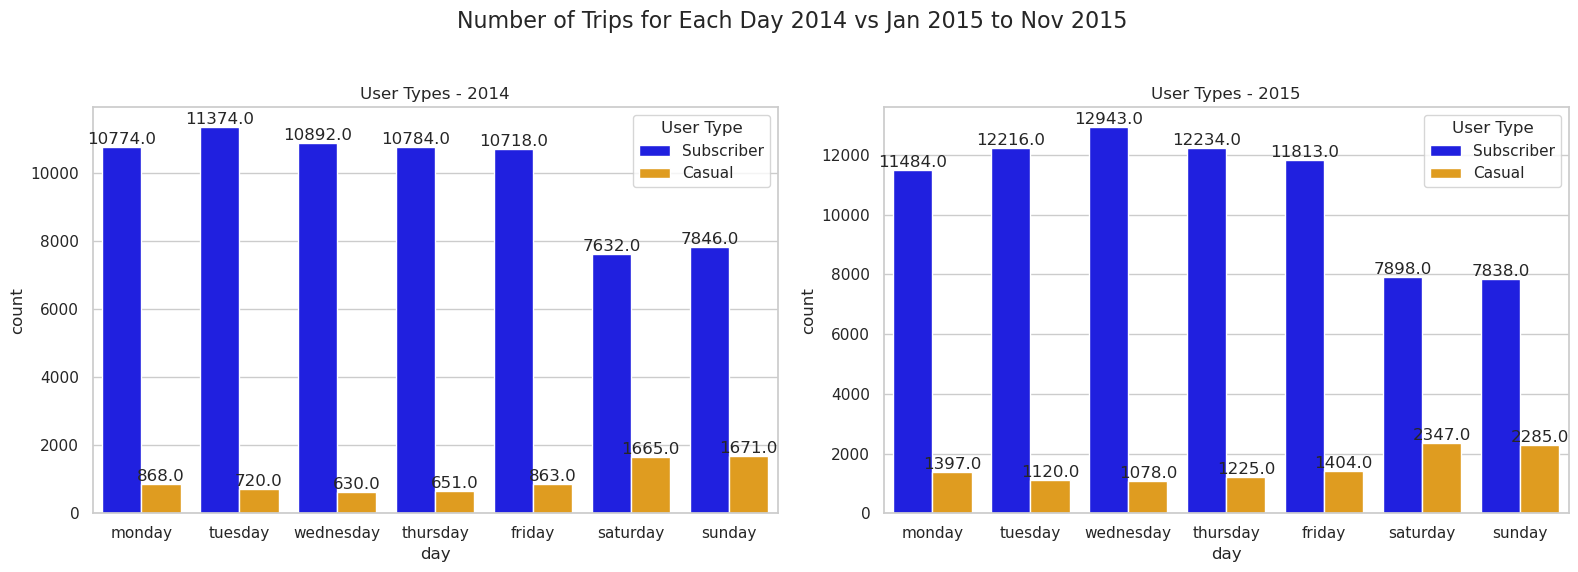

In [56]:
# Order of the month_season categories
season_order = ['monday', 'tuesday', 'wednesday', 'thursday','friday','saturday', 'sunday']

# Filter data for the year 2014
df_2014 = df_1[df_1['year'] == '2014'] #df_2014 = df_1[df_1['date'].dt.year == 2014]

# Filter data for the year 2015
df_2015 = df_1[df_1['year'] == '2015'] #df_2015 = df_1[df_1['date'].dt.year == 2015]


# Create two separate countplots for each year
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot countplot for 2014
ax_2014 = sns.countplot(x='day', hue='user_type', data=df_2014,
                        order=season_order,
                        palette={'Subscriber': 'blue', 'Casual': 'orange'},
                        ax=axes[0])
ax_2014.set_title('User Types - 2014')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2014
ax_2014.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Plot countplot for 2015
ax_2015 = sns.countplot(x='day', hue='user_type', data=df_2015,
                        order=season_order,
                        palette={'Subscriber': 'blue', 'Casual': 'orange'},
                        ax=axes[1])
ax_2015.set_title('User Types - 2015')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2015
ax_2015.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Add title and adjust spacing between subplots
plt.suptitle('Number of Trips for Each Day 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as '04_subs_vs_cas_2014_2015_200230731_bar_seasonal.png'
#plt.savefig('04_subs_vs_cas_2014_2015_200230731_bar_seasonal.png', dpi=100, bbox_inches="tight")

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px"><b>As visible in the heatmap, we can establish time categorizations: 'AM rush' from 6 to just below 10, 'daytime' from 10 to just below 16, 'rush hours' from 16 to just below 20, and 'nighttime' from 20 to just below 6. Distinct patterns emerge between subscribers and casual riders. Subscribers exhibit a relatively consistent peak throughout weekdays, while casual riders experience predominant peaks during weekends.</b><p>
</div>

# Feature engineering (1)

#### Define the represent time of the day bins
<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Results:</b><p style = "font-family:Verdana; font-size:14px">Column the represent time of the day bins to binary 0 and 1 </p>
</div>    

In [57]:
# Create 'am_rush' col
df_1['am_rush'] = df_1['start_time'].dt.hour

# Create 'daytime' col
df_1['daytime'] = df_1['start_time'].dt.hour

# Create 'pm_rush' col
df_1['pm_rush'] = df_1['start_time'].dt.hour

# Create 'nighttime' col
df_1['nighttime'] = df_1['start_time'].dt.hour

#### Am rush

In [58]:
# Define 'am_rush()' morning rush hours [06:00–10:00)
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        value = 1
    else:
        value = 0
    return value

In [59]:
# Apply 'am_rush' function to the 'am_rush' series
df_1['am_rush'] = df_1.apply(am_rush, axis=1)
df_1['am_rush'].head()

0    0
1    0
2    1
3    0
4    1
Name: am_rush, dtype: int64

#### Daytime

In [60]:
# Define 'daytime()' after morning rush hour to a hour prior office close hour [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        value = 1
    else:
        value = 0
    return value

In [61]:
# Apply 'daytime' function to the 'daytime' series
df_1['daytime'] = df_1.apply(daytime, axis=1)

#### Pm rush hour

In [62]:
# Define 'pm_rush()' after work rush hour [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        value = 1
    else:
        value = 0
    return value

In [63]:
# Apply 'pm_rush' function to the 'pm_rush' series
df_1['pm_rush'] = df_1.apply(pm_rush, axis=1)

#### Night time

In [64]:
# Define 'nighttime()' after night rush hour to morning  [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        value = 1
    elif 0 <= hour['nighttime'] < 6:
        value = 1
    else:
        value = 0
    return value

In [65]:
# Apply 'nighttime' function to the 'nighttime' series
df_1['nighttime'] = df_1.apply(nighttime, axis=1)

### Citibike stations in the neighborhood

In [66]:
# Filter the DataFrame to include only the data in 2014
# start_date = pd.to_datetime('2015-01-01')
# end_date = pd.to_datetime('2015-11-30')
df_2014 = df_1[(df_1['start_time'] >= '2014-01-01') & (df_1['stop_time'] <= '2014-12-31')]
df_2015 = df_1[(df_1['start_time'] >= '2015-01-01') & (df_1['stop_time'] <= '2015-11-30')]

In [67]:
#The stations in 2014
stations_2014 = df_2014['start_station_name'].nunique()
print(f"Number of stations in 2014: {stations_2014}")

Number of stations in 2014: 342


In [68]:
#The stations in 2015
stations_2015 = df_2015['start_station_name'].nunique()
print(f"Number of stations in 2015: {stations_2015}")

Number of stations in 2015: 481


In [69]:
stations_growth_2015 = (stations_2015-stations_2014)/stations_2014*100
# Round the result to two decimal places
stations_growth_2015 = round(stations_growth_2015, 2)

print(f"Growth of stations in 2015: {stations_growth_2015}%")

Growth of stations in 2015: 40.64%


<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Station:</b><p style = "font-family:Verdana; font-size:14px">Stations increased from 330 stations in 2013 to 342 stations in 2014 and by the end of November 2015, it reached 481 stations. The growth of stations in 2014 was 4.24%, and it drastically grew to 40.64% by the end of November 2015.</p>
</div>

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Please note:</b><p style = "font-family:Verdana; font-size:14px">There are differences in the data results after data cleaning compared to before cleaning.<p>
</div>

#### Neighborhood 2014 and 2015

In [70]:
#The neighborhood in 2014
neighborhood_2014 = df_2014['neighborhood_start'].nunique()
print(f"Neighborhood in 2014: {neighborhood_2014}")

Neighborhood in 2014: 53


In [71]:
#The neighborhood in 2015
neighborhood_2015 = df_2015['neighborhood_start'].nunique()
print(f"Neighborhood in 2015: {neighborhood_2015}")

Neighborhood in 2015: 70


In [72]:
neigh_growth_2015 = (neighborhood_2015-neighborhood_2014)/neighborhood_2014*100
# Round the result to two decimal places
neigh_growth_2015 = round(neigh_growth_2015, 2)

print(f"Growth of neighborhood in 2015: {neigh_growth_2015}%")

Growth of neighborhood in 2015: 32.08%


In [73]:
#The neighborhood in 2015
neighborhood_2015_end = df_2015['neighborhood_end'].nunique()
print(f"Neighborhood end in 2015: {neighborhood_2015_end}")

Neighborhood end in 2015: 70


In [74]:
#The neighborhood in 2015
zip_code_2015 = df_2015['zip_code_start'].nunique()
print(f"zipcode in 2015: {zip_code_2015}")

zipcode in 2015: 46


<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Neighborhood:</b><p style = "font-family:Verdana; font-size:14px">In 2014, the neighborhood comprised 53 locations, and by the end of November 2015, this number had increased to 70. The growth of the neighborhood in 2015 amounted to a 32.08% increase by the end of November.</p>
</div>

#### Neighborhood and user type
#### Subscriber

In [75]:
df_neigh_start_subs = df_1[df_1['user_type'] == 'Subscriber'].groupby(['neighborhood_start', 'borough_start']).count()['user_type'].sort_values(ascending=False)
df_neigh_start_subs

neighborhood_start                             borough_start
East Chelsea                                   Manhattan        10037
East Village                                   Manhattan         8761
Greenwich Village North                        Manhattan         7560
Murray Hill                                    Manhattan         6538
Union Sq                                       Manhattan         6504
                                                                ...  
Bushwick South                                 Brooklyn            26
South Williamsburg                             Brooklyn            22
Crown Heights North                            Brooklyn            20
Governor's Island/Ellis Island/Liberty Island  Manhattan           12
Sunnyside                                      Queens              10
Name: user_type, Length: 69, dtype: int64

In [76]:
df_zip_start_subs = df_1[df_1['user_type'] == 'Subscriber'].groupby(['zip_code_start','neighborhood_start', 'borough_start']).count()['user_type'].sort_values(ascending=False)
df_zip_start_subs

zip_code_start  neighborhood_start       borough_start
10003           Greenwich Village North  Manhattan        5854
                East Village             Manhattan        5541
10011           East Chelsea             Manhattan        5180
10002           Lower East Side          Manhattan        4706
10016           Murray Hill              Manhattan        4488
                                                          ... 
11101           Sunnyside                Queens             10
11216           Crown Heights North      Brooklyn            9
10128           Yorkville East           Manhattan           7
11206           South Williamsburg       Brooklyn            6
11233           Stuyvesant Heights       Brooklyn            5
Name: user_type, Length: 142, dtype: int64

#### Casual

In [77]:
df_neigh_start_cas = df_1[df_1['user_type'] == 'Casual'].groupby(['neighborhood_start', 'borough_start']).count()['user_type'].sort_values(ascending=False)
df_neigh_start_cas

neighborhood_start             borough_start
TriBeCa/Civic Center           Manhattan        1186
East Chelsea                   Manhattan         854
Battery Park City              Manhattan         827
Meatpacking/West Village West  Manhattan         809
Greenwich Village North        Manhattan         713
                                                ... 
Long Island City/Queens Plaza  Queens              9
Bushwick South                 Brooklyn            7
Yorkville East                 Manhattan           6
Queensbridge/Ravenswood        Queens              3
Crown Heights North            Brooklyn            3
Name: user_type, Length: 69, dtype: int64

In [78]:
df_pareto_sub_start = pd.DataFrame(df_neigh_start_subs)
df_pareto_sub_start

user_type
neighborhood_start                            borough_start           
East Chelsea                                  Manhattan          10037
East Village                                  Manhattan           8761
Greenwich Village North                       Manhattan           7560
Murray Hill                                   Manhattan           6538
Union Sq                                      Manhattan           6504
...                                                                ...
Bushwick South                                Brooklyn              26
South Williamsburg                            Brooklyn              22
Crown Heights North                           Brooklyn              20
Governor's Island/Ellis Island/Liberty Island Manhattan             12
Sunnyside                                     Queens                10

[69 rows x 1 columns]

In [79]:
pareto = 100 *df_pareto_sub_start.user_type.cumsum() / df_pareto_sub_start.user_type.sum()
df_pareto_sub_start['Percentage']= pareto
filtered_df = df_pareto_sub_start[df_pareto_sub_start['Percentage'] <= 81]

filtered_df

user_type  Percentage
neighborhood_start             borough_start                       
East Chelsea                   Manhattan          10037    6.853721
East Village                   Manhattan           8761   12.836131
Greenwich Village North        Manhattan           7560   17.998443
Murray Hill                    Manhattan           6538   22.462887
Union Sq                       Manhattan           6504   26.904115
TriBeCa/Civic Center           Manhattan           6461   31.315980
Clinton East                   Manhattan           5793   35.271704
Lower East Side                Manhattan           4706   38.485175
West Village                   Manhattan           4352   41.456919
Meatpacking/West Village West  Manhattan           4104   44.259317
Gramercy                       Manhattan           4074   47.041230
West Chelsea/Hudson Yards      Manhattan           3798   49.634678
Garment District               Manhattan           3725   52.178277
Flatiron                       Manhattan           3703   54.706854
Little Italy/NoLiTa            Manhattan           3537   57.122079
Battery Park City              Manhattan           3504   59.514770
Kips Bay                       Manhattan           3425   61.853516
Financial District North       Manhattan           3245   64.069350
Midtown Center                 Manhattan           3227   66.272892
Penn Station/Madison Sq West   Manhattan           3150   68.423856
Stuy Town/Peter Cooper Village Manhattan           3150   70.574819
Greenwich Village South        Manhattan           3083   72.680032
Two Bridges/Seward Park        Manhattan           3079   74.782514
Midtown South                  Manhattan           2878   76.747743
Midtown East                   Manhattan           2513   78.463734
Times Sq/Theatre District      Manhattan           2361   80.075932

In [80]:
df_pareto_cas_start = pd.DataFrame(df_neigh_start_cas)
df_pareto_cas_start

user_type
neighborhood_start            borough_start           
TriBeCa/Civic Center          Manhattan           1186
East Chelsea                  Manhattan            854
Battery Park City             Manhattan            827
Meatpacking/West Village West Manhattan            809
Greenwich Village North       Manhattan            713
...                                                ...
Long Island City/Queens Plaza Queens                 9
Bushwick South                Brooklyn               7
Yorkville East                Manhattan              6
Queensbridge/Ravenswood       Queens                 3
Crown Heights North           Brooklyn               3

[69 rows x 1 columns]

In [81]:
pareto = 100 *df_pareto_cas_start.user_type.cumsum() / df_pareto_cas_start.user_type.sum()
df_pareto_cas_start['Percentage']= pareto
filtered_df = df_pareto_cas_start[df_pareto_cas_start['Percentage'] <= 81]

filtered_df

user_type  Percentage
neighborhood_start            borough_start                       
TriBeCa/Civic Center          Manhattan           1186    6.616827
East Chelsea                  Manhattan            854   11.381388
Battery Park City             Manhattan            827   15.995314
Meatpacking/West Village West Manhattan            809   20.508815
Greenwich Village North       Manhattan            713   24.486722
West Chelsea/Hudson Yards     Manhattan            697   28.375363
East Village                  Manhattan            653   32.018523
Union Sq                      Manhattan            612   35.432939
Clinton East                  Manhattan            545   38.473555
Lower East Side               Manhattan            530   41.430484
Little Italy/NoLiTa           Manhattan            466   44.030350
Midtown North                 Manhattan            452   46.552109
Murray Hill                   Manhattan            449   49.057130
Financial District North      Manhattan            446   51.545414
West Village                  Manhattan            434   53.966748
DUMBO/Vinegar Hill            Brooklyn             385   56.114707
Times Sq/Theatre District     Manhattan            366   58.156661
Midtown Center                Manhattan            361   60.170721
Downtown Brooklyn/MetroTech   Brooklyn             355   62.151306
Garment District              Manhattan            349   64.098416
Greenwich Village South       Manhattan            328   65.928364
Williamsburg (North Side)     Brooklyn             327   67.752734
Williamsburg (South Side)     Brooklyn             309   69.476679
Midtown South                 Manhattan            295   71.122517
Two Bridges/Seward Park       Manhattan            283   72.701406
Brooklyn Heights              Brooklyn             270   74.207766
Hudson Sq                     Manhattan            262   75.669493
Penn Station/Madison Sq West  Manhattan            258   77.108904
SoHo                          Manhattan            248   78.492524
UN/Turtle Bay South           Manhattan            239   79.825932

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">The overview of our customers using Pareto</p>
    <ol>
        <li>80% of the top 26 trips taken by subscribers are in Manhattan, where the majority of Casual riders are also in Manhattan, with a few in Brooklyn. 
        <li>The list of top neighborhoods for subscribers and casual riders differs.</ol>
         
</div>

#### Create geomap on neighborhood
#### Neighborhood start (subscriber the highest)

In [82]:
# Calculate the counts of user_type for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_start', 'borough_start'])['user_type'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts)

# Sort neighborhoods based on descending counts of Subscriber user_type
df_neighborhood_counts = df_neighborhood_counts.sort_values(by='Subscriber', ascending=False)

# Reorder columns so 'Subscriber' comes first, then 'Casual'
df_neighborhood_counts = df_neighborhood_counts[['Subscriber', 'Casual']]

# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts['Subscriber'].cumsum() / df_neighborhood_counts['Subscriber'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Display the filtered DataFrame
filtered_df

user_type                                     Subscriber  Casual  Percentage
neighborhood_start             borough_start                                
East Chelsea                   Manhattan         10037.0   854.0    6.853721
East Village                   Manhattan          8761.0   653.0   12.836131
Greenwich Village North        Manhattan          7560.0   713.0   17.998443
Murray Hill                    Manhattan          6538.0   449.0   22.462887
Union Sq                       Manhattan          6504.0   612.0   26.904115
TriBeCa/Civic Center           Manhattan          6461.0  1186.0   31.315980
Clinton East                   Manhattan          5793.0   545.0   35.271704
Lower East Side                Manhattan          4706.0   530.0   38.485175
West Village                   Manhattan          4352.0   434.0   41.456919
Meatpacking/West Village West  Manhattan          4104.0   809.0   44.259317
Gramercy                       Manhattan          4074.0   223.0   47.041230
West Chelsea/Hudson Yards      Manhattan          3798.0   697.0   49.634678
Garment District               Manhattan          3725.0   349.0   52.178277
Flatiron                       Manhattan          3703.0   227.0   54.706854
Little Italy/NoLiTa            Manhattan          3537.0   466.0   57.122079
Battery Park City              Manhattan          3504.0   827.0   59.514770
Kips Bay                       Manhattan          3425.0   212.0   61.853516
Financial District North       Manhattan          3245.0   446.0   64.069350
Midtown Center                 Manhattan          3227.0   361.0   66.272892
Penn Station/Madison Sq West   Manhattan          3150.0   258.0   68.423856
Stuy Town/Peter Cooper Village Manhattan          3150.0   181.0   70.574819
Greenwich Village South        Manhattan          3083.0   328.0   72.680032
Two Bridges/Seward Park        Manhattan          3079.0   283.0   74.782514
Midtown South                  Manhattan          2878.0   295.0   76.747743
Midtown East                   Manhattan          2513.0   184.0   78.463734
Times Sq/Theatre District      Manhattan          2361.0   366.0   80.075932

In [83]:
import folium
import geopandas as gpd
from IPython.display import HTML

# Calculate the counts of user_type for each neighborhood
neighborhood_counts = df_1.groupby('neighborhood_start')['user_type'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts)

# Sort neighborhoods based on descending counts of Subscriber user_type
df_neighborhood_counts = df_neighborhood_counts.sort_values(by='Subscriber', ascending=False)

# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts['Subscriber'].cumsum() / df_neighborhood_counts['Subscriber'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['start_station_longitude'], df_1['start_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['start_station_latitude'].mean(), gdf['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Create markers for the filtered data
for idx, row in filtered_df.iterrows():
    percentage = row['Percentage']
    if percentage <= 25:
        color = 'blue'
    elif percentage <= 50:
        color = 'green'
    elif percentage <= 81:
        color = 'orange'
    count = row['Subscriber']
    folium.CircleMarker(
        location=[gdf.loc[gdf['neighborhood_start'] == idx, 'start_station_latitude'].iloc[0], 
                  gdf.loc[gdf['neighborhood_start'] == idx, 'start_station_longitude'].iloc[0]],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"Neighborhood Start: {idx}\nCount: {count:.0f}\nPercentage: {percentage:.2f}%"
    ).add_to(m)

# Display the Folium map in the notebook
HTML(m._repr_html_())

# Save the map as an HTML file
#output_file = "02.map_neigh_end_age_group.html"
#m.save(output_file)

# Display a link to the saved HTML file
#display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

#### Neighborhood start (casual the highest)

In [84]:
# Calculate the counts of user_type for each neighborhood
neighborhood_counts_cas = df_1.groupby(['neighborhood_start', 'borough_start'])['user_type'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts_cas  = pd.DataFrame(neighborhood_counts_cas )

# Sort neighborhoods based on descending counts of Subscriber user_type
df_neighborhood_counts_cas  = df_neighborhood_counts_cas .sort_values(by='Casual', ascending=False)

# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts_cas ['Casual'].cumsum() / df_neighborhood_counts_cas ['Casual'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts_cas ['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts_cas [df_neighborhood_counts_cas ['Percentage'] <= 81]

# Display the filtered DataFrame
filtered_df

user_type                                    Casual  Subscriber  Percentage
neighborhood_start            borough_start                                
TriBeCa/Civic Center          Manhattan      1186.0      6461.0    6.616827
East Chelsea                  Manhattan       854.0     10037.0   11.381388
Battery Park City             Manhattan       827.0      3504.0   15.995314
Meatpacking/West Village West Manhattan       809.0      4104.0   20.508815
Greenwich Village North       Manhattan       713.0      7560.0   24.486722
West Chelsea/Hudson Yards     Manhattan       697.0      3798.0   28.375363
East Village                  Manhattan       653.0      8761.0   32.018523
Union Sq                      Manhattan       612.0      6504.0   35.432939
Clinton East                  Manhattan       545.0      5793.0   38.473555
Lower East Side               Manhattan       530.0      4706.0   41.430484
Little Italy/NoLiTa           Manhattan       466.0      3537.0   44.030350
Midtown North                 Manhattan       452.0      1566.0   46.552109
Murray Hill                   Manhattan       449.0      6538.0   49.057130
Financial District North      Manhattan       446.0      3245.0   51.545414
West Village                  Manhattan       434.0      4352.0   53.966748
DUMBO/Vinegar Hill            Brooklyn        385.0       932.0   56.114707
Times Sq/Theatre District     Manhattan       366.0      2361.0   58.156661
Midtown Center                Manhattan       361.0      3227.0   60.170721
Downtown Brooklyn/MetroTech   Brooklyn        355.0      1098.0   62.151306
Garment District              Manhattan       349.0      3725.0   64.098416
Greenwich Village South       Manhattan       328.0      3083.0   65.928364
Williamsburg (North Side)     Brooklyn        327.0       979.0   67.752734
Williamsburg (South Side)     Brooklyn        309.0       769.0   69.476679
Midtown South                 Manhattan       295.0      2878.0   71.122517
Two Bridges/Seward Park       Manhattan       283.0      3079.0   72.701406
Brooklyn Heights              Brooklyn        270.0      1113.0   74.207766
Hudson Sq                     Manhattan       262.0      2203.0   75.669493
Penn Station/Madison Sq West  Manhattan       258.0      3150.0   77.108904
SoHo                          Manhattan       248.0      1345.0   78.492524
UN/Turtle Bay South           Manhattan       239.0      2005.0   79.825932

In [85]:
# Calculate the counts of user_type for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_start', 'borough_start'])['user_type'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts)

# Sort neighborhoods based on descending counts of Casual user_type
df_neighborhood_counts = df_neighborhood_counts.sort_values(by='Casual', ascending=False)

# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts['Casual'].cumsum() / df_neighborhood_counts['Casual'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['start_station_longitude'], df_1['start_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['start_station_latitude'].mean(), gdf['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Create markers for the filtered data
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    
    percentage = row['Percentage']
    if percentage <= 25:
        color = 'blue'
    elif percentage <= 50:
        color = 'green'
    elif percentage <= 81:
        color = 'orange'
    count = row['Casual']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_start'].values:
        latitude = gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_latitude'].iloc[0]
        longitude = gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Neighborhood Start: {neighborhood}\nBorough Start: {borough}\nCount: {count:.0f}\nPercentage: {percentage:.2f}%"
        ).add_to(m)

# Display the Folium map in the notebook
HTML(m._repr_html_())

# Save the map as an HTML file
#output_file = "02.map_neigh_end_age_group.html"
#m.save(output_file)

# Display a link to the saved HTML file
#display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

#### Neighborhood start subscriber and casual (both)

In [86]:
# Calculate the counts of user_type for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_start', 'borough_start'])['user_type'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts)

# Sort neighborhoods based on descending counts of Subscriber user_type
df_neighborhood_counts = df_neighborhood_counts.sort_values(by='Subscriber', ascending=False)

# Reorder columns so 'Subscriber' comes first, then 'Casual'
df_neighborhood_counts = df_neighborhood_counts[['Subscriber', 'Casual']]

# Calculate Pareto percentages for both user types
pareto_subscriber = 100 * df_neighborhood_counts['Subscriber'].cumsum() / df_neighborhood_counts['Subscriber'].sum()
pareto_casual = 100 * df_neighborhood_counts['Casual'].cumsum() / df_neighborhood_counts['Casual'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage_Subscriber'] = pareto_subscriber
df_neighborhood_counts['Percentage_Casual'] = pareto_casual

# Filter the data based on Pareto percentage
filtered_df_subscriber = df_neighborhood_counts[df_neighborhood_counts['Percentage_Subscriber'] <= 81]
filtered_df_casual = df_neighborhood_counts[df_neighborhood_counts['Percentage_Casual'] <= 81]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['start_station_longitude'], df_1['start_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['start_station_latitude'].mean(), gdf['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Create markers for the filtered Subscriber data
for idx, row in filtered_df_subscriber.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    
    percentage = row['Percentage_Subscriber']
    if percentage <= 25:
        color = 'blue'
    elif percentage <= 50:
        color = 'green'
    elif percentage <= 81:
        color = 'orange'
    count = row['Subscriber']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_start'].values:
        latitude = gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_latitude'].iloc[0]
        longitude = gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Neighborhood Start: {neighborhood}\nBorough Start: {borough}\nCount: {count:.0f}\nPercentage: {percentage:.2f}%"
        ).add_to(m)

# Create markers for the filtered Casual data
for idx, row in filtered_df_casual.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    
    percentage = row['Percentage_Casual']
    if percentage <= 25:
        color = 'blue'
    elif percentage <= 50:
        color = 'green'
    elif percentage <= 81:
        color = 'orange'
    count = row['Casual']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_start'].values:
        latitude = gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_latitude'].iloc[0]
        longitude = gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Neighborhood Start: {neighborhood}\nBorough Start: {borough}\nCount: {count:.0f}\nPercentage: {percentage:.2f}%"
        ).add_to(m)

# Display the Folium map in the notebook
HTML(m._repr_html_())

# Save the map as an HTML file
#output_file = "02.map_neigh_end_age_group.html"
#m.save(output_file)

# Display a link to the saved HTML file
#display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">We have demonstrated the analysis using three different approaches. In the final approach, we showcased the integration of two Pareto charts on a single map, allowing us to visualize the regions where the two Pareto conditions overlap. Moving forward we will use the last approach with focus on the subscriber. Additionally, the data reveals a substantial difference in the number of trips between subscriber riders and casual riders, with subscribers having significantly more trips (approximately six times more) compared to casual riders.<p>
</div>

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">The overview of our customers using Pareto is divided into segments representing the top 80% from <b>the start/departure point</b> of the highest total trips:</p>
    <ol> 
        <li>The first segment represents the top 25% of trips, consisting of 6 locations in Manhattan. These locations are marked in blue on the map.
        <li>The second segment, marked in green on the map, covers the range between more than 25% and 50% of the highest total trips. There are 9 locations in Manhattan within this range.
        <li>The third segment includes the remaining trips, up to 80% of the highest total trips. This segment comprises 18 locations in Manhattan and 2 locations in Brooklyn.</ol>        
</div>

#### Neighborhood end subscriber and casual

In [87]:
# Calculate the counts of user_type for each neighborhood
neighborhood_counts_end = df_1.groupby(['neighborhood_end', 'borough_end'])['user_type'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts_end = pd.DataFrame(neighborhood_counts_end)

# Sort neighborhoods based on descending counts of Subscriber user_type
df_neighborhood_counts_end = df_neighborhood_counts_end.sort_values(by='Subscriber', ascending=False)

# Reorder columns so 'Subscriber' comes first, then 'Casual'
df_neighborhood_counts_end = df_neighborhood_counts_end[['Subscriber', 'Casual']]

# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts_end['Subscriber'].cumsum() / df_neighborhood_counts_end['Subscriber'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts_end['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts_end[df_neighborhood_counts_end['Percentage'] <= 81]

# Display the filtered DataFrame
filtered_df

user_type                                   Subscriber  Casual  Percentage
neighborhood_end               borough_end                                
East Chelsea                   Manhattan        9843.0   838.0    6.721249
East Village                   Manhattan        8753.0   683.0   12.698196
Greenwich Village North        Manhattan        7512.0   637.0   17.827732
Union Sq                       Manhattan        6454.0   602.0   22.234817
TriBeCa/Civic Center           Manhattan        6400.0  1240.0   26.605028
Murray Hill                    Manhattan        6094.0   441.0   30.766289
Clinton East                   Manhattan        5484.0   509.0   34.511014
Lower East Side                Manhattan        4786.0   547.0   37.779113
West Village                   Manhattan        4451.0   449.0   40.818459
Meatpacking/West Village West  Manhattan        4230.0   799.0   43.706895
Gramercy                       Manhattan        4200.0   219.0   46.574847
West Chelsea/Hudson Yards      Manhattan        3961.0   723.0   49.279598
Flatiron                       Manhattan        3656.0   180.0   51.776081
Garment District               Manhattan        3550.0   330.0   54.200183
Midtown Center                 Manhattan        3547.0   335.0   56.622236
Little Italy/NoLiTa            Manhattan        3483.0   494.0   59.000587
Kips Bay                       Manhattan        3481.0   199.0   61.377573
Battery Park City              Manhattan        3459.0   890.0   63.739535
Financial District North       Manhattan        3414.0   446.0   66.070770
Penn Station/Madison Sq West   Manhattan        3398.0   250.0   68.391079
Greenwich Village South        Manhattan        3175.0   281.0   70.559114
Stuy Town/Peter Cooper Village Manhattan        3141.0   174.0   72.703932
Two Bridges/Seward Park        Manhattan        3082.0   244.0   74.808462
Midtown South                  Manhattan        2717.0   345.0   76.663753
Midtown East                   Manhattan        2517.0   213.0   78.382475
Fort Greene                    Brooklyn         2459.0   246.0   80.061593

#### Neighborhood end

In [88]:
# Calculate the counts of user_type for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_end', 'borough_end'])['user_type'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts)

# Sort neighborhoods based on descending counts of Subscriber user_type
df_neighborhood_counts = df_neighborhood_counts.sort_values(by='Subscriber', ascending=False)

# Reorder columns so 'Subscriber' comes first, then 'Casual'
df_neighborhood_counts = df_neighborhood_counts[['Subscriber', 'Casual']]

# Calculate Pareto percentages for both user types
pareto_subscriber = 100 * df_neighborhood_counts['Subscriber'].cumsum() / df_neighborhood_counts['Subscriber'].sum()
pareto_casual = 100 * df_neighborhood_counts['Casual'].cumsum() / df_neighborhood_counts['Casual'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage_Subscriber'] = pareto_subscriber
df_neighborhood_counts['Percentage_Casual'] = pareto_casual

# Filter the data based on Pareto percentage
filtered_df_subscriber = df_neighborhood_counts[df_neighborhood_counts['Percentage_Subscriber'] <= 81]
filtered_df_casual = df_neighborhood_counts[df_neighborhood_counts['Percentage_Casual'] <= 81]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['end_station_longitude'], df_1['end_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['end_station_latitude'].mean(), gdf['end_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Create markers for the filtered Subscriber data
for idx, row in filtered_df_subscriber.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    
    percentage = row['Percentage_Subscriber']
    if percentage <= 25:
        color = 'blue'
    elif percentage <= 50:
        color = 'green'
    elif percentage <= 81:
        color = 'orange'
    count = row['Subscriber']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_end'].values:
        latitude = gdf.loc[gdf['neighborhood_end'] == neighborhood, 'end_station_latitude'].iloc[0]
        longitude = gdf.loc[gdf['neighborhood_end'] == neighborhood, 'end_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Neighborhood End: {neighborhood}\nBorough End: {borough}\nCount: {count:.0f}\nPercentage: {percentage:.2f}%"
        ).add_to(m)

# Create markers for the filtered Casual data
for idx, row in filtered_df_casual.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    
    percentage = row['Percentage_Casual']
    if percentage <= 25:
        color = 'blue'
    elif percentage <= 50:
        color = 'green'
    elif percentage <= 81:
        color = 'orange'
    count = row['Casual']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_end'].values:
        latitude = gdf.loc[gdf['neighborhood_end'] == neighborhood, 'end_station_latitude'].iloc[0]
        longitude = gdf.loc[gdf['neighborhood_end'] == neighborhood, 'end_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Neighborhood End: {neighborhood}\nBorough End: {borough}\nCount: {count:.0f}\nPercentage: {percentage:.2f}%"
        ).add_to(m)

# Display the Folium map in the notebook
HTML(m._repr_html_())

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">The overview of our customers using Pareto is divided into segments representing the top 80% from <b>the end/destination point</b> of the highest total trips:</p>
    <ol> 
        <li>The first segment represents the top 25% of trips, consisting of 6 locations in Manhattan. These locations are marked in blue on the map.
        <li>The second segment, marked in green on the map, covers the range between more than 25% and 50% of the highest total trips. There are 9 locations in Manhattan within this range.
        <li>The third segment includes the remaining trips, up to 80% of the highest total trips. This segment comprises 20 locations in Manhattan and 1 location in Brooklyn.</ol>        
</div>

#### Customers' age demography

In [89]:
df_1['birth_year'].describe().transpose()

count    164370.000000
mean       1976.681140
std          10.700931
min        1917.000000
25%        1970.000000
50%        1979.000000
75%        1985.000000
max        1999.000000
Name: birth_year, dtype: float64

In [90]:
# Convert 'year' column to datetime format
df_1['birth_year'] = pd.to_datetime(df_1['birth_year'], format='%Y')

def age_group(birth_year):
    if (birth_year.year >= 1940) and (birth_year.year < 1960):
        return 'Boomer'
    elif (birth_year.year >= 1960) and (birth_year.year < 1980):
        return 'Gen X'
    elif (birth_year.year >= 1980) and (birth_year.year < 1995):
        return 'Gen Y'
    elif (birth_year.year >= 1995) and (birth_year.year <= 2012):
        return 'Gen Z'
    else:
        return 'Old'
    
    # Apply the function to create the 'age_group' column
df_1['age_group'] = df_1['birth_year'].apply(age_group)

In [91]:
df_1['birth_year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 164370 entries, 0 to 168202
Series name: birth_year
Non-Null Count   Dtype         
--------------   -----         
164370 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.5 MB


In [92]:
df_1.isna().mean()

user_type                  0.0
bike_id                    0.0
neighborhood_start         0.0
borough_start              0.0
trip_duration              0.0
date                       0.0
start_time                 0.0
start_station_id           0.0
start_station_name         0.0
start_station_latitude     0.0
start_station_longitude    0.0
neighborhood_end           0.0
borough_end                0.0
stop_time                  0.0
end_station_id             0.0
end_station_name           0.0
end_station_latitude       0.0
end_station_longitude      0.0
birth_year                 0.0
sex                        0.0
age                        0.0
zip_code_start             0.0
zip_code_end               0.0
temp                       0.0
wdsp                       0.0
prcp                       0.0
fog                        0.0
rain_drizzle               0.0
snow_ice_pellets           0.0
hail                       0.0
thunder                    0.0
tornado_funnel_cloud       0.0
distance

In [93]:
df_1['age_group'].value_counts()

Gen X     80639
Gen Y     68451
Boomer    13686
Gen Z      1471
Old         123
Name: age_group, dtype: int64

In [94]:
df_1[df_1['age_group'] == 'Old']['birth_year'].value_counts()

1938-01-01    45
1939-01-01    20
1936-01-01    14
1934-01-01    12
1935-01-01    10
1937-01-01     8
1932-01-01     4
1926-01-01     3
1918-01-01     2
1933-01-01     2
1917-01-01     1
1930-01-01     1
1922-01-01     1
Name: birth_year, dtype: int64

In [95]:
df_1.describe(include='all').transpose()

/tmp/ipykernel_32/2476705564.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_1.describe(include='all').transpose()
/tmp/ipykernel_32/2476705564.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_1.describe(include='all').transpose()
/tmp/ipykernel_32/2476705564.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_1.describe(include='all').transpose()
/tmp/ipykernel_32/2476705

count  unique                  top    freq  \
user_type                  164370       2           Subscriber  146446   
bike_id                  164370.0     NaN                  NaN     NaN   
neighborhood_start         164370      70         East Chelsea   10891   
borough_start              164370       3            Manhattan  151053   
trip_duration            164370.0     NaN                  NaN     NaN   
date                       164370     698  2015-10-08 00:00:00     519   
start_time                 164370  162085  2015-06-23 09:18:00       5   
start_station_id         164370.0     NaN                  NaN     NaN   
start_station_name         164370     493      8 Ave & W 31 St    1927   
start_station_latitude   164370.0     NaN                  NaN     NaN   
start_station_longitude  164370.0     NaN                  NaN     NaN   
neighborhood_end           164370      70         East Chelsea   10681   
borough_end                164370       3            Manhattan  150865   
stop_time                  164370  162055  2015-06-30 17:44:00       5   
end_station_id           164370.0     NaN                  NaN     NaN   
end_station_name           164370     494   E 17 St & Broadway    1680   
end_station_latitude     164370.0     NaN                  NaN     NaN   
end_station_longitude    164370.0     NaN                  NaN     NaN   
birth_year                 164370      73  1979-01-01 00:00:00   22387   
sex                        164370       3                 male  112704   
age                      164370.0     NaN                  NaN     NaN   
zip_code_start           164370.0     NaN                  NaN     NaN   
zip_code_end             164370.0     NaN                  NaN     NaN   
temp                     164370.0     NaN                  NaN     NaN   
wdsp                     164370.0     NaN                  NaN     NaN   
prcp                     164370.0     NaN                  NaN     NaN   
fog                      164370.0     NaN                  NaN     NaN   
rain_drizzle             164370.0     NaN                  NaN     NaN   
snow_ice_pellets         164370.0     NaN                  NaN     NaN   
hail                     164370.0     NaN                  NaN     NaN   
thunder                  164370.0     NaN                  NaN     NaN   
tornado_funnel_cloud     164370.0     NaN                  NaN     NaN   
distance_km              164370.0     NaN                  NaN     NaN   
day                        164370       7            wednesday   25543   
day_groups                 164370       2             weekdays  125188   
week                       164370      53                   37    5369   
month                      164370      12                  sep   21645   
year                       164370       2                 2015   87282   
month_season               164370       4               Summer   57988   
am_rush                  164370.0     NaN                  NaN     NaN   
daytime                  164370.0     NaN                  NaN     NaN   
pm_rush                  164370.0     NaN                  NaN     NaN   
nighttime                164370.0     NaN                  NaN     NaN   
age_group                  164370       5                Gen X   80639   

                                      first                last          mean  \
user_type                               NaT                 NaT           NaN   
bike_id                                 NaT                 NaT  18778.471899   
neighborhood_start                      NaT                 NaT           NaN   
borough_start                           NaT                 NaT           NaN   
trip_duration                           NaT                 NaT     13.957399   
date                    2014-01-01 00:00:00 2015-11-29 00:00:00           NaN   
start_time              2014-01-01 01:41:17 2015-11-29 22:57:57           NaN   
start_station_id                        NaT      

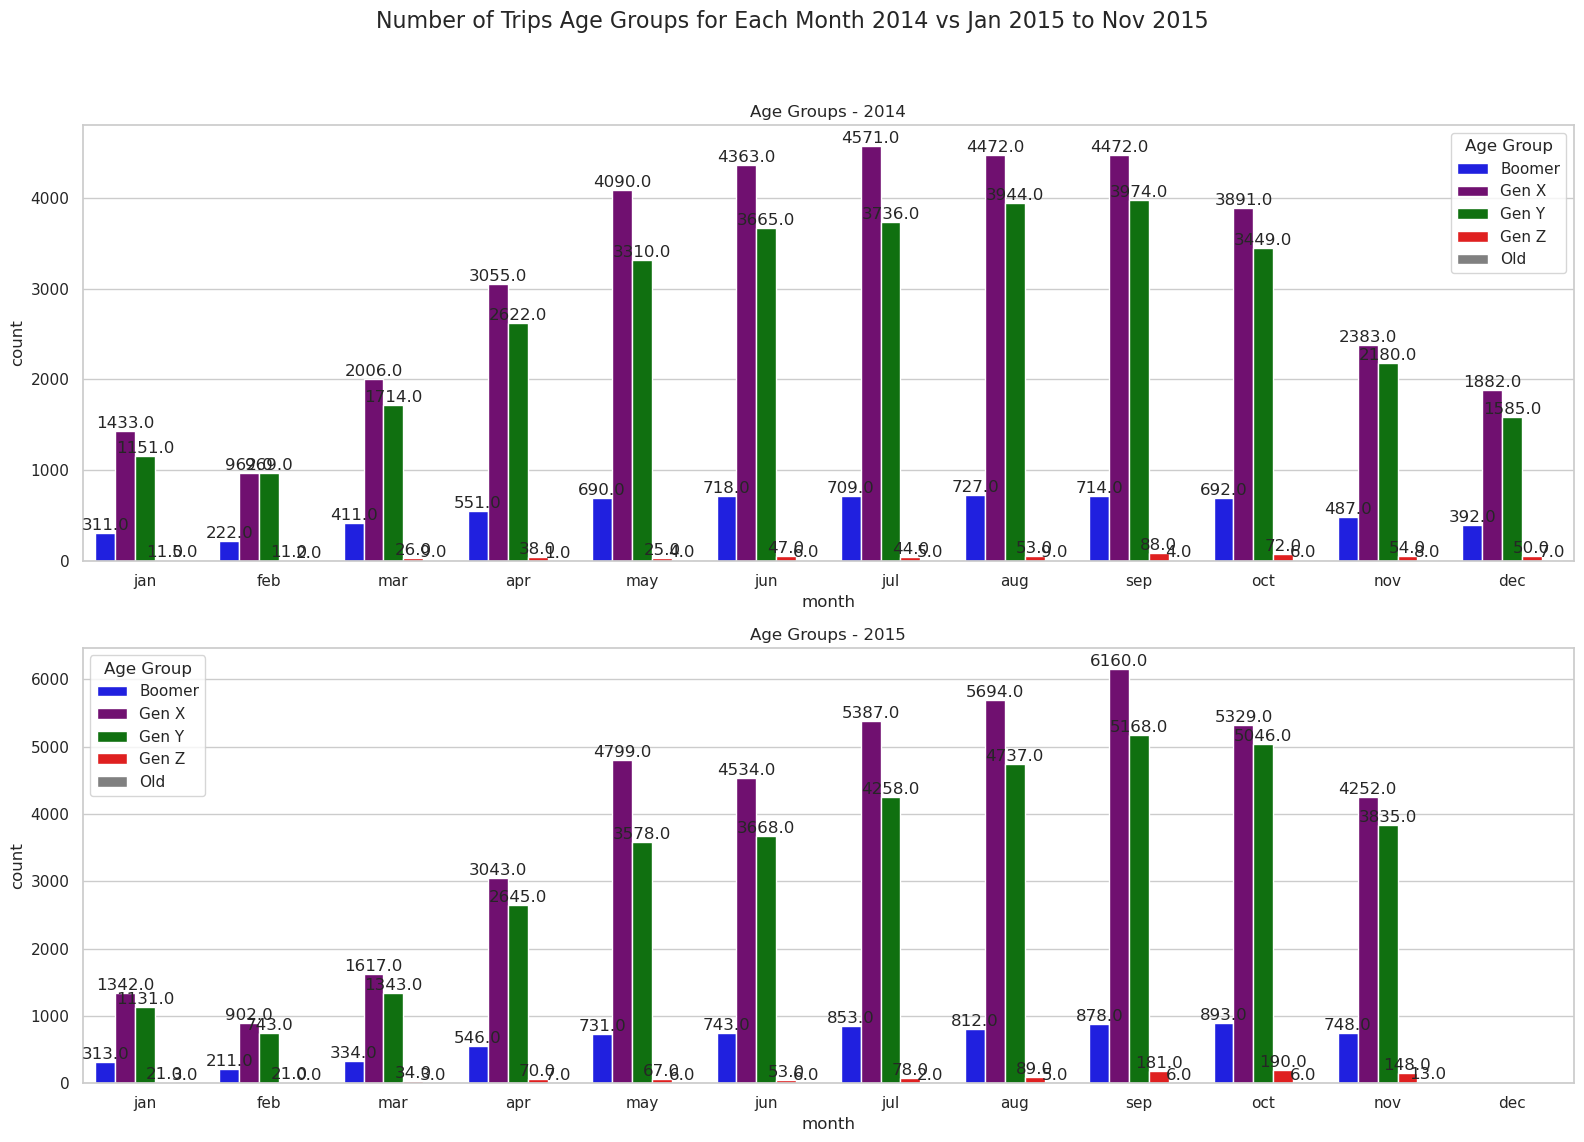

In [96]:
# Create two separate countplots for each year
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Filter data for the year 2014
df_2014 = df_1[df_1['year'] == '2014'] #df_2014 = df_1[df_1['date'].dt.year == 2014]

# Filter data for the year 2015
df_2015 = df_1[df_1['year'] == '2015'] #df_2015 = df_1[df_1['date'].dt.year == 2015]

# Plot countplot for 2014
ax_2014 = sns.countplot(x='month', hue='age_group', data=df_2014,
                        order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        palette={'Boomer': 'blue', 'Gen X': 'purple', 'Gen Y': 'green', 'Gen Z': 'red', 'Old': 'grey'},
                         hue_order=['Boomer', 'Gen X', 'Gen Y', 'Gen Z','Old'],
                        ax=axes[0])
ax_2014.set_title('Age Groups - 2014')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2014
ax_2014.legend(title='Age Group', labels=['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old'])

# Plot countplot for 2015
ax_2015 = sns.countplot(x='month', hue='age_group', data=df_2015,
                        order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        palette={'Boomer': 'blue', 'Gen X': 'purple', 'Gen Y': 'green', 'Gen Z': 'red', 'Old': 'grey'},
                        hue_order=['Boomer', 'Gen X', 'Gen Y', 'Gen Z','Old'],
                        ax=axes[1])
ax_2015.set_title('Age Groups - 2015')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2015
ax_2015.legend(title='Age Group', labels=['Boomer', 'Gen X', 'Gen Y', 'Gen Z','Old'])

# Add title and adjust spacing between subplots
plt.suptitle('Number of Trips Age Groups for Each Month 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as '09_age_group_2014_2015_200230731_bar_monthly.png'
#plt.savefig('05_age_group_2014_2015_200230731_bar_monthly.png', dpi=100, bbox_inches="tight")

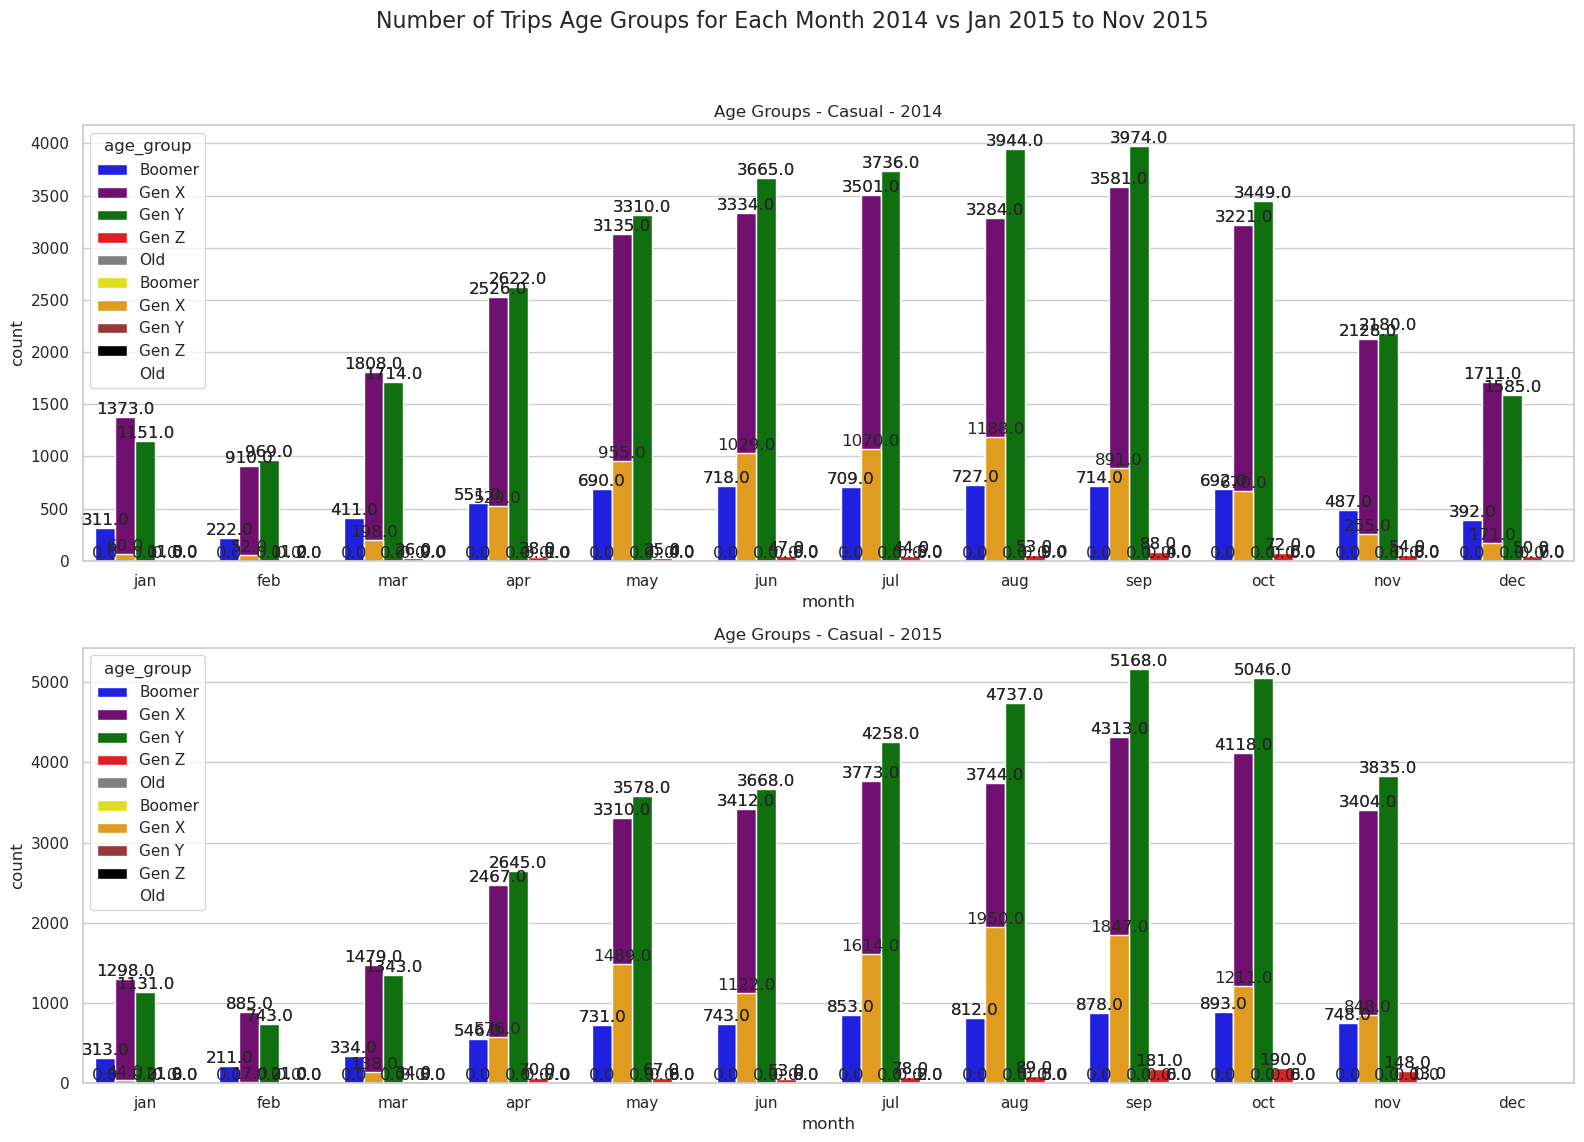

In [97]:
# Create two separate countplots for each year
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Filter data for the year 2014
df_2014 = df_1[df_1['year'] == '2014']

# Filter data for the year 2015
df_2015 = df_1[df_1['year'] == '2015']

# Plot countplot for 2014 - Subscriber
ax_2014_subscriber = sns.countplot(x='month', hue='age_group', data=df_2014[df_2014['user_type'] == 'Subscriber'],
                                   order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                                   palette={'Boomer': 'blue', 'Gen X': 'purple', 'Gen Y': 'green', 'Gen Z': 'red', 'Old': 'grey'},
                                   hue_order=['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old'],
                                   ax=axes[0])
ax_2014_subscriber.set_title('Age Groups - Subscriber - 2014')

# Add bar labels for each bar in 2014 - Subscriber
for p in ax_2014_subscriber.patches:
    height = p.get_height()
    ax_2014_subscriber.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                                ha='center', va='bottom')

# Plot countplot for 2014 - Casual
ax_2014_casual = sns.countplot(x='month', hue='age_group', data=df_2014[df_2014['user_type'] == 'Casual'],
                               order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                               palette={'Boomer': 'yellow', 'Gen X': 'orange', 'Gen Y': 'brown', 'Gen Z': 'black', 'Old': 'white'},
                               hue_order=['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old'],
                               ax=axes[0])
ax_2014_casual.set_title('Age Groups - Casual - 2014')

# Add bar labels for each bar in 2014 - Casual
for p in ax_2014_casual.patches:
    height = p.get_height()
    ax_2014_casual.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                            ha='center', va='bottom')

# Plot countplot for 2015 - Subscriber
ax_2015_subscriber = sns.countplot(x='month', hue='age_group', data=df_2015[df_2015['user_type'] == 'Subscriber'],
                                   order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                                   palette={'Boomer': 'blue', 'Gen X': 'purple', 'Gen Y': 'green', 'Gen Z': 'red', 'Old': 'grey'},
                                   hue_order=['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old'],
                                   ax=axes[1])
ax_2015_subscriber.set_title('Age Groups - Subscriber - 2015')

# Add bar labels for each bar in 2015 - Subscriber
for p in ax_2015_subscriber.patches:
    height = p.get_height()
    ax_2015_subscriber.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                                ha='center', va='bottom')

# Plot countplot for 2015 - Casual
ax_2015_casual = sns.countplot(x='month', hue='age_group', data=df_2015[df_2015['user_type'] == 'Casual'],
                               order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                               palette={'Boomer': 'yellow', 'Gen X': 'orange', 'Gen Y': 'brown', 'Gen Z': 'black', 'Old': 'white'},
                               hue_order=['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old'],
                               ax=axes[1])
ax_2015_casual.set_title('Age Groups - Casual - 2015')

# Add bar labels for each bar in 2015 - Casual
for p in ax_2015_casual.patches:
    height = p.get_height()
    ax_2015_casual.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                            ha='center', va='bottom')

# Add title and adjust spacing between subplots
plt.suptitle('Number of Trips Age Groups for Each Month 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">Above figure shows the monthly age group between subscriber and casual.<p>
</div>

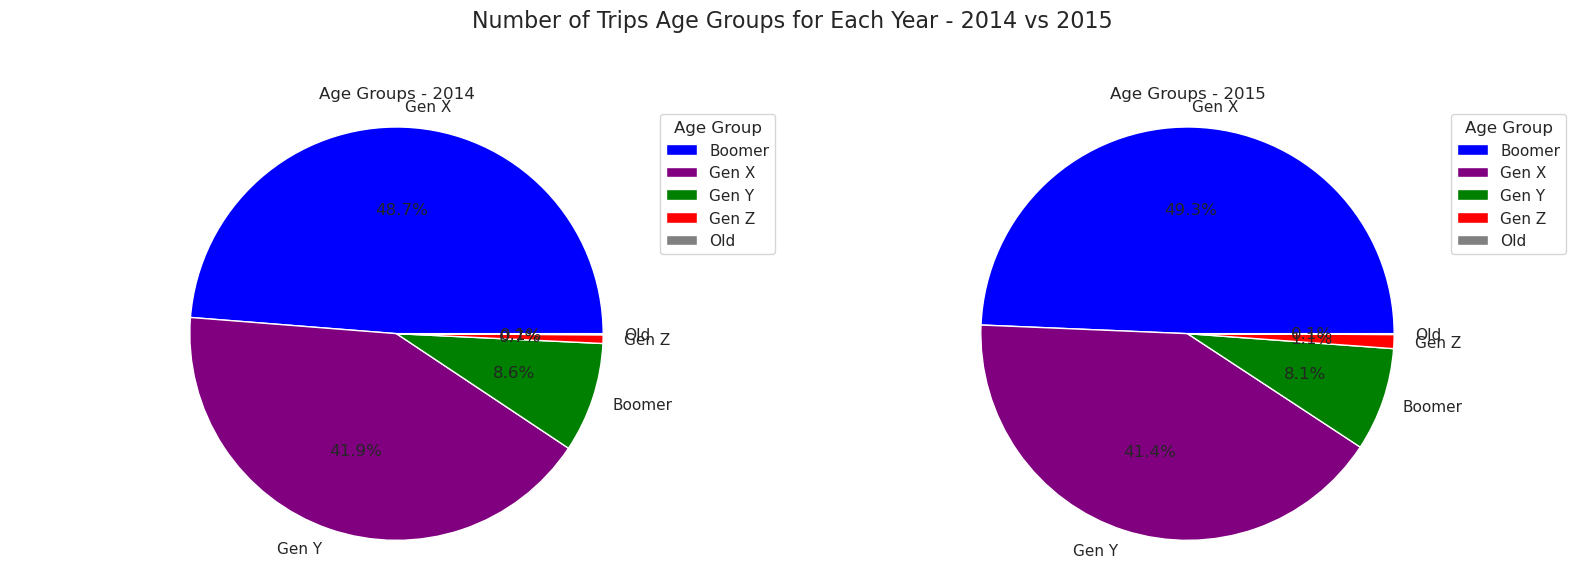

In [98]:
# Calculate the count of each age group for 2014 and 2015
age_group_counts_2014 = df_2014['age_group'].value_counts()
age_group_counts_2015 = df_2015['age_group'].value_counts()

# Create the pie charts
plt.figure(figsize=(16, 6))

# Plot for 2014
plt.subplot(1, 2, 1)
plt.pie(age_group_counts_2014, labels=age_group_counts_2014.index, autopct='%1.1f%%', colors=['blue', 'purple', 'green', 'red', 'grey'])
plt.title('Age Groups - 2014')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.legend(title='Age Group', labels=['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old'])

# Plot for 2015
plt.subplot(1, 2, 2)
plt.pie(age_group_counts_2015, labels=age_group_counts_2015.index, autopct='%1.1f%%', colors=['blue', 'purple', 'green', 'red', 'grey'])
plt.title('Age Groups - 2015')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.legend(title='Age Group', labels=['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old'])

# Add title
plt.suptitle('Number of Trips Age Groups for Each Year - 2014 vs 2015', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as 'age_group_2014_2015_pie_chart.png'
#plt.savefig('06. age_group_2014_2015_pie_chart.png', dpi=100)

Text(91.25, 0.5, 'Start Time (Hour)')

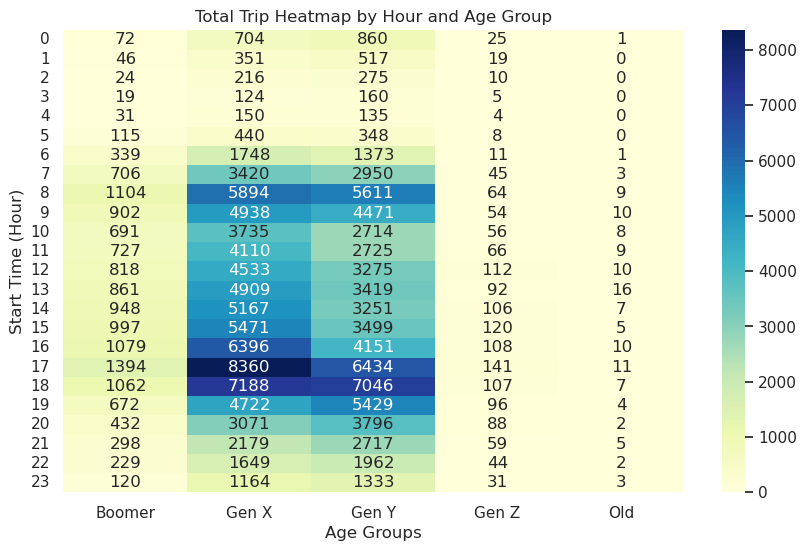

In [99]:
# Group the data by both hour of start_time and user_type
#pivot_df = df_1.groupby([df_1['start_time'].dt.hour, 'age_group'])['user_type'].count().unstack()
# Convert values to integers
# Convert non-finite values to zeros and then to integers
pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='age_group', values='user_type', aggfunc='count')
pivot_df = pivot_df[['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old']].fillna(0).astype(int)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Total Trip Heatmap by Hour and Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Start Time (Hour)')

#### Neighborhood start and age group

In [100]:
# Calculate the counts of user_type for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_start', 'borough_start'])['age_group'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts= pd.DataFrame(neighborhood_counts).fillna(0).astype(int)

# Sort neighborhoods based on descending counts of Subscriber user_type
df_neighborhood_counts = df_neighborhood_counts.sort_values(by=['Gen X'], ascending=False)


# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts['Gen X'].cumsum() / df_neighborhood_counts['Gen X'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Display the filtered DataFrame
filtered_df

age_group                                    Boomer  Gen X  Gen Y  Gen Z  Old  \
neighborhood_start            borough_start                                     
East Chelsea                  Manhattan        1057   5797   3972     43   22   
TriBeCa/Civic Center          Manhattan         733   4229   2621     59    5   
Greenwich Village North       Manhattan         828   3609   3632    196    8   
Union Sq                      Manhattan         682   3499   2894     39    2   
East Village                  Manhattan         594   3453   5227    138    2   
Murray Hill                   Manhattan         675   3307   2975     26    4   
Clinton East                  Manhattan         553   3197   2563     22    3   
Meatpacking/West Village West Manhattan         394   2649   1815     48    7   
Battery Park City             Manhattan         370   2457   1448     47    9   
West Chelsea/Hudson Yards     Manhattan         313   2337   1817     24    4   
Lower East Side               Manhattan         392   2294   2482     62    6   
West Village                  Manhattan         428   2202   2121     34    1   
Garment District              Manhattan         390   2165   1513      5    1   
Midtown Center                Manhattan         361   2089   1127     11    0   
Flatiron                      Manhattan         378   1946   1578     23    5   
Financial District North      Manhattan         292   1825   1535     38    1   
Little Italy/NoLiTa           Manhattan         285   1791   1887     38    2   
Two Bridges/Seward Park       Manhattan         342   1735   1214     59   12   
Penn Station/Madison Sq West  Manhattan         309   1722   1353     24    0   
Gramercy                      Manhattan         353   1679   2186     77    2   
Midtown South                 Manhattan         251   1556   1353     11    2   
Times Sq/Theatre District     Manhattan         246   1549    918     14    0   
Kips Bay                      Manhattan         261   1497   1845     33    1   
Midtown East                  Manhattan         223   1445   1026      3    0   
Greenwich Village South       Manhattan         293   1441   1611     60    6   
Fort Greene                   Brooklyn          128   1329   1112     24    0   
Midtown North                 Manhattan         151   1214    645      8    0   
Hudson Sq                     Manhattan         195   1200   1050     20    0   

age_group                                    Percentage  
neighborhood_start            borough_start              
East Chelsea                  Manhattan        7.188829  
TriBeCa/Civic Center          Manhattan       12.433190  
Greenwich Village North       Manhattan       16.908692  
Union Sq                      Manhattan       21.247783  
East Village                  Manhattan       25.529830  
Murray Hill                   Manhattan       29.630824  
Clinton East                  Manhattan       33.595407  
Meatpacking/West Village West Manhattan       36.880418  
Battery Park City             Manhattan       39.927330  
West Chelsea/Hudson Yards     Manhattan       42.825432  
Lower East Side               Manhattan       45.670209  
West Village                  Manhattan       48.400898  
Garment District              Manhattan       51.085703  
Midtown Center                Manhattan       53.676261  
Flatiron                      Manhattan       56.089485  
Financial District North      Manhattan       58.352658  
Little Italy/NoLiTa           Manhattan       60.573668  
Two Bridges/Seward Park       Manhattan       62.725232  
Penn Station/Madison Sq West  Manhattan       64.860675  
Gramercy                      Manhattan       66.942794  
Midtown South                 Manhattan       68.872382  
Times Sq/Theatre District     Manhattan       70.793289  
Kips Bay                      Manhattan       72.649710  
Midtown East                  Manhattan       74.441647  
Greenwich Village South       Manhattan       76.228624  
For

In [101]:
# Calculate the counts of user_type for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_start', 'borough_start'])['age_group'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts= pd.DataFrame(neighborhood_counts).fillna(0).astype(int)

# Sort neighborhoods based on descending counts of Subscriber user_type
df_neighborhood_counts = df_neighborhood_counts.sort_values(by=['Gen Y'], ascending=False)


# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts['Gen Y'].cumsum() / df_neighborhood_counts['Gen Y'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Display the filtered DataFrame
filtered_df

age_group                                     Boomer  Gen X  Gen Y  Gen Z  \
neighborhood_start             borough_start                                
East Village                   Manhattan         594   3453   5227    138   
East Chelsea                   Manhattan        1057   5797   3972     43   
Greenwich Village North        Manhattan         828   3609   3632    196   
Murray Hill                    Manhattan         675   3307   2975     26   
Union Sq                       Manhattan         682   3499   2894     39   
TriBeCa/Civic Center           Manhattan         733   4229   2621     59   
Clinton East                   Manhattan         553   3197   2563     22   
Lower East Side                Manhattan         392   2294   2482     62   
Gramercy                       Manhattan         353   1679   2186     77   
West Village                   Manhattan         428   2202   2121     34   
Little Italy/NoLiTa            Manhattan         285   1791   1887     38   
Kips Bay                       Manhattan         261   1497   1845     33   
West Chelsea/Hudson Yards      Manhattan         313   2337   1817     24   
Meatpacking/West Village West  Manhattan         394   2649   1815     48   
Stuy Town/Peter Cooper Village Manhattan         304   1173   1790     63   
Greenwich Village South        Manhattan         293   1441   1611     60   
Flatiron                       Manhattan         378   1946   1578     23   
Financial District North       Manhattan         292   1825   1535     38   
Garment District               Manhattan         390   2165   1513      5   
Battery Park City              Manhattan         370   2457   1448     47   
Midtown South                  Manhattan         251   1556   1353     11   
Penn Station/Madison Sq West   Manhattan         309   1722   1353     24   
Two Bridges/Seward Park        Manhattan         342   1735   1214     59   
Midtown Center                 Manhattan         361   2089   1127     11   
Fort Greene                    Brooklyn          128   1329   1112     24   
Hudson Sq                      Manhattan         195   1200   1050     20   

age_group                                     Old  Percentage  
neighborhood_start             borough_start                   
East Village                   Manhattan        2    7.636119  
East Chelsea                   Manhattan       22   13.438810  
Greenwich Village North        Manhattan        8   18.744796  
Murray Hill                    Manhattan        4   23.090970  
Union Sq                       Manhattan        2   27.318812  
TriBeCa/Civic Center           Manhattan        5   31.147828  
Clinton East                   Manhattan        3   34.892113  
Lower East Side                Manhattan        6   38.518064  
Gramercy                       Manhattan        2   41.711589  
West Village                   Manhattan        1   44.810156  
Little Italy/NoLiTa            Manhattan        2   47.566873  
Kips Bay                       Manhattan        1   50.262231  
West Chelsea/Hudson Yards      Manhattan        4   52.916685  
Meatpacking/West Village West  Manhattan        7   55.568217  
Stuy Town/Peter Cooper Village Manhattan        1   58.183226  
Greenwich Village South        Manhattan        6   60.536734  
Flatiron                       Manhattan        5   62.842033  
Financial District North       Manhattan        1   65.084513  
Garment District               Manhattan        1   67.294853  
Battery Park City              Manhattan        9   69.410235  
Midtown South                  Manhattan        2   71.386831  
Penn Station/Madison Sq West   Manhattan        0   73.363428  
Two Bridges/Seward Park        Manhattan       12   75.136959  
Midtown Center                 Manhattan        0   76.783392  
Fort Greene                    Brooklyn         0   78.407912  
Hudson Sq                      Manhattan        0   79.941856

In [102]:
# Calculate the counts of age_group for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_start', 'borough_start'])['age_group'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts).fillna(0).astype(int)

# Sort neighborhoods based on descending counts of Gen X age_group
df_neighborhood_counts = df_neighborhood_counts.sort_values(by=['Gen X'], ascending=False)

# Calculate Pareto percentages for Gen X age_group
pareto = 100 * df_neighborhood_counts['Gen X'].cumsum() / df_neighborhood_counts['Gen X'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['start_station_longitude'], df_1['start_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['start_station_latitude'].mean(), gdf['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    max_age_group = row.idxmax()  # Get the age_group with the highest count
    
    if max_age_group == 'Boomer':
        color = 'blue'
    elif max_age_group == 'Gen X':
        color = 'purple'
    elif max_age_group == 'Gen Y':
        color = 'green'
    elif max_age_group == 'Gen Z':
        color = 'red'
    else:
        color = 'grey'
    
    # Get the count value from the neighborhood_counts DataFrame
    count = row[max_age_group]
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_start'].values:
        latitude = gdf.loc[(gdf['neighborhood_start'] == neighborhood) & (gdf['borough_start'] == borough), 'start_station_latitude'].iloc[0]
        longitude = gdf.loc[(gdf['neighborhood_start'] == neighborhood) & (gdf['borough_start'] == borough), 'start_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Age Group: {max_age_group}\nNeighborhood Start: {neighborhood}\nBorough Start: {borough}\nCount: {count}"
        ).add_to(m)
    
# Display the Folium map in the notebook
#display(HTML(m._repr_html_()))

# Save the map as an HTML file
output_file = "01_1.map_neigh_start_age_group_gen_X.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

In [103]:
# Calculate the counts of age_group for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_start', 'borough_start'])['age_group'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts).fillna(0).astype(int)

# Sort neighborhoods based on descending counts of Gen X age_group
df_neighborhood_counts = df_neighborhood_counts.sort_values(by=['Gen Y'], ascending=False)

# Calculate Pareto percentages for Gen X age_group
pareto = 100 * df_neighborhood_counts['Gen Y'].cumsum() / df_neighborhood_counts['Gen Y'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['start_station_longitude'], df_1['start_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['start_station_latitude'].mean(), gdf['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    max_age_group = row.idxmax()  # Get the age_group with the highest count
    
    if max_age_group == 'Boomer':
        color = 'blue'
    elif max_age_group == 'Gen X':
        color = 'purple'
    elif max_age_group == 'Gen Y':
        color = 'green'
    elif max_age_group == 'Gen Z':
        color = 'red'
    else:
        color = 'grey'
    
    # Get the count value from the neighborhood_counts DataFrame
    count = row[max_age_group]
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_start'].values:
        latitude = gdf.loc[(gdf['neighborhood_start'] == neighborhood) & (gdf['borough_start'] == borough), 'start_station_latitude'].iloc[0]
        longitude = gdf.loc[(gdf['neighborhood_start'] == neighborhood) & (gdf['borough_start'] == borough), 'start_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Age Group: {max_age_group}\nNeighborhood Start: {neighborhood}\nBorough Start: {borough}\nCount: {count}"
        ).add_to(m)
    
# Display the Folium map in the notebook
#display(HTML(m._repr_html_()))

# Save the map as an HTML file
output_file = "01_2.map_neigh_start_age_group_gen_Y.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

### Neighborhood end and age group

In [104]:
# Calculate the counts of age_group for each neighborhood
neighborhood_counts_end = df_1.groupby(['neighborhood_end', 'borough_end'])['age_group'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts_end = pd.DataFrame(neighborhood_counts_end)

# Sort neighborhoods based on descending counts of age_group
df_neighborhood_counts_end = df_neighborhood_counts_end.sort_values(by=['Gen X'], ascending=False)

# Fill NaN values with 0
df_neighborhood_counts_end = df_neighborhood_counts_end.fillna(0)

# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts_end['Gen X'].cumsum() / df_neighborhood_counts_end['Gen X'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts_end['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts_end[df_neighborhood_counts_end['Percentage'] <= 81]

# Display the filtered DataFrame
filtered_df

age_group                                   Boomer   Gen X   Gen Y  Gen Z  \
neighborhood_end               borough_end                                  
East Chelsea                   Manhattan    1039.0  5591.0  3991.0   42.0   
TriBeCa/Civic Center           Manhattan     743.0  4403.0  2437.0   52.0   
East Village                   Manhattan     664.0  3592.0  5044.0  135.0   
Greenwich Village North        Manhattan     728.0  3485.0  3747.0  183.0   
Union Sq                       Manhattan     639.0  3458.0  2910.0   46.0   
Murray Hill                    Manhattan     681.0  3092.0  2743.0   18.0   
Clinton East                   Manhattan     524.0  3024.0  2421.0   21.0   
Meatpacking/West Village West  Manhattan     406.0  2679.0  1896.0   44.0   
Battery Park City              Manhattan     370.0  2525.0  1404.0   44.0   
West Chelsea/Hudson Yards      Manhattan     298.0  2425.0  1937.0   22.0   
Lower East Side                Manhattan     370.0  2371.0  2525.0   56.0   
West Village                   Manhattan     444.0  2259.0  2149.0   43.0   
Midtown Center                 Manhattan     403.0  2198.0  1263.0   17.0   
Garment District               Manhattan     379.0  2137.0  1350.0   14.0   
Penn Station/Madison Sq West   Manhattan     364.0  1942.0  1316.0   24.0   
Financial District North       Manhattan     355.0  1913.0  1550.0   41.0   
Flatiron                       Manhattan     402.0  1879.0  1523.0   30.0   
Little Italy/NoLiTa            Manhattan     247.0  1798.0  1894.0   37.0   
Gramercy                       Manhattan     385.0  1762.0  2210.0   59.0   
Two Bridges/Seward Park        Manhattan     326.0  1688.0  1236.0   61.0   
Midtown South                  Manhattan     214.0  1497.0  1337.0   14.0   
Midtown East                   Manhattan     206.0  1432.0  1086.0    5.0   
Times Sq/Theatre District      Manhattan     209.0  1427.0   904.0    8.0   
Greenwich Village South        Manhattan     260.0  1396.0  1720.0   70.0   
Kips Bay                       Manhattan     287.0  1395.0  1967.0   29.0   
Fort Greene                    Brooklyn      133.0  1364.0  1186.0   22.0   
Stuy Town/Peter Cooper Village Manhattan     277.0  1222.0  1765.0   48.0   
UN/Turtle Bay South            Manhattan     196.0  1190.0   807.0    8.0   

age_group                                    Old  Percentage  
neighborhood_end               borough_end                    
East Chelsea                   Manhattan    18.0    6.933370  
TriBeCa/Civic Center           Manhattan     5.0   12.393507  
East Village                   Manhattan     1.0   16.847927  
Greenwich Village North        Manhattan     6.0   21.169657  
Union Sq                       Manhattan     3.0   25.457905  
Murray Hill                    Manhattan     1.0   29.292278  
Clinton East                   Manhattan     3.0   33.042324  
Meatpacking/West Village West  Manhattan     4.0   36.364538  
Battery Park City              Manhattan     6.0   39.495777  
West Chelsea/Hudson Yards      Manhattan     2.0   42.503007  
Lower East Side                Manhattan    11.0   45.443272  
West Village                   Manhattan     5.0   48.244646  
Midtown Center                 Manhattan     1.0   50.970374  
Garment District               Manhattan     0.0   53.620457  
Penn Station/Madison Sq West   Manhattan     2.0   56.028721  
Financial District North       Manhattan     1.0   58.401022  
Flatiron                       Manhattan     2.0   60.731160  
Little Italy/NoLiTa            Manhattan     1.0   62.960850  
Gramercy                       Manhattan     3.0   65.145897  
Two Bridges/Seward Park        Manhattan    15.0   67.239177  
Midtown South                  Manhattan     0.0   69.095599  
Midtown East                   Manhattan     1.0   70.871415  
Times Sq/Theatre District      Manhattan     0.0   72.641030  
Greenwich Village South        Manhattan    10.0   74.372202  
Kips Bay                       Manhattan     2.0   

In [105]:
# Calculate the counts of age_group for each neighborhood
neighborhood_counts_end = df_1.groupby(['neighborhood_end', 'borough_end'])['age_group'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts_end = pd.DataFrame(neighborhood_counts_end)

# Sort neighborhoods based on descending counts of age_group
df_neighborhood_counts_end = df_neighborhood_counts_end.sort_values(by=['Gen Y'], ascending=False)

# Fill NaN values with 0
df_neighborhood_counts_end = df_neighborhood_counts_end.fillna(0)

# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts_end['Gen Y'].cumsum() / df_neighborhood_counts_end['Gen Y'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts_end['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts_end[df_neighborhood_counts_end['Percentage'] <= 81]

# Display the filtered DataFrame
filtered_df

age_group                                   Boomer   Gen X   Gen Y  Gen Z  \
neighborhood_end               borough_end                                  
East Village                   Manhattan     664.0  3592.0  5044.0  135.0   
East Chelsea                   Manhattan    1039.0  5591.0  3991.0   42.0   
Greenwich Village North        Manhattan     728.0  3485.0  3747.0  183.0   
Union Sq                       Manhattan     639.0  3458.0  2910.0   46.0   
Murray Hill                    Manhattan     681.0  3092.0  2743.0   18.0   
Lower East Side                Manhattan     370.0  2371.0  2525.0   56.0   
TriBeCa/Civic Center           Manhattan     743.0  4403.0  2437.0   52.0   
Clinton East                   Manhattan     524.0  3024.0  2421.0   21.0   
Gramercy                       Manhattan     385.0  1762.0  2210.0   59.0   
West Village                   Manhattan     444.0  2259.0  2149.0   43.0   
Kips Bay                       Manhattan     287.0  1395.0  1967.0   29.0   
West Chelsea/Hudson Yards      Manhattan     298.0  2425.0  1937.0   22.0   
Meatpacking/West Village West  Manhattan     406.0  2679.0  1896.0   44.0   
Little Italy/NoLiTa            Manhattan     247.0  1798.0  1894.0   37.0   
Stuy Town/Peter Cooper Village Manhattan     277.0  1222.0  1765.0   48.0   
Greenwich Village South        Manhattan     260.0  1396.0  1720.0   70.0   
Financial District North       Manhattan     355.0  1913.0  1550.0   41.0   
Flatiron                       Manhattan     402.0  1879.0  1523.0   30.0   
Battery Park City              Manhattan     370.0  2525.0  1404.0   44.0   
Garment District               Manhattan     379.0  2137.0  1350.0   14.0   
Midtown South                  Manhattan     214.0  1497.0  1337.0   14.0   
Penn Station/Madison Sq West   Manhattan     364.0  1942.0  1316.0   24.0   
Midtown Center                 Manhattan     403.0  2198.0  1263.0   17.0   
Two Bridges/Seward Park        Manhattan     326.0  1688.0  1236.0   61.0   
Hudson Sq                      Manhattan     181.0  1142.0  1219.0   23.0   
Fort Greene                    Brooklyn      133.0  1364.0  1186.0   22.0   

age_group                                    Old  Percentage  
neighborhood_end               borough_end                    
East Village                   Manhattan     1.0    7.368775  
East Chelsea                   Manhattan    18.0   13.199223  
Greenwich Village North        Manhattan     6.0   18.673211  
Union Sq                       Manhattan     3.0   22.924428  
Murray Hill                    Manhattan     1.0   26.931674  
Lower East Side                Manhattan    11.0   30.620444  
TriBeCa/Civic Center           Manhattan     5.0   34.180655  
Clinton East                   Manhattan     3.0   37.717491  
Gramercy                       Manhattan     3.0   40.946078  
West Village                   Manhattan     5.0   44.085550  
Kips Bay                       Manhattan     2.0   46.959139  
West Chelsea/Hudson Yards      Manhattan     2.0   49.788900  
Meatpacking/West Village West  Manhattan     4.0   52.558765  
Little Italy/NoLiTa            Manhattan     1.0   55.325707  
Stuy Town/Peter Cooper Village Manhattan     3.0   57.904194  
Greenwich Village South        Manhattan    10.0   60.416941  
Financial District North       Manhattan     1.0   62.681334  
Flatiron                       Manhattan     2.0   64.906283  
Battery Park City              Manhattan     6.0   66.957386  
Garment District               Manhattan     0.0   68.929599  
Midtown South                  Manhattan     0.0   70.882821  
Penn Station/Madison Sq West   Manhattan     2.0   72.805364  
Midtown Center                 Manhattan     1.0   74.650480  
Two Bridges/Seward Park        Manhattan    15.0   76.456151  
Hudson Sq                      Manhattan     0.0   78.236987  
Fort Greene                    Brooklyn      0.0   79.969613

In [106]:
# Calculate the counts of age_group for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_end', 'borough_end'])['age_group'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts).fillna(0).astype(int)

# Sort neighborhoods based on descending counts of Gen X age_group
df_neighborhood_counts = df_neighborhood_counts.sort_values(by=['Gen X'], ascending=False)

# Calculate Pareto percentages for Gen X age_group
pareto = 100 * df_neighborhood_counts['Gen X'].cumsum() / df_neighborhood_counts['Gen X'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['end_station_longitude'], df_1['end_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['end_station_latitude'].mean(), gdf['end_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    max_age_group = row.idxmax()  # Get the age_group with the highest count
    
    if max_age_group == 'Boomer':
        color = 'blue'
    elif max_age_group == 'Gen X':
        color = 'purple'
    elif max_age_group == 'Gen Y':
        color = 'green'
    elif max_age_group == 'Gen Z':
        color = 'red'
    else:
        color = 'grey'
    
    # Get the count value from the neighborhood_counts DataFrame
    count = row[max_age_group]
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_end'].values:
        latitude = gdf.loc[(gdf['neighborhood_end'] == neighborhood) & (gdf['borough_end'] == borough), 'end_station_latitude'].iloc[0]
        longitude = gdf.loc[(gdf['neighborhood_end'] == neighborhood) & (gdf['borough_end'] == borough), 'end_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Age Group: {max_age_group}\nNeighborhood End: {neighborhood}\nBorough End: {borough}\nCount: {count}"
        ).add_to(m)

# Display the Folium map in the notebook
#HTML(m._repr_html_())

# Save the map as an HTML file
output_file = "02_1.map_neigh_end_age_group_gen_X.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

In [107]:
# Calculate the counts of age_group for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_end', 'borough_end'])['age_group'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts).fillna(0).astype(int)

# Sort neighborhoods based on descending counts of Gen X age_group
df_neighborhood_counts = df_neighborhood_counts.sort_values(by=['Gen Y'], ascending=False)

# Calculate Pareto percentages for Gen X age_group
pareto = 100 * df_neighborhood_counts['Gen Y'].cumsum() / df_neighborhood_counts['Gen Y'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['end_station_longitude'], df_1['end_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['end_station_latitude'].mean(), gdf['end_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    max_age_group = row.idxmax()  # Get the age_group with the highest count
    
    if max_age_group == 'Boomer':
        color = 'blue'
    elif max_age_group == 'Gen X':
        color = 'purple'
    elif max_age_group == 'Gen Y':
        color = 'green'
    elif max_age_group == 'Gen Z':
        color = 'red'
    else:
        color = 'grey'
    
    # Get the count value from the neighborhood_counts DataFrame
    count = row[max_age_group]
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_end'].values:
        latitude = gdf.loc[(gdf['neighborhood_end'] == neighborhood) & (gdf['borough_end'] == borough), 'end_station_latitude'].iloc[0]
        longitude = gdf.loc[(gdf['neighborhood_end'] == neighborhood) & (gdf['borough_end'] == borough), 'end_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Age Group: {max_age_group}\nNeighborhood End: {neighborhood}\nBorough End: {borough}\nCount: {count}"
        ).add_to(m)

# Display the Folium map in the notebook
#HTML(m._repr_html_())

# Save the map as an HTML file
output_file = "02_2.map_neigh_end_age_group_gen_Y.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
    <b style = "font-family: Arial; font-size: 16px"><b>Reminder</b>:</b><p style = "font-family:Verdana; font-size:14px">The overview of our customer base, utilizing the Pareto principle based on the top 80% of trips categorized by age group, primarily comprises Gen X (highlighted in blue) and Gen Y (highlighted in green) riders in Manhattan.

<ol>
    <li>Gen X and Gen Y account for over 90% of the total trips, with each age group having at least seven times more trips compared to other groups.
    <li>Among the top 21 trips initiated by Gen X, the majority of them originate from points within Manhattan. Similarly, among the top trips, 7 <b>departures</b> are by Gen Y riders. 
    <li>Looking at the top 20 trips concluded by Gen X, most of these journeys culminate in Manhattan. Additionally, 8 of the top trips that conclude at the <b>destination</b> are taken by Gen Y riders.</ol>    
</div>

#### Customers' sex

In [108]:
df_1['sex'].unique()

array(['female', 'male', 'unknown'], dtype=object)

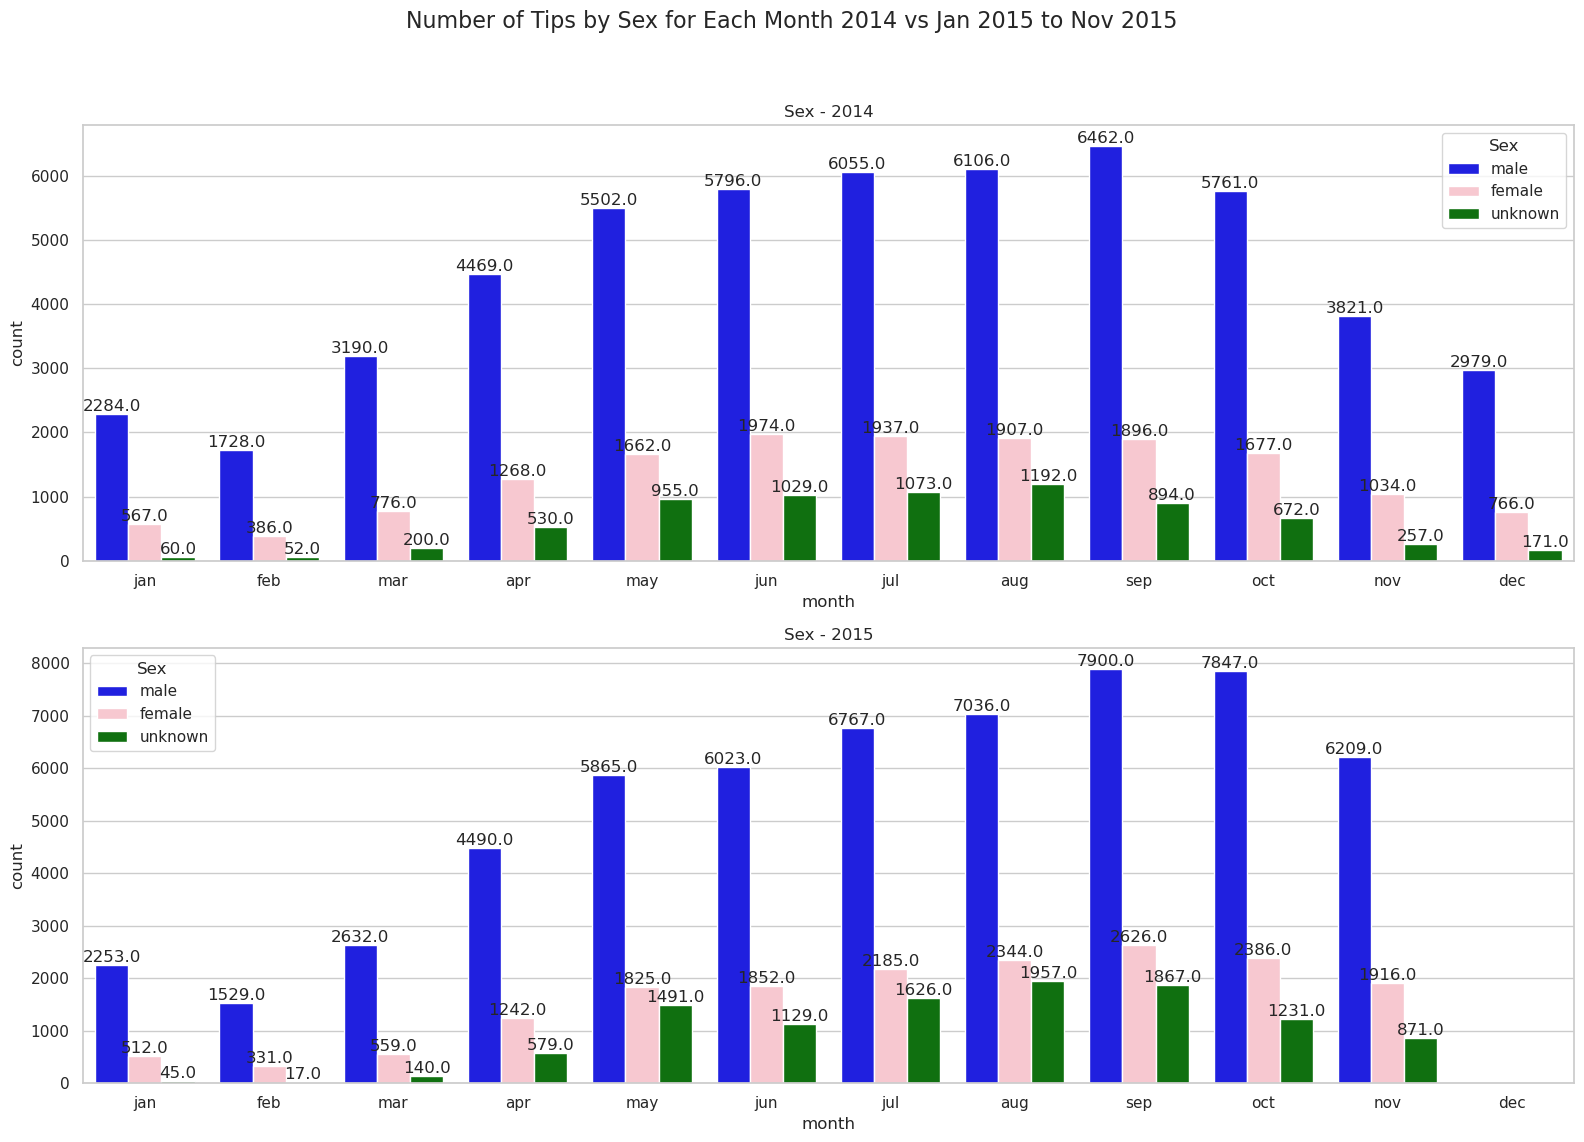

In [109]:

# Create two separate countplots for each year
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot countplot for 2014
ax_2014 = sns.countplot(x='month', hue='sex', data=df_2014,
                        order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        palette={'male': 'blue', 'female': 'pink', 'unknown': 'green'},
                        hue_order=['male', 'female', 'unknown'],
                        ax=axes[0])
ax_2014.set_title('Sex - 2014')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2014
ax_2014.legend(title='Sex', labels=['male', 'female', 'unknown'])

# Plot countplot for 2015
ax_2015 = sns.countplot(x='month', hue='sex', data=df_2015,
                        order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        palette={'male': 'blue', 'female': 'pink', 'unknown': 'green'},
                        hue_order=['male', 'female', 'unknown'],
                        ax=axes[1])
ax_2015.set_title('Sex - 2015')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2015
ax_2015.legend(title='Sex', labels=['male', 'female', 'unknown'])
    
# Add title and adjust spacing between subplots
plt.suptitle('Number of Tips by Sex for Each Month 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as '09_age_group_2014_2015_200230731_bar_monthly.png'
#plt.savefig('07_sex_2014_2015_200230731_bar_monthly.png', dpi=100, bbox_inches="tight")

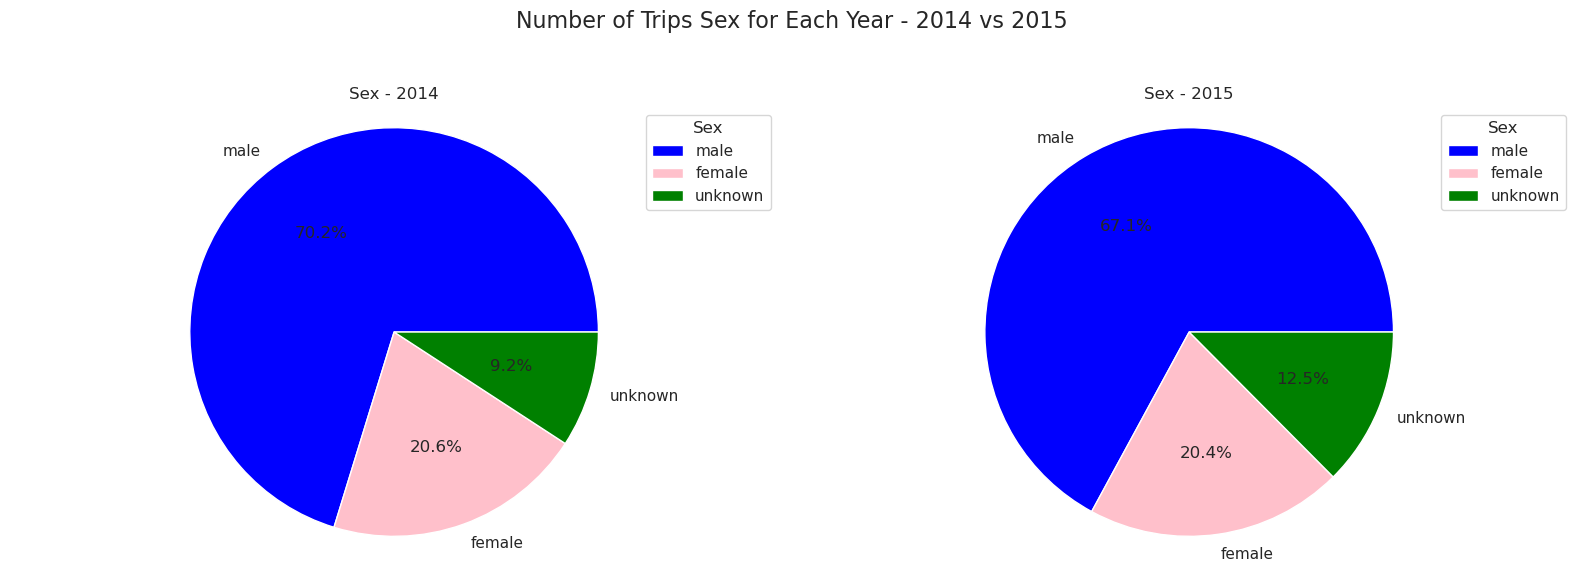

In [110]:
# Calculate the count of each sex for 2014 and 2015
age_group_counts_2014 = df_2014['sex'].value_counts()
age_group_counts_2015 = df_2015['sex'].value_counts()

# Create the pie charts
plt.figure(figsize=(16, 6))

# Plot for 2014
plt.subplot(1, 2, 1)
plt.pie(age_group_counts_2014, labels=age_group_counts_2014.index, autopct='%1.1f%%', colors=['blue', 'pink', 'green', 'red', 'grey'])
plt.title('Sex - 2014')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.legend(title='Sex', labels=['male', 'female', 'unknown'])

# Plot for 2015
plt.subplot(1, 2, 2)
plt.pie(age_group_counts_2015, labels=age_group_counts_2015.index, autopct='%1.1f%%', colors=['blue', 'pink', 'green', 'red', 'grey'])
plt.title('Sex - 2015')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.legend(title='Sex', labels=['male', 'female', 'unknown'])

# Add title
plt.suptitle('Number of Trips Sex for Each Year - 2014 vs 2015', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as 'age_group_2014_2015_pie_chart.png'
#plt.savefig('08. sex_2014_2015_pie_chart.png', dpi=100)

Text(91.25, 0.5, 'Start Time (Hour)')

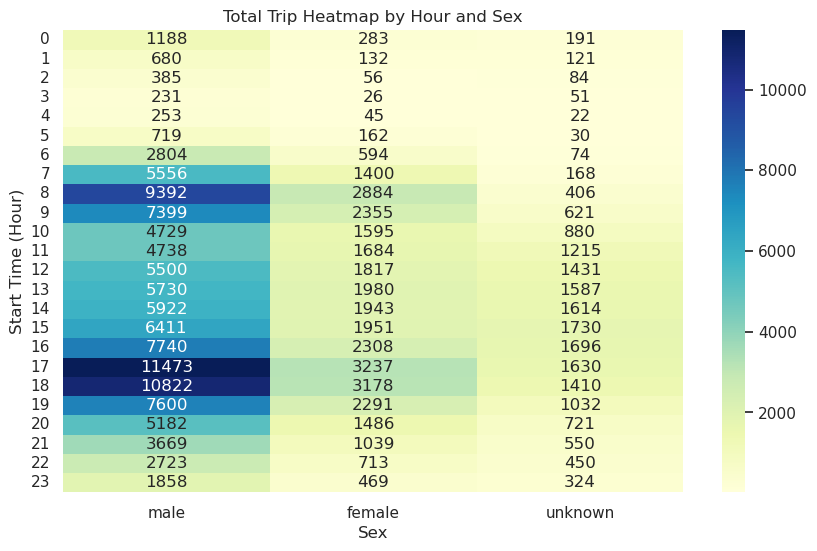

In [111]:
# Group the data by both hour of start_time and user_type
#pivot_df = df_1.groupby([df_1['start_time'].dt.hour, 'age_group'])['user_type'].count().unstack()
# Convert values to integers
# Convert non-finite values to zeros and then to integers
pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='sex', values='user_type', aggfunc='count')
pivot_df = pivot_df[['male', 'female', 'unknown']] #.fillna(0).astype(int)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Total Trip Heatmap by Hour and Sex')
plt.xlabel('Sex')
plt.ylabel('Start Time (Hour)')

#### Neighborhood start and sex

In [112]:
# Calculate the counts of user_type for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_start', 'borough_start'])['sex'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts= pd.DataFrame(neighborhood_counts)

# Sort neighborhoods based on descending counts of Subscriber user_type
df_neighborhood_counts = df_neighborhood_counts.sort_values(by=['male', 'female', 'unknown'], ascending=False)

# Reorder columns so 'Subscriber' comes first, then 'Casual'
df_neighborhood_counts = df_neighborhood_counts[['male', 'female', 'unknown']]

# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts['male'].cumsum() / df_neighborhood_counts['male'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Display the filtered DataFrame
filtered_df

sex                                             male  female  unknown  \
neighborhood_start             borough_start                            
East Chelsea                   Manhattan      8168.0  1868.0    855.0   
East Village                   Manhattan      6339.0  2411.0    664.0   
Greenwich Village North        Manhattan      5720.0  1835.0    718.0   
Murray Hill                    Manhattan      5452.0  1076.0    459.0   
Union Sq                       Manhattan      4956.0  1546.0    614.0   
TriBeCa/Civic Center           Manhattan      4922.0  1536.0   1189.0   
Clinton East                   Manhattan      4815.0   977.0    546.0   
Lower East Side                Manhattan      3339.0  1366.0    531.0   
West Village                   Manhattan      3277.0  1074.0    435.0   
Garment District               Manhattan      3150.0   572.0    352.0   
Gramercy                       Manhattan      3101.0   973.0    223.0   
Meatpacking/West Village West  Manhattan      3040.0  1061.0    812.0   
West Chelsea/Hudson Yards      Manhattan      2884.0   912.0    699.0   
Midtown Center                 Manhattan      2797.0   429.0    362.0   
Flatiron                       Manhattan      2760.0   941.0    229.0   
Penn Station/Madison Sq West   Manhattan      2595.0   554.0    259.0   
Kips Bay                       Manhattan      2579.0   843.0    215.0   
Little Italy/NoLiTa            Manhattan      2570.0   967.0    466.0   
Financial District North       Manhattan      2550.0   689.0    452.0   
Battery Park City              Manhattan      2527.0   973.0    831.0   
Midtown South                  Manhattan      2318.0   559.0    296.0   
Stuy Town/Peter Cooper Village Manhattan      2301.0   846.0    184.0   
Greenwich Village South        Manhattan      2293.0   789.0    329.0   
Midtown East                   Manhattan      2159.0   354.0    184.0   
Two Bridges/Seward Park        Manhattan      2132.0   940.0    290.0   
Times Sq/Theatre District      Manhattan      2049.0   310.0    368.0   

sex                                           Percentage  
neighborhood_start             borough_start              
East Chelsea                   Manhattan        7.247303  
East Village                   Manhattan       12.871770  
Greenwich Village North        Manhattan       17.947012  
Murray Hill                    Manhattan       22.784462  
Union Sq                       Manhattan       27.181821  
TriBeCa/Civic Center           Manhattan       31.549013  
Clinton East                   Manhattan       35.821266  
Lower East Side                Manhattan       38.783894  
West Village                   Manhattan       41.691511  
Garment District               Manhattan       44.486442  
Gramercy                       Manhattan       47.237898  
Meatpacking/West Village West  Manhattan       49.935229  
West Chelsea/Hudson Yards      Manhattan       52.494144  
Midtown Center                 Manhattan       54.975866  
Flatiron                       Manhattan       57.424759  
Penn Station/Madison Sq West   Manhattan       59.727250  
Kips Bay                       Manhattan       62.015545  
Little Italy/NoLiTa            Manhattan       64.295855  
Financial District North       Manhattan       66.558419  
Battery Park City              Manhattan       68.800575  
Midtown South                  Manhattan       70.857290  
Stuy Town/Peter Cooper Village Manhattan       72.898921  
Greenwich Village South        Manhattan       74.933454  
Midtown East                   Manhattan       76.849091  
Two Bridges/Seward Park        Manhattan       78.740772  
Times Sq/Theatre District      Manhattan       80.558809

In [113]:
# Calculate the counts of sex for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_start', 'borough_start'])['sex'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts)

# Sort neighborhoods based on descending counts of male sex
df_neighborhood_counts = df_neighborhood_counts.sort_values(by=['male', 'female', 'unknown'], ascending=False)

# Reorder columns so 'male' comes first, then 'female'
df_neighborhood_counts = df_neighborhood_counts[['male', 'female', 'unknown']]

# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts['male'].cumsum() / df_neighborhood_counts['male'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['start_station_longitude'], df_1['start_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['start_station_latitude'].mean(), gdf['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    
    max_sex = row.idxmax()  # Get the sex with the highest count
    
    if max_sex == 'male':
        color = 'blue'
    elif max_sex == 'female':
        color = 'pink'
    else:
        color = 'green'
    
    # Get the count value from the neighborhood_counts DataFrame
    count = row[max_sex]
    folium.CircleMarker(
        location=[gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_latitude'].iloc[0], 
                  gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_longitude'].iloc[0]],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"Gender: {max_sex}\nNeighborhood: {neighborhood}\nBorough: {borough}\nCount: {count}"
    ).add_to(m)

# Display the Folium map in the notebook
# HTML(m._repr_html_())

# Save the map as an HTML file
output_file = "03. map_neigh_start_sex.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

#### Neighborhood end and sex

In [114]:
# Calculate the counts of user_type for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_end', 'borough_end'])['sex'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts)

# Sort neighborhoods based on descending counts of Subscriber user_type
df_neighborhood_counts = df_neighborhood_counts.sort_values(by=['male', 'female', 'unknown'], ascending=False)

# Reorder columns so 'Subscriber' comes first, then 'Casual'
df_neighborhood_counts = df_neighborhood_counts[['male', 'female', 'unknown']]

# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts['male'].cumsum() / df_neighborhood_counts['male'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Display the filtered DataFrame
filtered_df

sex                                           male  female  unknown  \
neighborhood_end               borough_end                            
East Chelsea                   Manhattan    7779.0  2058.0    844.0   
East Village                   Manhattan    6426.0  2324.0    686.0   
Greenwich Village North        Manhattan    5583.0  1924.0    642.0   
Murray Hill                    Manhattan    5060.0  1029.0    446.0   
Union Sq                       Manhattan    4915.0  1536.0    605.0   
TriBeCa/Civic Center           Manhattan    4882.0  1516.0   1242.0   
Clinton East                   Manhattan    4607.0   877.0    509.0   
Lower East Side                Manhattan    3410.0  1372.0    551.0   
West Village                   Manhattan    3388.0  1061.0    451.0   
Gramercy                       Manhattan    3241.0   955.0    223.0   
Meatpacking/West Village West  Manhattan    3127.0  1101.0    801.0   
Midtown Center                 Manhattan    3074.0   471.0    337.0   
West Chelsea/Hudson Yards      Manhattan    3041.0   920.0    723.0   
Garment District               Manhattan    3026.0   523.0    331.0   
Penn Station/Madison Sq West   Manhattan    2870.0   528.0    250.0   
Flatiron                       Manhattan    2728.0   926.0    182.0   
Kips Bay                       Manhattan    2661.0   816.0    203.0   
Financial District North       Manhattan    2638.0   768.0    454.0   
Little Italy/NoLiTa            Manhattan    2554.0   925.0    498.0   
Battery Park City              Manhattan    2543.0   914.0    892.0   
Greenwich Village South        Manhattan    2393.0   777.0    286.0   
Stuy Town/Peter Cooper Village Manhattan    2354.0   786.0    175.0   
Midtown South                  Manhattan    2187.0   528.0    347.0   
Midtown East                   Manhattan    2167.0   348.0    215.0   
Two Bridges/Seward Park        Manhattan    2152.0   925.0    249.0   
Times Sq/Theatre District      Manhattan    1890.0   342.0    316.0   

sex                                         Percentage  
neighborhood_end               borough_end              
East Chelsea                   Manhattan      6.902151  
East Village                   Manhattan     12.603812  
Greenwich Village North        Manhattan     17.557496  
Murray Hill                    Manhattan     22.047132  
Union Sq                       Manhattan     26.408113  
TriBeCa/Civic Center           Manhattan     30.739814  
Clinton East                   Manhattan     34.827513  
Lower East Side                Manhattan     37.853137  
West Village                   Manhattan     40.859242  
Gramercy                       Manhattan     43.734916  
Meatpacking/West Village West  Manhattan     46.509441  
Midtown Center                 Manhattan     49.236939  
West Chelsea/Hudson Yards      Manhattan     51.935158  
Garment District               Manhattan     54.620067  
Penn Station/Madison Sq West   Manhattan     57.166560  
Flatiron                       Manhattan     59.587060  
Kips Bay                       Manhattan     61.948112  
Financial District North       Manhattan     64.288756  
Little Italy/NoLiTa            Manhattan     66.554869  
Battery Park City              Manhattan     68.811222  
Greenwich Village South        Manhattan     70.934483  
Stuy Town/Peter Cooper Village Manhattan     73.023140  
Midtown South                  Manhattan     74.963622  
Midtown East                   Manhattan     76.886357  
Two Bridges/Seward Park        Manhattan     78.795784  
Times Sq/Theatre District      Manhattan     80.472743

In [115]:
# Calculate the counts of sex for each neighborhood
neighborhood_counts = df_1.groupby(['neighborhood_end', 'borough_end'])['sex'].value_counts().unstack()

# Create a DataFrame to hold neighborhood counts
df_neighborhood_counts = pd.DataFrame(neighborhood_counts)

# Sort neighborhoods based on descending counts of male sex
df_neighborhood_counts = df_neighborhood_counts.sort_values(by=['male', 'female', 'unknown'], ascending=False)

# Reorder columns so 'male' comes first, then 'female'
df_neighborhood_counts = df_neighborhood_counts[['male', 'female', 'unknown']]

# Calculate Pareto percentages
pareto = 100 * df_neighborhood_counts['male'].cumsum() / df_neighborhood_counts['male'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_counts['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_counts[df_neighborhood_counts['Percentage'] <= 81]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['end_station_longitude'], df_1['end_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['end_station_latitude'].mean(), gdf['end_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    
    max_sex = row.idxmax()  # Get the sex with the highest count
    
    if max_sex == 'male':
        color = 'blue'
    elif max_sex == 'female':
        color = 'pink'
    else:
        color = 'green'
    
    # Get the count value from the neighborhood_counts DataFrame
    count = row[max_sex]
    folium.CircleMarker(
        location=[gdf.loc[gdf['neighborhood_end'] == neighborhood, 'end_station_latitude'].iloc[0], 
                  gdf.loc[gdf['neighborhood_end'] == neighborhood, 'end_station_longitude'].iloc[0]],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"Gender: {max_sex}\nNeighborhood: {neighborhood}\nBorough: {borough}\nCount: {count}"
    ).add_to(m)

# Display the Folium map in the notebook
#HTML(m._repr_html_())

# Save the map as an HTML file
output_file = "04.map_neigh_end_sex.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">The overview of our customers</p>
    <ol>
        <li> More than ~65% of our trips are taken by males, while around ~20% are taken by females. Additionally, males exhibit a significantly greater trip count than females, with over twice as many trips.
<li><b>The start/departure point:</b> Among the top 26 trips, which account for the 80% of the total trips, those taken by males hold the majority.
<li><b>The end/destination point:</b> Similarly, within the top trips, 26 trips taken by males conclude in Manhattan.</ol>     
</div>

# Understand your customer (2)
## Average time
#### Subscriber vs Customer (Casual)

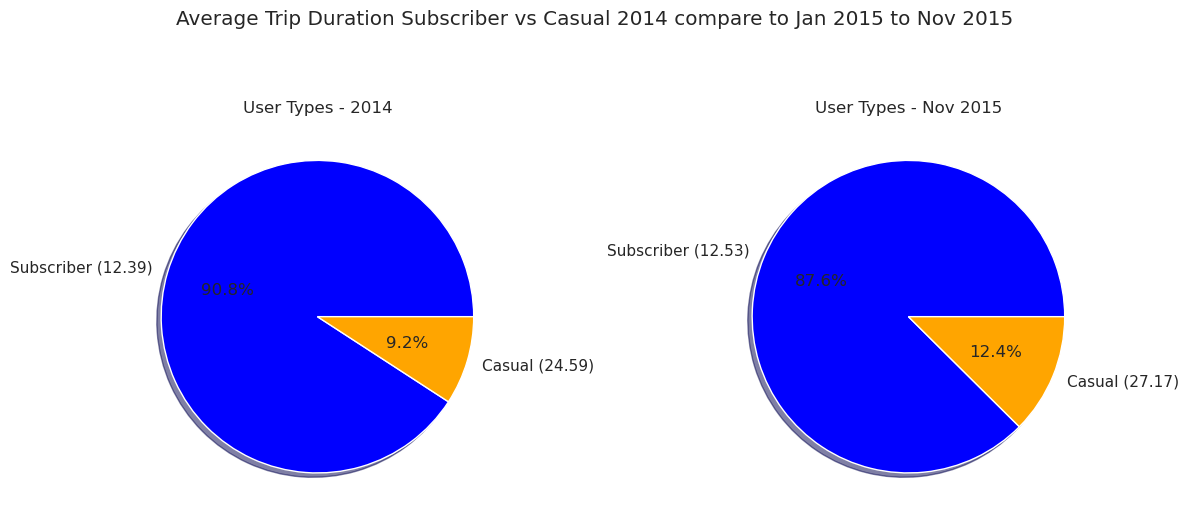

In [116]:
# Calculate the average trip duration for each user type
av_trip_dur_by_user_type_2014 = df_2014.groupby('user_type')['trip_duration'].mean()
av_trip_dur_by_user_type_2015 = df_2015.groupby('user_type')['trip_duration'].mean()

# Create two separate pie charts for each year
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart for 2014
ax_2014 = axes[0]
ax_2014.pie(df_2014['user_type'].value_counts(),
            labels=[f'{user_type} ({av_trip_dur_by_user_type_2014[user_type]:.2f})' for user_type in df_2014['user_type'].value_counts().index],
            autopct='%1.1f%%',colors=['blue', 'orange'],
            shadow=True)
ax_2014.set_title('User Types - 2014')

# Plot pie chart for 2015
ax_2015 = axes[1]
ax_2015.pie(df_2015['user_type'].value_counts(),
            labels=[f'{user_type} ({av_trip_dur_by_user_type_2015[user_type]:.2f})' for user_type in df_2015['user_type'].value_counts().index],
            autopct='%1.1f%%',colors=['blue', 'orange'],
            shadow=True)
ax_2015.set_title('User Types - Nov 2015')

#Title
plt.suptitle('Average Trip Duration Subscriber vs Casual 2014 compare to Jan 2015 to Nov 2015')
# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as '01_subs_vs_cas_2014_Nov_2015_200230731.png'
#plt.savefig('09_subs_vs_cas_2014_Nov_2015_pie_200230731_time.png', dpi=100, bbox_inches="tight")

Text(91.25, 0.5, 'Start Time (Hour)')

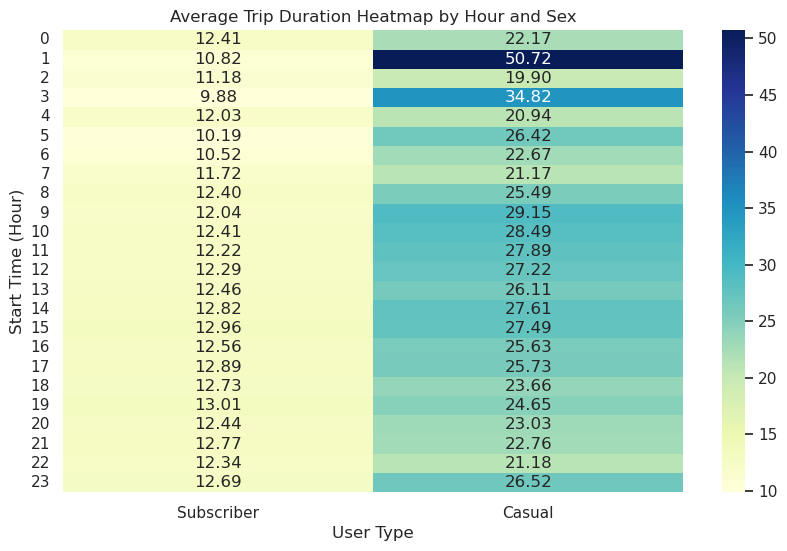

In [117]:
# Convert non-finite values to zeros and then to integers
pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='user_type', values='trip_duration', aggfunc='mean')
pivot_df = pivot_df[['Subscriber', 'Casual']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Trip Duration Heatmap by Hour and Sex')
plt.xlabel('User Type')
plt.ylabel('Start Time (Hour)')

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">The overview of our customers</p>
    <ol>
        <li> The average trip duration for subscribers during different times of the day is approximately around 12 minutes, which is roughly half the average trip duration for casual users.
        <li> For casual users, the average trip duration mostly falls between 20 and 30 minutes, which is below the 30-minute limit typically associated with casual trips per day.</ol>      
</div>

In [118]:
# Using loc method
user_type_trip_duration = df_1.loc[df_1['user_type'] == 'Subscriber', 'trip_duration'].value_counts()
# Or using Boolean indexing
user_type_trip_duration = df_1[df_1['user_type'] == 'Subscriber']['trip_duration'].value_counts()

print(user_type_trip_duration)

5.683333      214
5.433333      213
7.000000      212
8.450000      210
6.116667      209
             ... 
53.533333       1
57.200000       1
65.266667       1
76.033333       1
186.700000      1
Name: trip_duration, Length: 3540, dtype: int64


In [119]:
# Using loc method
user_type_trip_duration = df_1.loc[df_1['user_type'] == 'Subscriber', 'trip_duration'].mean()
# Or using Boolean indexing
user_type_trip_duration = df_1[df_1['user_type'] == 'Subscriber']['trip_duration'].mean()

print(user_type_trip_duration)

12.464489755040537


<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Please note:</b><p style = "font-family:Verdana; font-size:14px">Ensure the data is correct, not switched around.<p>
</div>

In [120]:
# Using loc method
user_type_cas_trip_dur = df_1.loc[df_1['user_type'] == 'Casual', 'trip_duration'].value_counts()
# Or using Boolean indexing
user_type_cas_trip_dur = df_1[df_1['user_type'] == 'Casual']['trip_duration'].value_counts()

print(user_type_cas_trip_dur)

9.516667      22
24.116667     21
15.500000     20
20.800000     20
22.233333     20
              ..
60.400000      1
34.466667      1
1.600000       1
260.250000     1
64.233333      1
Name: trip_duration, Length: 3652, dtype: int64


In [121]:
# Using loc method
user_type_cas_trip_dur = df_1.loc[df_1['user_type'] == 'Casual', 'trip_duration'].mean()
# Or using Boolean indexing
user_type_cas_trip_dur = df_1[df_1['user_type'] == 'Casual']['trip_duration'].mean()

print(user_type_cas_trip_dur)

26.15504723647995


/tmp/ipykernel_32/4057162778.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2014 = sns.barplot(x='month', y='trip_duration', hue='user_type', data=average_duration_2014,
/tmp/ipykernel_32/4057162778.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2015 = sns.barplot(x='month', y='trip_duration', hue='user_type', data=average_duration_2015,


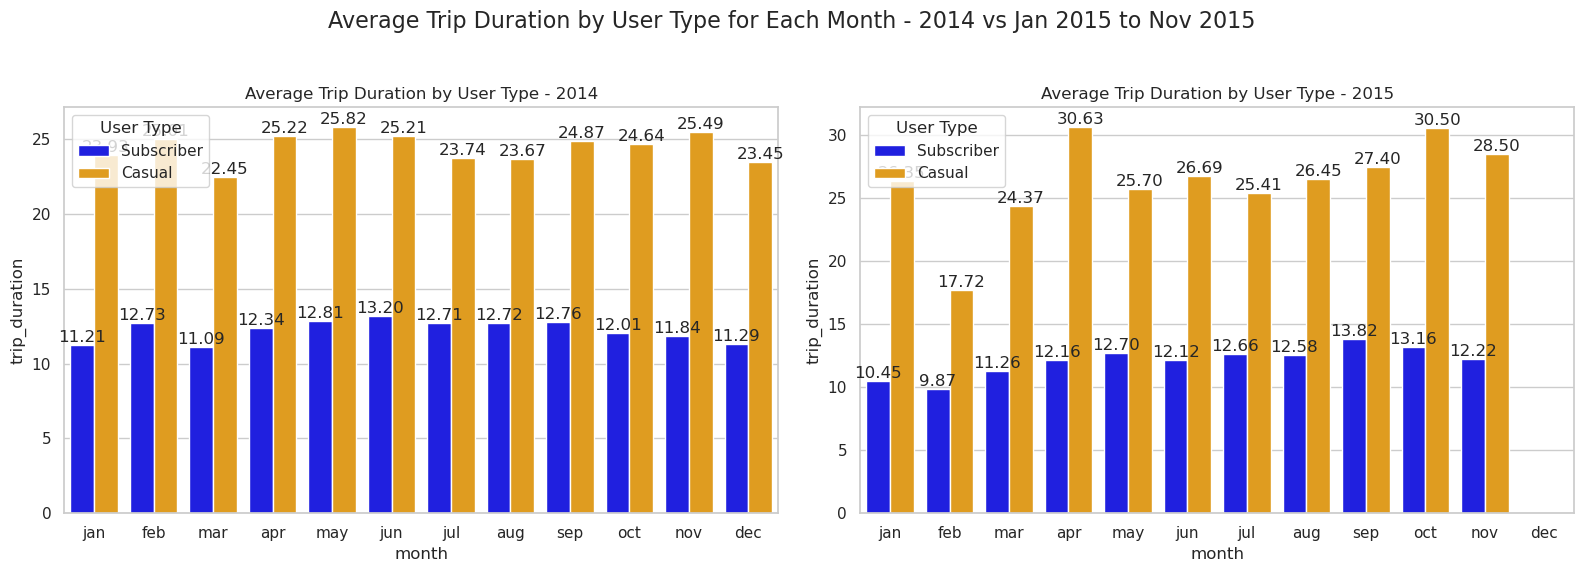

In [122]:
# Create 'month' col
#df_1['month'] = df_1['date'].dt.strftime('%b').str.lower()

# Create 'month' col
#df_1['year'] = df_1['date'].dt.strftime('%Y').str.lower()


# Convert 'year' column to datetime format
#df_1['year'] = pd.to_datetime(df_1['year'], format='%Y')

# Calculate the average trip duration for each 'user_type' and 'month' in 2014
average_duration_2014 = df_1[df_1['year'] == '2014'].groupby(['month', 'user_type'])['trip_duration'].mean().reset_index()

# Calculate the average trip duration for each 'user_type' and 'month' in 2015
average_duration_2015 = df_1[df_1['year'] == '2015'].groupby(['month', 'user_type'])['trip_duration'].mean().reset_index()

# Create two separate barplots for each year
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define the order of hue (user_type) for correct colors
hue_order = ['Subscriber', 'Casual']

# Plot barplot for 2014
ax_2014 = sns.barplot(x='month', y='trip_duration', hue='user_type', data=average_duration_2014,
                      order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                      palette={'Subscriber': 'blue', 'Casual': 'orange'},
                      hue_order=hue_order,  # Set the hue order here
                      ci=None, ax=axes[0])
ax_2014.set_title('Average Trip Duration by User Type - 2014')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2014
ax_2014.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Plot barplot for 2015
ax_2015 = sns.barplot(x='month', y='trip_duration', hue='user_type', data=average_duration_2015,
                      order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                      palette={'Subscriber': 'blue', 'Casual': 'orange'},
                      hue_order=hue_order,  # Set the hue order here
                      ci=None, ax=axes[1])
ax_2015.set_title('Average Trip Duration by User Type - 2015')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2015
ax_2015.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Add title and adjust spacing between subplots
plt.suptitle('Average Trip Duration by User Type for Each Month - 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as '03_subs_vs_cas_2014_2015_200230731_bar_monthly.png'
#plt.savefig('10_subs_vs_cas_2014_2015_200230731_bar_monthly_time.png', dpi=100, bbox_inches="tight")


Text(91.25, 0.5, 'Start Time (Hour)')

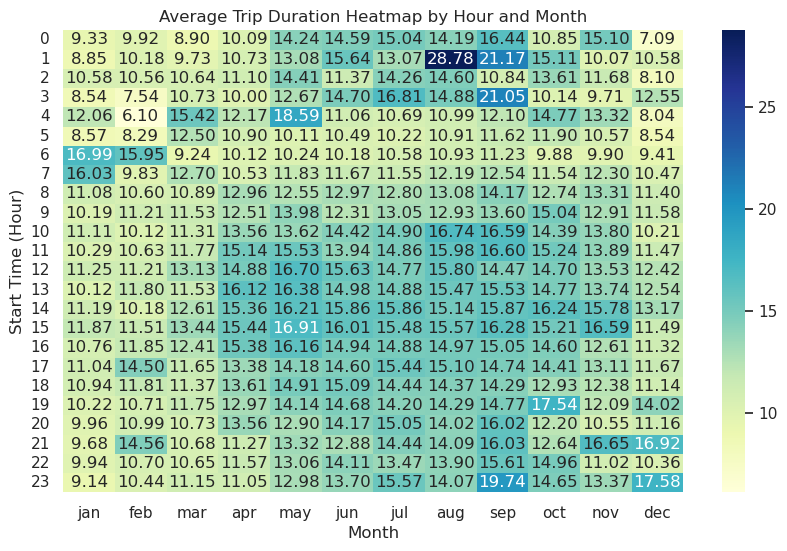

In [123]:
# Group the data by both hour of start_time and user_type
pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='month', values='trip_duration', aggfunc='mean')
#pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day_groups', values='user_type', aggfunc='count')

# Reorder the columns
pivot_df = pivot_df[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Trip Duration Heatmap by Hour and Month')
plt.xlabel('Month')
plt.ylabel('Start Time (Hour)')

/tmp/ipykernel_32/1882061873.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2014 = sns.barplot(x='month_season', y='trip_duration', hue='user_type', data=average_duration_2014,
/tmp/ipykernel_32/1882061873.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2015 = sns.barplot(x='month_season', y='trip_duration', hue='user_type', data=average_duration_2015,


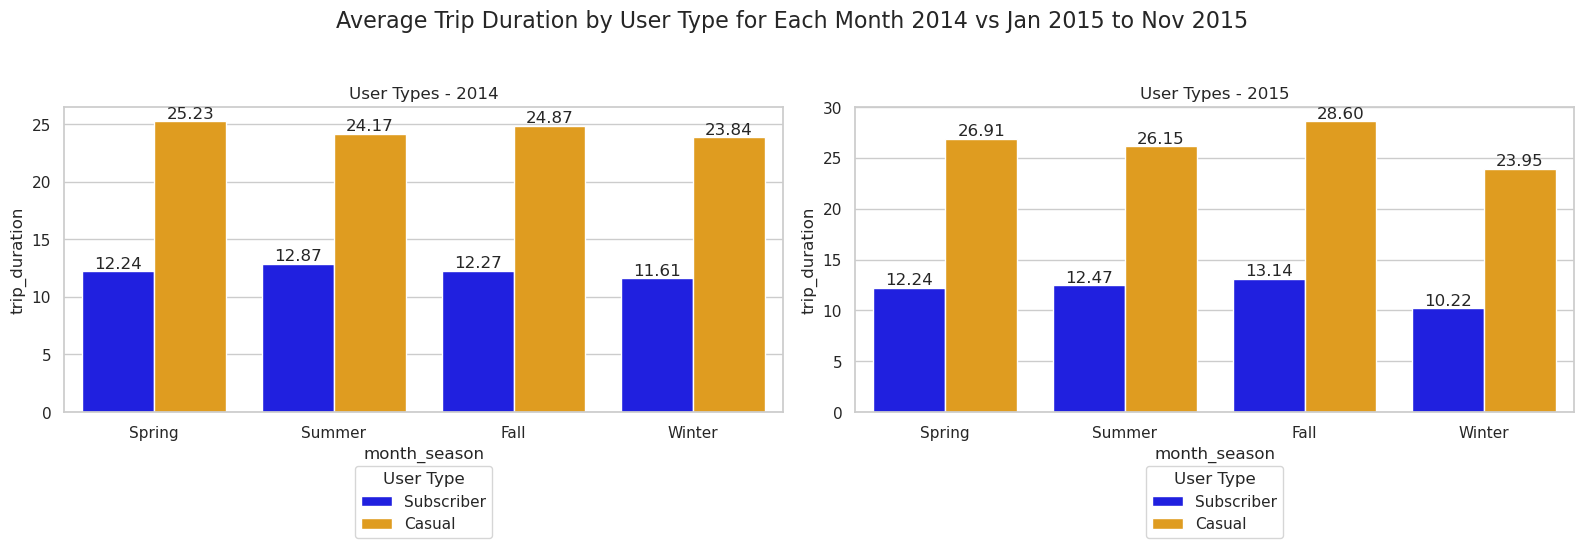

In [124]:

# Order of the month_season categories
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Calculate the average trip duration for each 'user_type' and 'month_season' in 2014
average_duration_2014 = df_1[df_1['year'] == "2014"].groupby(['month_season', 'user_type'])['trip_duration'].mean().reset_index()

# Calculate the average trip duration for each 'user_type' and 'month_season' in 2015
average_duration_2015 = df_1[df_1['year'] == "2015"].groupby(['month_season', 'user_type'])['trip_duration'].mean().reset_index()

# Create two separate countplots for each year
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define hue order to ensure correct color mapping
hue_order = ['Subscriber', 'Casual']

# Plot countplot for 2014
ax_2014 = sns.barplot(x='month_season', y='trip_duration', hue='user_type', data=average_duration_2014,
                      order=season_order,
                      palette={'Subscriber': 'blue', 'Casual': 'orange'},
                      hue_order=hue_order,  # Set hue_order to fix color mapping
                      ci=None, ax=axes[0])
ax_2014.set_title('User Types - 2014')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2014
ax_2014.legend(title='User Type', labels=['Subscriber', 'Casual'], loc='upper center', bbox_to_anchor=(0.5, -0.15))

# Plot countplot for 2015
ax_2015 = sns.barplot(x='month_season', y='trip_duration', hue='user_type', data=average_duration_2015,
                      order=season_order,
                      palette={'Subscriber': 'blue', 'Casual': 'orange'},
                      hue_order=hue_order,  # Set hue_order to fix color mapping
                      ci=None, ax=axes[1])
ax_2015.set_title('User Types - 2015')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2015
ax_2015.legend(title='User Type', labels=['Subscriber', 'Casual'], loc='upper center', bbox_to_anchor=(0.5, -0.15))

# Add title and adjust spacing between subplots
plt.suptitle('Average Trip Duration by User Type for Each Month 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as '03_subs_vs_cas_2014_2015_200230731_bar_monthly.png'
#plt.savefig('11_subs_vs_cas_2014_2015_200230731_bar_seasonal_time.png', dpi=100, bbox_inches="tight")

Text(91.25, 0.5, 'Start Time (Hour)')

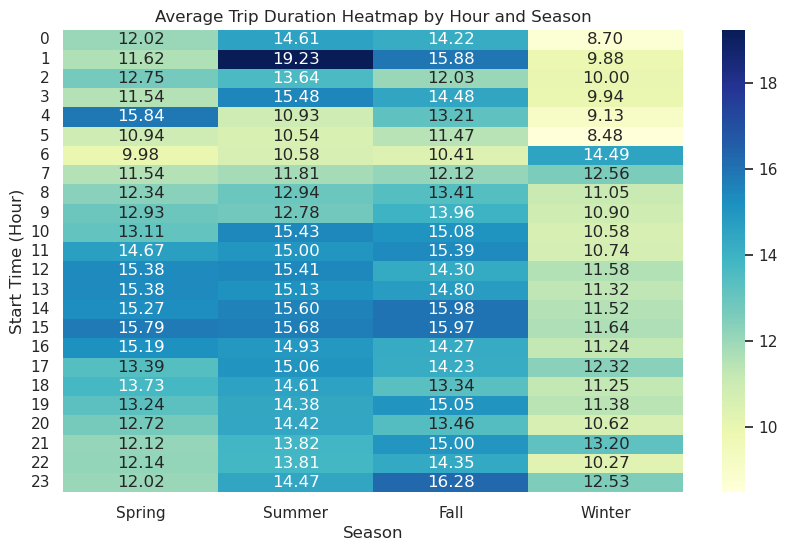

In [125]:
# Group the data by both hour of start_time and user_type
pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='month_season', values='trip_duration', aggfunc='mean')
#pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day_groups', values='user_type', aggfunc='count')

# Reorder the columns
pivot_df = pivot_df[['Spring', 'Summer', 'Fall', 'Winter']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Trip Duration Heatmap by Hour and Season')
plt.xlabel('Season')
plt.ylabel('Start Time (Hour)')

Text(91.25, 0.5, 'Start Time (Hour)')

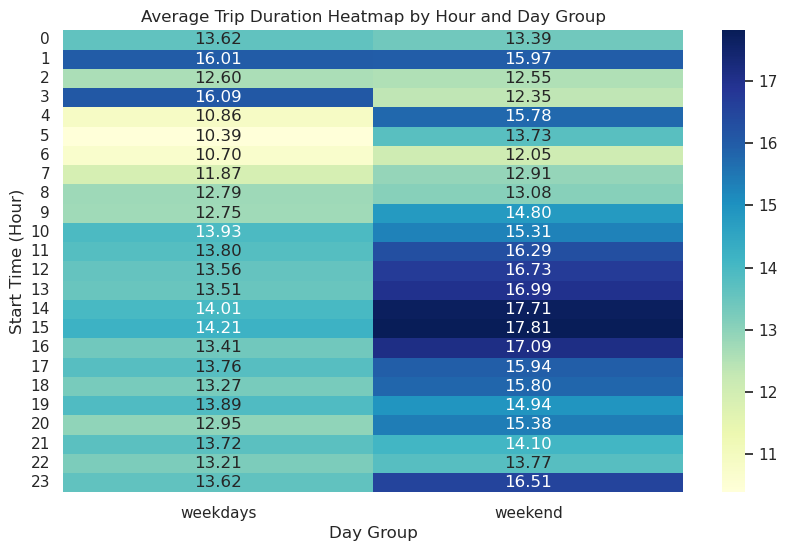

In [126]:
# Group the data by both hour of start_time and user_type
pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day_groups', values='trip_duration', aggfunc='mean')
#pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day_groups', values='user_type', aggfunc='count')

# Reorder the columns
pivot_df = pivot_df[['weekdays', 'weekend']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Trip Duration Heatmap by Hour and Day Group')
plt.xlabel('Day Group')
plt.ylabel('Start Time (Hour)')

Text(91.25, 0.5, 'Start Time (Hour)')

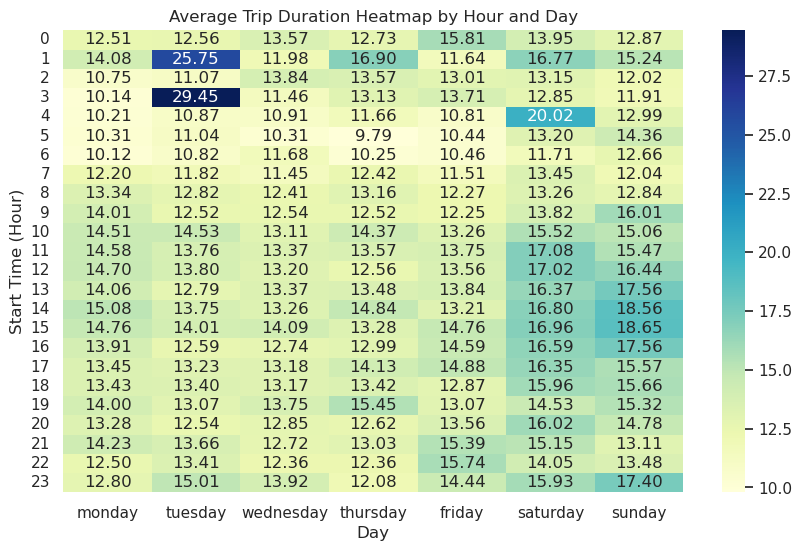

In [127]:
# Group the data by both hour of start_time and user_type
pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day', values='trip_duration', aggfunc='mean')
#pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day_groups', values='user_type', aggfunc='count')

# Reorder the columns
pivot_df = pivot_df[['monday', 'tuesday','wednesday', 'thursday', 'friday', 'saturday', 'sunday']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Trip Duration Heatmap by Hour and Day')
plt.xlabel('Day')
plt.ylabel('Start Time (Hour)')

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">The overview of our customers</p>
    <ol>
        <li> The average trip duration for weekdays during different times of the day is slightly below the average trip duration in the weekend.</ol>
</div>

#### Pareto neighborhood start average time
#### Subscriber's distance by trip duration

In [128]:
df[df['user_type'] == 'Subscriber'].groupby(['neighborhood_start', 'borough_start', 'neighborhood_end', 'borough_end'])[['trip_duration', 'distance_km']].mean().sort_values(by=['trip_duration', 'distance_km'], ascending=False)

trip_duration  \
neighborhood_start        borough_start neighborhood_end          borough_end                  
Financial District South  Manhattan     Times Sq/Theatre District Manhattan       709.683333   
Greenwich Village South   Manhattan     Crown Heights North       Brooklyn        697.750000   
Lenox Hill West           Manhattan     West Chelsea/Hudson Yards Manhattan       424.366667   
Crown Heights North       Brooklyn      Clinton Hill              Brooklyn        209.083333   
TriBeCa/Civic Center      Manhattan     Brooklyn Navy Yard        Brooklyn        178.162500   
...                                                                                      ...   
Bushwick South            Brooklyn      Bushwick South            Brooklyn          3.129167   
Yorkville West            Manhattan     Yorkville West            Manhattan         3.111111   
Battery Park              Manhattan     World Trade Center        Manhattan         3.000000   
Williamsburg (South Side) Brooklyn      South Williamsburg        Brooklyn          2.983333   
South Williamsburg        Brooklyn      Williamsburg (South Side) Brooklyn          2.866667   

                                                                               distance_km  
neighborhood_start        borough_start neighborhood_end          borough_end               
Financial District South  Manhattan     Times Sq/Theatre District Manhattan       6.885962  
Greenwich Village South   Manhattan     Crown Heights North       Brooklyn        7.730966  
Lenox Hill West           Manhattan     West Chelsea/Hudson Yards Manhattan       3.783540  
Crown Heights North       Brooklyn      Clinton Hill              Brooklyn        2.033387  
TriBeCa/Civic Center      Manhattan     Brooklyn Navy Yard        Brooklyn        3.755308  
...                                                                                    ...  
Bushwick South            Brooklyn      Bushwick South            Brooklyn        0.502579  
Yorkville West            Manhattan     Yorkville West            Manhattan       0.354928  
Battery Park              Manhattan     World Trade Center        Manhattan       0.304390  
Williamsburg (South Side) Brooklyn      South Williamsburg        Brooklyn        0.477985  
South Williamsburg        Brooklyn      Williamsburg (South Side) Brooklyn        0.586816  

[3096 rows x 2 columns]

#### Subscriber's trip duration by distance

In [129]:
df[df['user_type'] == 'Subscriber'].groupby(['neighborhood_start', 'borough_start', 'neighborhood_end', 'borough_end'])[['distance_km','trip_duration']].mean().sort_values(by=['distance_km','trip_duration'], ascending=False)

distance_km  \
neighborhood_start       borough_start neighborhood_end         borough_end                
Clinton Hill             Brooklyn      Lincoln Square West      Manhattan      10.132970   
Lincoln Square West      Manhattan     Park Slope               Brooklyn        9.877708   
Park Slope               Brooklyn      Lincoln Square West      Manhattan       9.877708   
Fort Greene              Brooklyn      Lincoln Square West      Manhattan       9.459904   
Upper West Side South    Manhattan     Financial District South Manhattan       9.380513   
...                                                                                  ...   
Financial District South Manhattan     World Trade Center       Manhattan       0.283355   
Upper East Side North    Manhattan     Upper East Side North    Manhattan       0.274231   
Battery Park             Manhattan     Financial District South Manhattan       0.185997   
Financial District South Manhattan     Battery Park             Manhattan       0.154925   
                                       Financial District South Manhattan       0.150998   

                                                                             trip_duration  
neighborhood_start       borough_start neighborhood_end         borough_end                 
Clinton Hill             Brooklyn      Lincoln Square West      Manhattan         6.466667  
Lincoln Square West      Manhattan     Park Slope               Brooklyn        171.133333  
Park Slope               Brooklyn      Lincoln Square West      Manhattan        16.833333  
Fort Greene              Brooklyn      Lincoln Square West      Manhattan        10.066667  
Upper West Side South    Manhattan     Financial District South Manhattan        61.933333  
...                                                                                    ...  
Financial District South Manhattan     World Trade Center       Manhattan         3.790741  
Upper East Side North    Manhattan     Upper East Side North    Manhattan         4.658333  
Battery Park             Manhattan     Financial District South Manhattan         6.116667  
Financial District South Manhattan     Battery Park             Manhattan         5.983333  
                                       Financial District South Manhattan         9.450000  

[3096 rows x 2 columns]

In [130]:
# Calculate the mean trip duration for each neighborhood and borough for 'Subscriber' user type
df_pareto_sub_start_trip_dur = df[df['user_type'] == 'Subscriber'].groupby(['neighborhood_start', 'borough_start', 'neighborhood_end', 'borough_end'])['trip_duration'].mean().sort_values(ascending=False)

# Convert the result into a DataFrame
df_pareto_sub_start_trip_dur = pd.DataFrame(df_pareto_sub_start_trip_dur)

# Calculate Pareto percentages
pareto = 100 * df_pareto_sub_start_trip_dur['trip_duration'].cumsum() / df_pareto_sub_start_trip_dur['trip_duration'].sum()

# Add the Pareto percentages to the DataFrame
df_pareto_sub_start_trip_dur['Percentage'] = pareto
# Filter rows where Percentage is <= 82%
filtered_df = df_pareto_sub_start_trip_dur[df_pareto_sub_start_trip_dur['Percentage'] <= 80.1]

filtered_df

trip_duration  \
neighborhood_start        borough_start neighborhood_end          borough_end                  
Financial District South  Manhattan     Times Sq/Theatre District Manhattan       709.683333   
Greenwich Village South   Manhattan     Crown Heights North       Brooklyn        697.750000   
Lenox Hill West           Manhattan     West Chelsea/Hudson Yards Manhattan       424.366667   
Crown Heights North       Brooklyn      Clinton Hill              Brooklyn        209.083333   
TriBeCa/Civic Center      Manhattan     Brooklyn Navy Yard        Brooklyn        178.162500   
...                                                                                      ...   
Yorkville West            Manhattan     Midtown Center            Manhattan        18.513889   
East Village              Manhattan     Lenox Hill East           Manhattan        18.504167   
Flatiron                  Manhattan     Midtown East              Manhattan        18.496377   
West Chelsea/Hudson Yards Manhattan     Greenwich Village South   Manhattan        18.494355   
Gramercy                  Manhattan     Chinatown                 Manhattan        18.485185   

                                                                               Percentage  
neighborhood_start        borough_start neighborhood_end          borough_end              
Financial District South  Manhattan     Times Sq/Theatre District Manhattan      0.970578  
Greenwich Village South   Manhattan     Crown Heights North       Brooklyn       1.924836  
Lenox Hill West           Manhattan     West Chelsea/Hudson Yards Manhattan      2.505209  
Crown Heights North       Brooklyn      Clinton Hill              Brooklyn       2.791155  
TriBeCa/Civic Center      Manhattan     Brooklyn Navy Yard        Brooklyn       3.034814  
...                                                                                   ...  
Yorkville West            Manhattan     Midtown Center            Manhattan     79.982252  
East Village              Manhattan     Lenox Hill East           Manhattan     80.007559  
Flatiron                  Manhattan     Midtown East              Manhattan     80.032855  
West Chelsea/Hudson Yards Manhattan     Greenwich Village South   Manhattan     80.058148  
Gramercy                  Manhattan     Chinatown                 Manhattan     80.083429  

[1898 rows x 2 columns]

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">We have chosen to categorize trips based on their duration rather than distance in kilometers. Furthermore, building upon our previous analysis, we will primarily filter the data for subscribers. It's important to note that due to the extensive volume of data, displaying a map is not feasible.<p>
</div>

In [131]:
# Calculate the mean trip duration for each neighborhood and borough for 'Subscriber' user type
df_pareto_sub_start_trip_dur = df_1[df_1['user_type'] == 'Subscriber'].groupby(['neighborhood_start', 'borough_start'])['trip_duration'].mean().sort_values(ascending=False)

# Convert the result into a DataFrame
df_pareto_sub_start_trip_dur = pd.DataFrame(df_pareto_sub_start_trip_dur)

# Calculate Pareto percentages
pareto = 100 * df_pareto_sub_start_trip_dur['trip_duration'].cumsum() / df_pareto_sub_start_trip_dur['trip_duration'].sum()

# Add the Pareto percentages to the DataFrame
df_pareto_sub_start_trip_dur['Percentage'] = pareto
# Filter rows where Percentage is >= 81%
filtered_df = df_pareto_sub_start_trip_dur[df_pareto_sub_start_trip_dur['Percentage'] <= 82]

filtered_df

trip_duration  \
neighborhood_start                            borough_start                  
Governor's Island/Ellis Island/Liberty Island Manhattan          31.469444   
Sunnyside                                     Queens             24.621667   
Crown Heights North                           Brooklyn           24.564167   
Battery Park                                  Manhattan          24.402789   
Lenox Hill West                               Manhattan          21.200897   
Upper West Side South                         Manhattan          19.818569   
Columbia Street                               Brooklyn           19.532381   
Financial District South                      Manhattan          18.894469   
Yorkville West                                Manhattan          17.958120   
Park Slope                                    Brooklyn           17.867225   
Lenox Hill East                               Manhattan          17.759427   
Long Island City/Queens Plaza                 Queens             17.458772   
Lincoln Square West                           Manhattan          17.227843   
Lincoln Square East                           Manhattan          16.867925   
Upper East Side South                         Manhattan          16.773476   
World Trade Center                            Manhattan          16.197287   
Williamsburg (South Side)                     Brooklyn           16.028305   
Clinton West                                  Manhattan          15.781040   
Williamsburg (North Side)                     Brooklyn           15.770991   
Upper East Side North                         Manhattan          15.683495   
Bushwick South                                Brooklyn           15.642949   
Boerum Hill                                   Brooklyn           15.584072   
Battery Park City                             Manhattan          15.289284   
Midtown North                                 Manhattan          15.267848   
Bedford                                       Brooklyn           15.010737   
Financial District North                      Manhattan          14.932876   
Sutton Place/Turtle Bay North                 Manhattan          14.785856   
Seaport                                       Manhattan          14.725835   
Yorkville East                                Manhattan          14.312573   
Greenpoint                                    Brooklyn           14.231319   
DUMBO/Vinegar Hill                            Brooklyn           14.053970   
Hudson Sq                                     Manhattan          13.942245   
Brooklyn Navy Yard                            Brooklyn           13.873635   
UN/Turtle Bay South                           Manhattan          13.727265   
South Williamsburg                            Brooklyn           13.684091   
Downtown Brooklyn/MetroTech                   Brooklyn           13.532817   
Midtown East                                  Manhattan          13.465917   
West Chelsea/Hudson Yards                     Manhattan          13.447797   
Meatpacking/West Village West                 Manhattan          13.267999   
Two Bridges/Seward Park                       Manhattan          13.028656   
Alphabet City                                 Manhattan          12.918545   
TriBeCa/Civic Center                          Manhattan          12.690414   
SoHo                                          Manhattan          12.648253   
Stuy Town/Peter Cooper Village                Manhattan          12.226005   
Midtown Center                                Manhattan          12.219564   
Clinton Hill                                  Brooklyn           12.155419   
Lower East Side                               Manhattan          12.134792   
Little Italy/NoLiTa                           Manhattan          12.060706   
Clinton East                                  Manhattan          12.057380   
Kips Bay                                      Manhattan          11.922706   
Murra

#### Neighborhood start, user type and average time 

In [132]:
# Calculate the mean trip duration for each neighborhood and borough for 'Subscriber' user type
df_pareto_sub_start_trip_dur = df_1[df_1['user_type'] == 'Subscriber'].groupby(['neighborhood_start', 'borough_start'])['trip_duration'].mean().sort_values(ascending=False)

# Convert the result into a DataFrame
df_pareto_sub_start_trip_dur = pd.DataFrame(df_pareto_sub_start_trip_dur)

# Calculate Pareto percentages
pareto = 100 * df_pareto_sub_start_trip_dur['trip_duration'].cumsum() / df_pareto_sub_start_trip_dur['trip_duration'].sum()

# Add the Pareto percentages to the DataFrame
df_pareto_sub_start_trip_dur['Percentage'] = pareto

# Filter rows where Percentage is <= 25%, <= 50%, and <= 81%
filtered_df = df_pareto_sub_start_trip_dur[(df_pareto_sub_start_trip_dur['Percentage'] <= 25) |
                                           (df_pareto_sub_start_trip_dur['Percentage'] <= 50) |
                                           (df_pareto_sub_start_trip_dur['Percentage'] <= 81)]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['start_station_longitude'], df_1['start_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['start_station_latitude'].mean(), gdf['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    
    trip_duration = row['trip_duration']  # Get the mean trip duration
    
    if row['Percentage'] <= 25:
        color = 'blue'
    elif row['Percentage'] <= 50:
        color = 'green'
    elif row['Percentage'] <= 81:
        color = 'orange'
    else:
        color = 'red'
    
    folium.CircleMarker(
        location=[gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_latitude'].iloc[0], 
                  gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_longitude'].iloc[0]],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"Mean Trip Duration: {trip_duration:.2f}\nNeighborhood Start: {neighborhood}\nBorough Start: {borough}"
    ).add_to(m)

# Display the Folium map in the notebook
#HTML(m._repr_html_())

# Save the map as an HTML file
output_file = "05_1.map_neigh_start_subscriber_trip_dur.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

In [133]:
# Calculate the mean trip duration for each neighborhood and borough for 'Subscriber' user type
df_start_trip_dur = df_1.groupby(['neighborhood_start', 'borough_start', 'user_type'])['trip_duration'].mean().unstack()

# Sort neighborhoods based on descending mean trip duration for subscribers
df_start_trip_dur = df_start_trip_dur.sort_values(by='Subscriber', ascending=False)

# Convert the result into a DataFrame
df_pareto_start_trip_dur = pd.DataFrame(df_start_trip_dur)

# Calculate Pareto percentages for both user types
pareto = 100 * df_pareto_start_trip_dur['Subscriber'].cumsum() / df_pareto_start_trip_dur['Subscriber'].sum()

# Add the Pareto percentages to the DataFrame
df_pareto_start_trip_dur['Percentage'] = pareto
# Filter rows where Percentage is >= 81%
filtered_df = df_pareto_start_trip_dur[df_pareto_start_trip_dur['Percentage'] <= 82].fillna(0).astype(float)

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)
filtered_df

user_type                                                    Casual  \
neighborhood_start                            borough_start           
Governor's Island/Ellis Island/Liberty Island Manhattan       22.59   
Sunnyside                                     Queens           0.00   
Crown Heights North                           Brooklyn        24.71   
Battery Park                                  Manhattan       29.46   
Lenox Hill West                               Manhattan       22.44   
Upper West Side South                         Manhattan       39.02   
Columbia Street                               Brooklyn        25.91   
Financial District South                      Manhattan       29.89   
Yorkville West                                Manhattan       23.01   
Park Slope                                    Brooklyn        30.36   
Lenox Hill East                               Manhattan       22.51   
Long Island City/Queens Plaza                 Queens          51.15   
Lincoln Square West                           Manhattan       31.62   
Lincoln Square East                           Manhattan       32.80   
Upper East Side South                         Manhattan       21.86   
World Trade Center                            Manhattan       32.67   
Williamsburg (South Side)                     Brooklyn        28.40   
Clinton West                                  Manhattan       24.63   
Williamsburg (North Side)                     Brooklyn        28.20   
Upper East Side North                         Manhattan       29.07   
Bushwick South                                Brooklyn        38.25   
Boerum Hill                                   Brooklyn        33.17   
Battery Park City                             Manhattan       28.02   
Midtown North                                 Manhattan       33.01   
Bedford                                       Brooklyn        22.74   
Financial District North                      Manhattan       27.04   
Sutton Place/Turtle Bay North                 Manhattan       30.47   
Seaport                                       Manhattan       29.21   
Yorkville East                                Manhattan       24.56   
Greenpoint                                    Brooklyn        18.56   
DUMBO/Vinegar Hill                            Brooklyn        32.90   
Hudson Sq                                     Manhattan       25.26   
Brooklyn Navy Yard                            Brooklyn        22.69   
UN/Turtle Bay South                           Manhattan       25.18   
South Williamsburg                            Brooklyn        17.90   
Downtown Brooklyn/MetroTech                   Brooklyn        31.50   
Midtown East                                  Manhattan       29.78   
West Chelsea/Hudson Yards                     Manhattan       26.66   
Meatpacking/West Village West                 Manhattan       25.74   
Two Bridges/Seward Park                       Manhattan       21.30   
Alphabet City                                 Manhattan       21.58   
TriBeCa/Civic Center                          Manhattan       29.58   
SoHo                                          Manhattan       25.99   
Stuy Town/Peter Cooper Village                Manhattan       21.56   
Midtown Center                                Manhattan       25.59   
Clinton Hill                                  Brooklyn        24.24   
Lower East Side                               Manhattan       22.82   
Little Italy/NoLiTa                           Manhattan       26.86   
Clinton East                                  Manhattan       25.71   
Kips Bay                                      Manhattan       26.23   
Murray Hill                                   Manhattan       25.53   
Brooklyn Heights                              Brooklyn        27.72   

user_type                                                    Subscriber  \
neighborhood_start                            borough_start               
Governor's Isla

In [134]:
# Calculate the mean trip duration for each neighborhood and borough for 'Subscriber' user type
df_start_trip_dur = df_1.groupby(['neighborhood_start', 'borough_start', 'user_type'])['trip_duration'].mean().unstack()

# Sort neighborhoods based on descending mean trip duration for subscribers
df_start_trip_dur = df_start_trip_dur.sort_values(by='Subscriber', ascending=False)

# Convert the result into a DataFrame
df_pareto_start_trip_dur = pd.DataFrame(df_start_trip_dur)

# Calculate Pareto percentages for both user types
pareto_subscriber = 100 * df_pareto_start_trip_dur['Subscriber'].cumsum() / df_pareto_start_trip_dur['Subscriber'].sum()
pareto_casual = 100 * df_pareto_start_trip_dur['Casual'].cumsum() / df_pareto_start_trip_dur['Casual'].sum()

# Add the Pareto percentages to the DataFrame
df_pareto_start_trip_dur['Percentage_Subscriber'] = pareto_subscriber
df_pareto_start_trip_dur['Percentage_Casual'] = pareto_casual

# Filter the data based on Pareto percentage
filtered_df_subscriber = df_pareto_start_trip_dur[df_pareto_start_trip_dur['Percentage_Subscriber'] <= 81].fillna(0).astype(int)
filtered_df_casual = df_pareto_start_trip_dur[df_pareto_start_trip_dur['Percentage_Casual'] <= 81].fillna(0).astype(int)

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['start_station_longitude'], df_1['start_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['start_station_latitude'].mean(), gdf['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Create markers for the filtered Subscriber data
for idx, row in filtered_df_subscriber.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    
    percentage = row['Percentage_Subscriber']
    if percentage <= 25:
        color = 'blue'
    elif percentage <= 50:
        color = 'green'
    elif percentage <= 81:
        color = 'orange'
    mean_duration = row['Subscriber']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_start'].values:
        latitude = gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_latitude'].iloc[0]
        longitude = gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Neighborhood Start: {neighborhood}\nBorough Start: {borough}\nUser Type: Subscriber\nMean Trip Duration: {mean_duration:.2f} seconds\nPercentage: {percentage:.2f}%"
        ).add_to(m)

# Create markers for the filtered Casual data
for idx, row in filtered_df_casual.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    
    percentage = row['Percentage_Casual']
    if percentage <= 25:
        color = 'blue'
    elif percentage <= 50:
        color = 'green'
    elif percentage <= 81:
        color = 'orange'
    mean_duration = row['Casual']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_start'].values:
        latitude = gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_latitude'].iloc[0]
        longitude = gdf.loc[gdf['neighborhood_start'] == neighborhood, 'start_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Neighborhood Start: {neighborhood}\nBorough Start: {borough}\nUser Type: Casual\nMean Trip Duration: {mean_duration:.2f} seconds\nPercentage: {percentage:.2f}%"
        ).add_to(m)

# Display the Folium map in the notebook
#HTML(m._repr_html_())

# Save the map as an HTML file
output_file = "05_2.map_neigh_start_user_type_trip_dur.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">We have chosen to categorize trips based on their duration rather than distance in kilometers. Furthermore, building upon our previous analysis, we will<b>primarily filter the data for subscribers, as indicated in  "05_1.map_neigh_start_subscriber_trip_dur.html".</b>.<p>
</div>

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">The overview of our customers using Pareto is divided into segments representing the top 80% of the highest average trip duration:
<ol>
    <li>The first segment represents the top 25% of trips, encompassing 7 locations in Manhattan, 3 in Brooklyn, and 1 in Queens. These locations are highlighted in blue on the map and are relatively farther from the central area.
    <li>The second segment, highlighted in green on the map, spans the range between more than 25% and 50% of the highest average trip durations. It covers 10 locations in Manhattan, 5 in Brooklyn, and 1 in Queens, mostly situated in proximity to the blue-marked locations.
    <li>The third segment includes the remaining trips, accounting for up to 80% of the highest average trip durations. This segment comprises 18 locations in Manhattan and 6 locations in Brooklyn, positioned closer to the central area.</ol>        
</div>

#### Pareto neighborhood end average time

In [135]:
# Calculate the mean trip duration for each neighborhood and borough for 'Subscriber' user type
df_sub_end_trip_dur = df_1[df_1['user_type'] == 'Subscriber'].groupby(['neighborhood_end', 'borough_end'])['trip_duration'].mean().sort_values(ascending=False)

# Convert the result into a DataFrame
df_pareto_sub_end_trip_dur = pd.DataFrame(df_sub_end_trip_dur)

# Calculate Pareto percentages
pareto = 100 * df_pareto_sub_end_trip_dur['trip_duration'].cumsum() / df_pareto_sub_end_trip_dur['trip_duration'].sum()

# Add the Pareto percentages to the DataFrame
df_pareto_sub_end_trip_dur['Percentage'] = pareto

# Filter rows where Percentage is <= 82%
filtered_df = df_pareto_sub_end_trip_dur[df_pareto_sub_end_trip_dur['Percentage'] <= 82]

# Display the filtered DataFrame
filtered_df

trip_duration  \
neighborhood_end                              borough_end                  
Crown Heights North                           Brooklyn         65.188889   
Upper East Side North                         Manhattan        41.853521   
Governor's Island/Ellis Island/Liberty Island Manhattan        32.875641   
Sunnyside                                     Queens           29.402083   
Upper West Side South                         Manhattan        25.215352   
Park Slope                                    Brooklyn         23.369365   
Williamsburg (South Side)                     Brooklyn         19.591915   
Long Island City/Queens Plaza                 Queens           19.367619   
Yorkville East                                Manhattan        19.252957   
Battery Park                                  Manhattan        17.814264   
Lincoln Square East                           Manhattan        17.171901   
Financial District South                      Manhattan        16.998955   
Columbia Street                               Brooklyn         16.811370   
Yorkville West                                Manhattan        16.735826   
Boerum Hill                                   Brooklyn         16.503222   
Williamsburg (North Side)                     Brooklyn         16.362747   
Lenox Hill East                               Manhattan        16.206256   
Lincoln Square West                           Manhattan        16.155116   
Battery Park City                             Manhattan        15.924198   
World Trade Center                            Manhattan        15.656659   
Upper East Side South                         Manhattan        15.652215   
Bushwick South                                Brooklyn         15.576190   
Midtown North                                 Manhattan        15.012463   
Lenox Hill West                               Manhattan        14.755604   
Sutton Place/Turtle Bay North                 Manhattan        14.634010   
Financial District North                      Manhattan        14.621397   
Bedford                                       Brooklyn         14.611278   
Seaport                                       Manhattan        14.414436   
Brooklyn Heights                              Brooklyn         14.295677   
Brooklyn Navy Yard                            Brooklyn         14.158693   
Clinton West                                  Manhattan        14.002172   
West Chelsea/Hudson Yards                     Manhattan        13.828318   
Stuyvesant Heights                            Brooklyn         13.827596   
Two Bridges/Seward Park                       Manhattan        13.549443   
Clinton Hill                                  Brooklyn         13.430935   
Alphabet City                                 Manhattan        13.355935   
Midtown East                                  Manhattan        13.334717   
UN/Turtle Bay South                           Manhattan        13.314689   
DUMBO/Vinegar Hill                            Brooklyn         13.200068   
Long Island City/Hunters Point                Queens           13.158286   
SoHo                                          Manhattan        13.106276   
Downtown Brooklyn/MetroTech                   Brooklyn         12.859544   
Meatpacking/West Village West                 Manhattan        12.716466   
Chinatown                                     Manhattan        12.617028   
South Williamsburg                            Brooklyn         12.610526   
Lower East Side                               Manhattan        12.606512   
TriBeCa/Civic Center                          Manhattan        12.596359   
Hudson Sq                                     Manhattan        12.507384   
Little Italy/NoLiTa                           Manhattan        12.384372   
Clinton East                                  Manhattan        12.366882   
Stuy Town/Peter Cooper Village                Manhattan        12.107529   
Murray Hill                    

#### Neighborhood end

In [136]:
# Calculate the mean trip duration for each neighborhood and borough for 'Subscriber' user type
df_pareto_sub_end_trip_dur = df_1[df_1['user_type'] == 'Subscriber'].groupby(['neighborhood_end', 'borough_end'])['trip_duration'].mean().sort_values(ascending=False)

# Convert the result into a DataFrame
df_pareto_sub_end_trip_dur = pd.DataFrame(df_pareto_sub_end_trip_dur)

# Calculate Pareto percentages
pareto = 100 * df_pareto_sub_end_trip_dur['trip_duration'].cumsum() / df_pareto_sub_end_trip_dur['trip_duration'].sum()

# Add the Pareto percentages to the DataFrame
df_pareto_sub_end_trip_dur['Percentage'] = pareto

# Filter rows where Percentage is <= 25%, <= 50%, and <= 81%
filtered_df = df_pareto_sub_end_trip_dur[(df_pareto_sub_end_trip_dur['Percentage'] <= 25) |
                                         (df_pareto_sub_end_trip_dur['Percentage'] <= 50) |
                                         (df_pareto_sub_end_trip_dur['Percentage'] <= 81)]

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['end_station_longitude'], df_1['end_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['end_station_latitude'].mean(), gdf['end_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    
    trip_duration = row['trip_duration']  # Get the mean trip duration
    
    if row['Percentage'] <= 25:
        color = 'blue'
    elif row['Percentage'] <= 50:
        color = 'green'
    elif row['Percentage'] <= 81:
        color = 'orange'
    else:
        color = 'red'
    
    folium.CircleMarker(
        location=[gdf.loc[gdf['neighborhood_end'] == neighborhood, 'end_station_latitude'].iloc[0], 
                  gdf.loc[gdf['neighborhood_end'] == neighborhood, 'end_station_longitude'].iloc[0]],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"Mean Trip Duration: {trip_duration:.2f}\nNeighborhood End: {neighborhood}\nBorough End: {borough}"
    ).add_to(m)

# Display the Folium map in the notebook
#HTML(m._repr_html_())

# Save the map as an HTML file
output_file = "06.map_neigh_end_user_type_trip_dur.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

#### Average time by age group

/tmp/ipykernel_32/973539814.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2014 = sns.barplot(x='month', y='trip_duration', hue='age_group', data=df_2014,
/tmp/ipykernel_32/973539814.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2015 = sns.barplot(x='month', y='trip_duration', hue='age_group', data=df_2015,


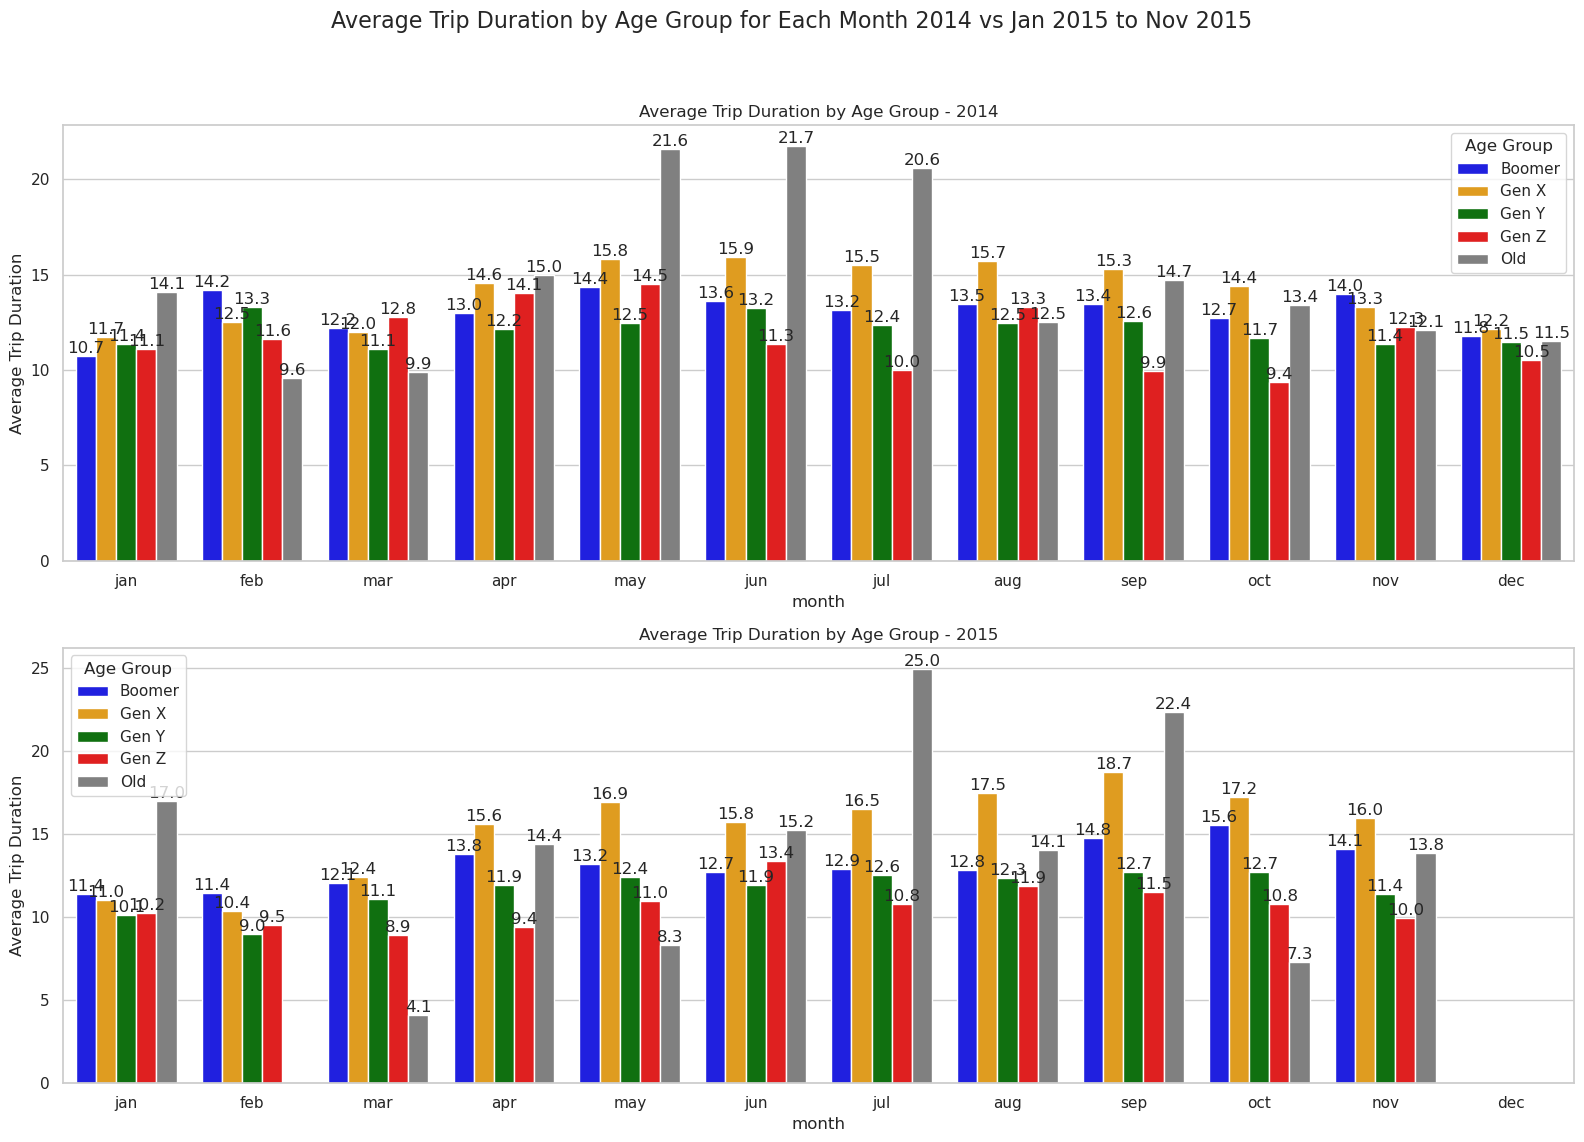

In [137]:
# Extract the year and month from the 'date' column
#df_1['year'] = df_1['date'].dt.year
#df_1['month'] = df_1['date'].dt.month

# Filter data for the year 2014
df_2014 = df_1[df_1['year'] == '2014'] #df_2014 = df_1[df_1['date'].dt.year == 2014]

# Filter data for the year 2015
df_2015 = df_1[df_1['year'] == '2015'] #df_2015 = df_1[df_1['date'].dt.year == 2015]

# Calculate average 'trip_duration' for each month and age group in 2014
avg_trip_duration_2014 = df_2014.groupby(['month', 'age_group'])['trip_duration'].mean().reset_index()

# Calculate average 'trip_duration' for each month and age group in 2015
avg_trip_duration_2015 = df_2015.groupby(['month', 'age_group'])['trip_duration'].mean().reset_index()

# Create two separate barplots for each year showing the average trip duration
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot barplot for 2014
ax_2014 = sns.barplot(x='month', y='trip_duration', hue='age_group', data=df_2014,
                      order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                      palette={'Boomer': 'blue', 'Gen X': 'orange', 'Gen Y': 'green', 'Gen Z': 'red', 'Old': 'grey'},
                      hue_order=['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old'],
                      ci=None, ax=axes[0])
ax_2014.set_title('Average Trip Duration by Age Group - 2014')
ax_2014.set_ylabel('Average Trip Duration')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Show the legend for 2014
ax_2014.legend(title='Age Group', labels=['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old'])

# Plot barplot for 2015
ax_2015 = sns.barplot(x='month', y='trip_duration', hue='age_group', data=df_2015,
                      order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                      palette={'Boomer': 'blue', 'Gen X': 'orange', 'Gen Y': 'green', 'Gen Z': 'red', 'Old': 'grey'},
                      hue_order=['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old'],
                      ci=None, ax=axes[1])
ax_2015.set_title('Average Trip Duration by Age Group - 2015')
ax_2015.set_ylabel('Average Trip Duration')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Show the legend for 2015
ax_2015.legend(title='Age Group', labels=['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old'])

# Add title and adjust spacing between subplots
plt.suptitle('Average Trip Duration by Age Group for Each Month 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot 
#plt.savefig('12_age_group_2014_2015_200230731_bar_monthly_time.png', dpi=100, bbox_inches="tight")

Text(91.25, 0.5, 'Start Time (Hour)')

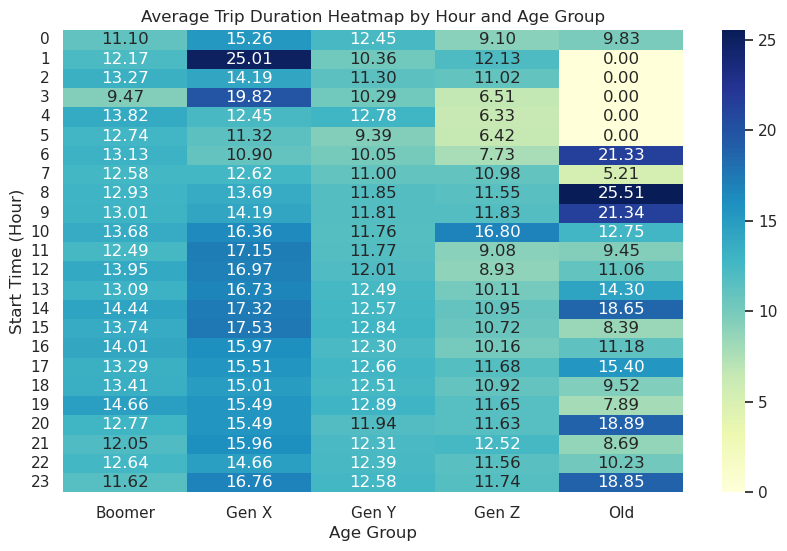

In [138]:
# Group the data by both hour of start_time and user_type
pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='age_group', values='trip_duration', aggfunc='mean')
#pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day_groups', values='user_type', aggfunc='count')

# Reorder the columns
pivot_df = pivot_df[['Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Old']].fillna(0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Trip Duration Heatmap by Hour and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Start Time (Hour)')

#### Neighborhood start, trip duration and age group

In [139]:
# Calculate the mean trip duration for each neighborhood and age group
#neighborhood_trip_durations = df_1[df_1['age_group'] != 'Old'].groupby(['neighborhood_start', 'borough_start', 'age_group'])['trip_duration'].mean()
neighborhood_trip_durations = df_1.groupby(['neighborhood_start', 'borough_start', 'age_group'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen X' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['Gen X'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Age_Group'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['Gen X'].cumsum() / df_neighborhood_durations['Gen X'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)
filtered_df

age_group                                                    Boomer  Gen X  \
neighborhood_start                            borough_start                  
Crown Heights North                           Brooklyn         5.05  41.86   
Lenox Hill West                               Manhattan       17.45  31.90   
Long Island City/Queens Plaza                 Queens          12.02  31.76   
Governor's Island/Ellis Island/Liberty Island Manhattan       19.96  26.96   
Bushwick South                                Brooklyn        11.23  26.91   
Upper West Side South                         Manhattan       27.84  24.00   
Battery Park                                  Manhattan       19.66  23.48   
Williamsburg (South Side)                     Brooklyn        18.34  23.43   
Financial District South                      Manhattan       19.42  23.17   
Columbia Street                               Brooklyn        10.88  22.65   
World Trade Center                            Manhattan       17.29  22.46   
Williamsburg (North Side)                     Brooklyn        21.62  22.39   
DUMBO/Vinegar Hill                            Brooklyn        22.96  22.19   
Sunnyside                                     Queens          41.82  21.92   
Midtown North                                 Manhattan       20.92  21.58   
Upper East Side North                         Manhattan       16.58  21.51   
Seaport                                       Manhattan       13.21  21.42   
Lincoln Square East                           Manhattan       16.74  21.36   
Park Slope                                    Brooklyn        19.33  21.27   
Downtown Brooklyn/MetroTech                   Brooklyn        14.72  20.81   
Yorkville West                                Manhattan       14.72  20.04   
Upper East Side South                         Manhattan       17.40  19.79   
Lincoln Square West                           Manhattan       22.80  19.66   
Battery Park City                             Manhattan       15.74  19.10   
Sutton Place/Turtle Bay North                 Manhattan       12.36  18.07   
Brooklyn Navy Yard                            Brooklyn        12.33  18.01   
Bedford                                       Brooklyn        14.43  17.98   
Financial District North                      Manhattan       15.86  17.94   
Clinton West                                  Manhattan       17.54  17.81   
TriBeCa/Civic Center                          Manhattan       13.14  17.52   
SoHo                                          Manhattan       12.93  17.48   
Lenox Hill East                               Manhattan       34.61  17.35   
Stuyvesant Heights                            Brooklyn         0.00  17.23   
Brooklyn Heights                              Brooklyn        11.13  17.19   
Meatpacking/West Village West                 Manhattan       13.82  17.13   
Boerum Hill                                   Brooklyn        13.66  17.11   
West Chelsea/Hudson Yards                     Manhattan       16.53  17.03   
Hudson Sq                                     Manhattan       15.49  16.84   
Yorkville East                                Manhattan       18.70  16.75   
Queensbridge/Ravenswood                       Queens           0.00  16.14   
Little Italy/NoLiTa                           Manhattan       14.23  16.05   
Midtown East                                  Manhattan       14.26  15.93   
UN/Turtle Bay South                           Manhattan       17.41  15.78   
East Williamsburg                             Brooklyn         4.03  15.40   
South Williamsburg                            Brooklyn         0.00  15.39   
Greenpoint                                    Brooklyn        21.12  15.12   
Alphabet City                                 Manhattan       13.47  15.04   
Long Island City/Hunters Point                Queens          24.12  14.96   
West Village                                  Manhattan       11.26  14.87   
Clinton Hill          

In [140]:
# Calculate the mean trip duration for each neighborhood and age group
#neighborhood_trip_durations = df_1[df_1['age_group'] != 'Old'].groupby(['neighborhood_start', 'borough_start', 'age_group'])['trip_duration'].mean()
neighborhood_trip_durations = df_1.groupby(['neighborhood_start', 'borough_start', 'age_group'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen X' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['Gen X'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Age_Group'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['Gen X'].cumsum() / df_neighborhood_durations['Gen X'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['start_station_longitude'], df_1['start_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['start_station_latitude'].mean(), gdf['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    max_age_group = row['Max_Age_Group']  # Get the age_group with the highest mean trip duration
    
    if max_age_group == 'Boomer':
        color = 'blue'
    elif max_age_group == 'Gen X':
        color = 'purple'
    elif max_age_group == 'Gen Y':
        color = 'green'
    elif max_age_group == 'Gen Z':
        color = 'red'
    else:
        color = 'grey'
    
    # Get the mean trip duration value from the neighborhood_trip_durations DataFrame
    mean_duration = row['Gen X']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_start'].values:
        latitude = gdf.loc[(gdf['neighborhood_start'] == neighborhood) & (gdf['borough_start'] == borough), 'start_station_latitude'].iloc[0]
        longitude = gdf.loc[(gdf['neighborhood_start'] == neighborhood) & (gdf['borough_start'] == borough), 'start_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Age Group: {max_age_group}\nNeighborhood Start: {neighborhood}\nBorough Start: {borough}\nMean Duration: {mean_duration:.2f}"
        ).add_to(m)
    
# Display the Folium map in the notebook
#display(HTML(m._repr_html_()))

# Save the map as an HTML file
output_file = "07_1.map_neigh_start_age_group_trip_dur_gen_X.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

In [141]:
# Calculate the mean trip duration for each neighborhood and age group
#neighborhood_trip_durations = df_1[df_1['age_group'] != 'Old'].groupby(['neighborhood_start', 'borough_start', 'age_group'])['trip_duration'].mean()
neighborhood_trip_durations = df_1.groupby(['neighborhood_start', 'borough_start', 'age_group'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen X' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['Gen Y'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Age_Group'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['Gen Y'].cumsum() / df_neighborhood_durations['Gen Y'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)
filtered_df

age_group                                                    Boomer  Gen X  \
neighborhood_start                            borough_start                  
Battery Park                                  Manhattan       19.66  23.48   
Governor's Island/Ellis Island/Liberty Island Manhattan       19.96  26.96   
Columbia Street                               Brooklyn        10.88  22.65   
Park Slope                                    Brooklyn        19.33  21.27   
Financial District South                      Manhattan       19.42  23.17   
Upper West Side South                         Manhattan       27.84  24.00   
Boerum Hill                                   Brooklyn        13.66  17.11   
Lincoln Square West                           Manhattan       22.80  19.66   
Yorkville West                                Manhattan       14.72  20.04   
Lenox Hill East                               Manhattan       34.61  17.35   
Crown Heights North                           Brooklyn         5.05  41.86   
Lincoln Square East                           Manhattan       16.74  21.36   
Long Island City/Queens Plaza                 Queens          12.02  31.76   
World Trade Center                            Manhattan       17.29  22.46   
Battery Park City                             Manhattan       15.74  19.10   
Bushwick South                                Brooklyn        11.23  26.91   
South Williamsburg                            Brooklyn         0.00  15.39   
Williamsburg (South Side)                     Brooklyn        18.34  23.43   
Clinton West                                  Manhattan       17.54  17.81   
Williamsburg (North Side)                     Brooklyn        21.62  22.39   
Bedford                                       Brooklyn        14.43  17.98   
Sutton Place/Turtle Bay North                 Manhattan       12.36  18.07   
Financial District North                      Manhattan       15.86  17.94   
Upper East Side North                         Manhattan       16.58  21.51   
Seaport                                       Manhattan       13.21  21.42   
Midtown North                                 Manhattan       20.92  21.58   
Greenpoint                                    Brooklyn        21.12  15.12   
Upper East Side South                         Manhattan       17.40  19.79   
DUMBO/Vinegar Hill                            Brooklyn        22.96  22.19   
Lenox Hill West                               Manhattan       17.45  31.90   
Downtown Brooklyn/MetroTech                   Brooklyn        14.72  20.81   
West Chelsea/Hudson Yards                     Manhattan       16.53  17.03   
Brooklyn Navy Yard                            Brooklyn        12.33  18.01   
Yorkville East                                Manhattan       18.70  16.75   
Two Bridges/Seward Park                       Manhattan       13.48  14.18   
UN/Turtle Bay South                           Manhattan       17.41  15.78   
Meatpacking/West Village West                 Manhattan       13.82  17.13   
Hudson Sq                                     Manhattan       15.49  16.84   
Midtown East                                  Manhattan       14.26  15.93   
Times Sq/Theatre District                     Manhattan       11.77  14.50   
Midtown Center                                Manhattan       12.00  14.36   
Alphabet City                                 Manhattan       13.47  15.04   
TriBeCa/Civic Center                          Manhattan       13.14  17.52   
Lower East Side                               Manhattan       12.74  14.60   
Clinton Hill                                  Brooklyn        12.68  14.81   
SoHo                                          Manhattan       12.93  17.48   
Stuyvesant Heights                            Brooklyn         0.00  17.23   
Clinton East                                  Manhattan       12.98  14.42   
Brooklyn Heights                              Brooklyn        11.13  17.19   
Little Italy/NoLiTa   

In [142]:
# Calculate the mean trip duration for each neighborhood and age group
#neighborhood_trip_durations = df_1[df_1['age_group'] != 'Old'].groupby(['neighborhood_start', 'borough_start', 'age_group'])['trip_duration'].mean()
neighborhood_trip_durations = df_1.groupby(['neighborhood_start', 'borough_start', 'age_group'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen X' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['Gen Y'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Age_Group'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['Gen Y'].cumsum() / df_neighborhood_durations['Gen Y'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['start_station_longitude'], df_1['start_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['start_station_latitude'].mean(), gdf['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    max_age_group = row['Max_Age_Group']  # Get the age_group with the highest mean trip duration
    
    if max_age_group == 'Boomer':
        color = 'blue'
    elif max_age_group == 'Gen X':
        color = 'purple'
    elif max_age_group == 'Gen Y':
        color = 'green'
    elif max_age_group == 'Gen Z':
        color = 'red'
    else:
        color = 'grey'
    
    # Get the mean trip duration value from the neighborhood_trip_durations DataFrame
    mean_duration = row['Gen Y']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_start'].values:
        latitude = gdf.loc[(gdf['neighborhood_start'] == neighborhood) & (gdf['borough_start'] == borough), 'start_station_latitude'].iloc[0]
        longitude = gdf.loc[(gdf['neighborhood_start'] == neighborhood) & (gdf['borough_start'] == borough), 'start_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Age Group: {max_age_group}\nNeighborhood Start: {neighborhood}\nBorough Start: {borough}\nMean Duration: {mean_duration:.2f}"
        ).add_to(m)
    
# Display the Folium map in the notebook
#display(HTML(m._repr_html_()))

# Save the map as an HTML file
output_file = "07_2.map_neigh_start_age_group_trip_dur_gen_Y.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

#### Neighborhood end, trip duration and age group

In [143]:
# Calculate the mean trip duration for each neighborhood and age group
neighborhood_trip_durations = df_1.groupby(['neighborhood_end', 'borough_end', 'age_group'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen X' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['Gen X'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Age_Group'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['Gen X'].cumsum() / df_neighborhood_durations['Gen X'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)
filtered_df

age_group                                                  Boomer  Gen X  \
neighborhood_end                              borough_end                  
Upper East Side North                         Manhattan     24.14  54.49   
Governor's Island/Ellis Island/Liberty Island Manhattan     19.96  32.42   
Williamsburg (South Side)                     Brooklyn      24.38  26.99   
Battery Park                                  Manhattan     22.41  26.79   
Upper West Side South                         Manhattan     17.81  26.52   
Midtown North                                 Manhattan     14.78  25.78   
Sunnyside                                     Queens         4.23  24.52   
Park Slope                                    Brooklyn      27.60  24.52   
Lincoln Square East                           Manhattan     18.41  23.67   
Bushwick South                                Brooklyn      32.40  23.64   
Columbia Street                               Brooklyn      13.20  23.48   
Williamsburg (North Side)                     Brooklyn      25.76  23.08   
East Williamsburg                             Brooklyn       4.03  22.32   
World Trade Center                            Manhattan     16.90  21.92   
Upper East Side South                         Manhattan     22.08  21.70   
DUMBO/Vinegar Hill                            Brooklyn      17.16  21.24   
Lincoln Square West                           Manhattan     17.17  20.44   
Downtown Brooklyn/MetroTech                   Brooklyn      14.37  20.11   
Battery Park City                             Manhattan     16.59  19.83   
Bedford                                       Brooklyn      14.37  19.73   
Crown Heights North                           Brooklyn       0.00  19.63   
Long Island City/Queens Plaza                 Queens        17.19  19.52   
Brooklyn Heights                              Brooklyn      12.82  19.33   
Lenox Hill East                               Manhattan     16.48  19.11   
Financial District South                      Manhattan     15.76  18.74   
Seaport                                       Manhattan     14.62  18.70   
Yorkville East                                Manhattan     55.49  18.61   
Yorkville West                                Manhattan     15.71  18.17   
Boerum Hill                                   Brooklyn      14.43  18.07   
Financial District North                      Manhattan     16.65  17.74   
SoHo                                          Manhattan     14.61  17.41   
Clinton Hill                                  Brooklyn      14.41  17.30   
West Chelsea/Hudson Yards                     Manhattan     14.95  17.25   
Sutton Place/Turtle Bay North                 Manhattan     13.78  17.14   
Meatpacking/West Village West                 Manhattan     14.02  16.88   
Little Italy/NoLiTa                           Manhattan     13.65  16.79   
TriBeCa/Civic Center                          Manhattan     13.99  16.57   
Lenox Hill West                               Manhattan     15.22  16.42   
Clinton West                                  Manhattan     15.78  16.32   
Hudson Sq                                     Manhattan     12.75  16.19   
Times Sq/Theatre District                     Manhattan     11.54  15.94   
Lower East Side                               Manhattan     12.69  15.87   
Chinatown                                     Manhattan     12.79  15.76   
UN/Turtle Bay South                           Manhattan     13.14  15.75   
Two Bridges/Seward Park                       Manhattan     14.53  15.70   
Alphabet City                                 Manhattan     12.67  15.37   
Midtown East                                  Manhattan     17.51  14.95   
Clinton East                                  Manhattan     13.16  14.62   
Midtown South                                 Manhattan     11.10  14.61   
Long Island City/Hunters Point                Queens        17.61  14.24   

age_group                                      

In [144]:
# Calculate the mean trip duration for each neighborhood and age group
neighborhood_trip_durations = df_1.groupby(['neighborhood_end', 'borough_end', 'age_group'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen X' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['Gen X'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Age_Group'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['Gen X'].cumsum() / df_neighborhood_durations['Gen X'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['end_station_longitude'], df_1['end_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['end_station_latitude'].mean(), gdf['end_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    max_age_group = row['Max_Age_Group']  # Get the age_group with the highest mean trip duration
    
    if max_age_group == 'Boomer':
        color = 'blue'
    elif max_age_group == 'Gen X':
        color = 'purple'
    elif max_age_group == 'Gen Y':
        color = 'green'
    elif max_age_group == 'Gen Z':
        color = 'red'
    else:
        color = 'grey'
    
    # Get the mean trip duration value from the neighborhood_trip_durations DataFrame
    mean_duration = row['Gen X']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_end'].values:
        latitude = gdf.loc[(gdf['neighborhood_end'] == neighborhood) & (gdf['borough_end'] == borough), 'end_station_latitude'].iloc[0]
        longitude = gdf.loc[(gdf['neighborhood_end'] == neighborhood) & (gdf['borough_end'] == borough), 'end_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Age Group: {max_age_group}\nNeighborhood End: {neighborhood}\nBorough End: {borough}\nMean Duration: {mean_duration:.2f}"
        ).add_to(m)
        
# Display the Folium map in the notebook
#HTML(m._repr_html_())

# Save the map as an HTML file
output_file = "08_1.map_neigh_end_age_group_trip_dur_gen_X.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

In [145]:
# Calculate the mean trip duration for each neighborhood and age group
neighborhood_trip_durations = df_1.groupby(['neighborhood_end', 'borough_end', 'age_group'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen Y' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['Gen Y'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Age_Group'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['Gen Y'].cumsum() / df_neighborhood_durations['Gen Y'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)
filtered_df

age_group                                                  Boomer  Gen X  \
neighborhood_end                              borough_end                  
Crown Heights North                           Brooklyn       0.00  19.63   
Sunnyside                                     Queens         4.23  24.52   
Upper West Side South                         Manhattan     17.81  26.52   
Governor's Island/Ellis Island/Liberty Island Manhattan     19.96  32.42   
Park Slope                                    Brooklyn      27.60  24.52   
Long Island City/Queens Plaza                 Queens        17.19  19.52   
Columbia Street                               Brooklyn      13.20  23.48   
Boerum Hill                                   Brooklyn      14.43  18.07   
Upper East Side North                         Manhattan     24.14  54.49   
Financial District South                      Manhattan     15.76  18.74   
Williamsburg (South Side)                     Brooklyn      24.38  26.99   
Lincoln Square East                           Manhattan     18.41  23.67   
Battery Park                                  Manhattan     22.41  26.79   
Lincoln Square West                           Manhattan     17.17  20.44   
World Trade Center                            Manhattan     16.90  21.92   
Yorkville West                                Manhattan     15.71  18.17   
Bushwick South                                Brooklyn      32.40  23.64   
Williamsburg (North Side)                     Brooklyn      25.76  23.08   
Battery Park City                             Manhattan     16.59  19.83   
Midtown North                                 Manhattan     14.78  25.78   
Lenox Hill East                               Manhattan     16.48  19.11   
Brooklyn Heights                              Brooklyn      12.82  19.33   
South Williamsburg                            Brooklyn       0.00  12.25   
Stuyvesant Heights                            Brooklyn      10.32  13.62   
Upper East Side South                         Manhattan     22.08  21.70   
Bedford                                       Brooklyn      14.37  19.73   
Sutton Place/Turtle Bay North                 Manhattan     13.78  17.14   
Lenox Hill West                               Manhattan     15.22  16.42   
Financial District North                      Manhattan     16.65  17.74   
Two Bridges/Seward Park                       Manhattan     14.53  15.70   
DUMBO/Vinegar Hill                            Brooklyn      17.16  21.24   
Clinton Hill                                  Brooklyn      14.41  17.30   
West Chelsea/Hudson Yards                     Manhattan     14.95  17.25   
Seaport                                       Manhattan     14.62  18.70   
Alphabet City                                 Manhattan     12.67  15.37   
Downtown Brooklyn/MetroTech                   Brooklyn      14.37  20.11   
UN/Turtle Bay South                           Manhattan     13.14  15.75   
Midtown East                                  Manhattan     17.51  14.95   
Clinton West                                  Manhattan     15.78  16.32   
Yorkville East                                Manhattan     55.49  18.61   
SoHo                                          Manhattan     14.61  17.41   
TriBeCa/Civic Center                          Manhattan     13.99  16.57   
Lower East Side                               Manhattan     12.69  15.87   
Meatpacking/West Village West                 Manhattan     14.02  16.88   
Chinatown                                     Manhattan     12.79  15.76   
Long Island City/Hunters Point                Queens        17.61  14.24   
East Williamsburg                             Brooklyn       4.03  22.32   
Clinton East                                  Manhattan     13.16  14.62   
Brooklyn Navy Yard                            Brooklyn      64.28  13.96   
Hudson Sq                                     Manhattan     12.75  16.19   

age_group                                      

In [146]:
# Calculate the mean trip duration for each neighborhood and age group
neighborhood_trip_durations = df_1.groupby(['neighborhood_end', 'borough_end', 'age_group'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen Y' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['Gen Y'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Age_Group'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['Gen Y'].cumsum() / df_neighborhood_durations['Gen Y'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['end_station_longitude'], df_1['end_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['end_station_latitude'].mean(), gdf['end_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    max_age_group = row['Max_Age_Group']  # Get the age_group with the highest mean trip duration
    
    if max_age_group == 'Boomer':
        color = 'blue'
    elif max_age_group == 'Gen X':
        color = 'purple'
    elif max_age_group == 'Gen Y':
        color = 'green'
    elif max_age_group == 'Gen Z':
        color = 'red'
    else:
        color = 'grey'
    
    # Get the mean trip duration value from the neighborhood_trip_durations DataFrame
    mean_duration = row['Gen Y']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_end'].values:
        latitude = gdf.loc[(gdf['neighborhood_end'] == neighborhood) & (gdf['borough_end'] == borough), 'end_station_latitude'].iloc[0]
        longitude = gdf.loc[(gdf['neighborhood_end'] == neighborhood) & (gdf['borough_end'] == borough), 'end_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Age Group: {max_age_group}\nNeighborhood End: {neighborhood}\nBorough End: {borough}\nMean Duration: {mean_duration:.2f}"
        ).add_to(m)
        
# Display the Folium map in the notebook
#HTML(m._repr_html_())

# Save the map as an HTML file
output_file = "08_2.map_neigh_end_age_group_trip_dur_gen_Y.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">The overview of our customers</p>
    <ol>
        <li>The average trip duration for the Boomer age group during different times of the day is slightly similar to that Gen Y.
    <li>On the other hand, the average trip duration for the Gen X age group during different times of the day is higher compared to the other age groups. Meanwhile, the smallest number of older customers exhibits a diverse range of average trip durations.</ol>
</div>

/tmp/ipykernel_32/1841568831.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2014 = sns.barplot(x='month', y='trip_duration', hue='sex', data=avg_trip_duration_2014,
/tmp/ipykernel_32/1841568831.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2015 = sns.barplot(x='month', y='trip_duration', hue='sex', data=avg_trip_duration_2015,


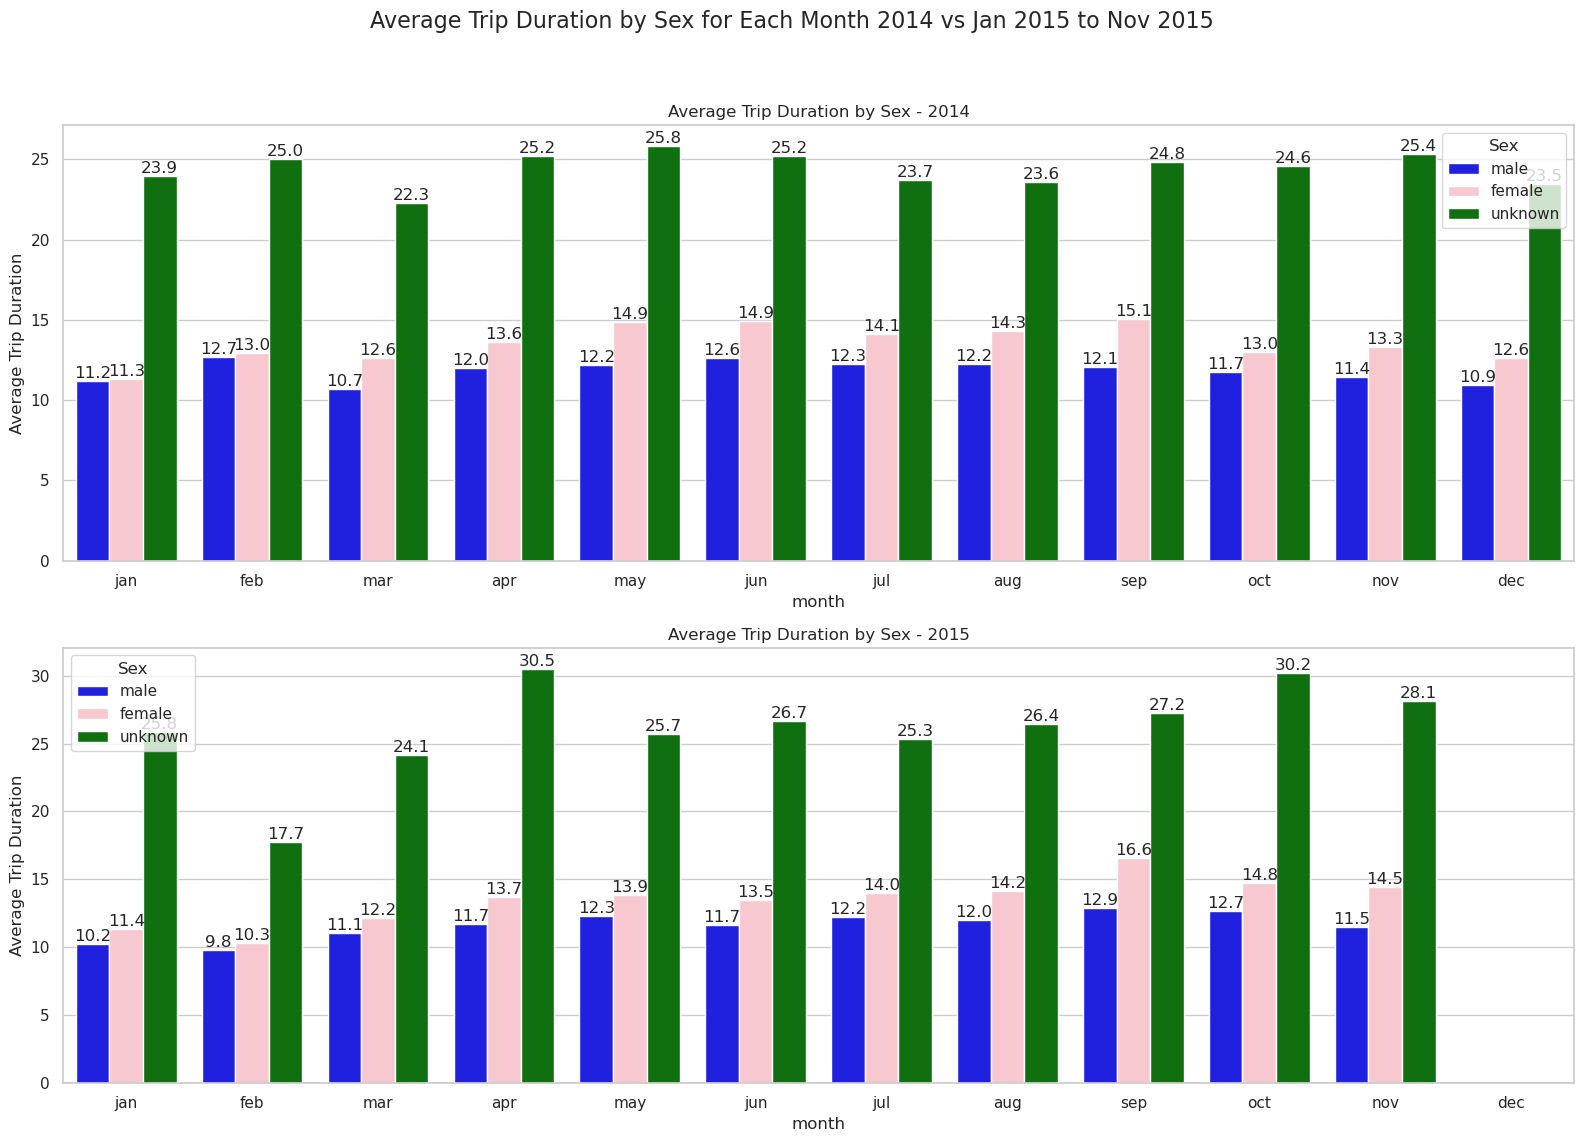

In [147]:
# Calculate average 'trip_duration' for each month and sex in 2014
avg_trip_duration_2014 = df_2014.groupby(['month', 'sex'])['trip_duration'].mean().reset_index()

# Calculate average 'trip_duration' for each month and sex in 2015
avg_trip_duration_2015 = df_2015.groupby(['month', 'sex'])['trip_duration'].mean().reset_index()

# Create two separate barplots for each year showing the average trip duration
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot barplot for 2014
ax_2014 = sns.barplot(x='month', y='trip_duration', hue='sex', data=avg_trip_duration_2014,
                      order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                      palette={'male': 'blue', 'female': 'pink', 'unknown': 'green'},
                      hue_order=['male', 'female', 'unknown'],
                      ci=None, ax=axes[0])
ax_2014.set_title('Average Trip Duration by Sex - 2014')
ax_2014.set_ylabel('Average Trip Duration')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Show the legend for 2014
ax_2014.legend(title='Sex', labels=['male', 'female', 'unknown'])

# Plot barplot for 2015
ax_2015 = sns.barplot(x='month', y='trip_duration', hue='sex', data=avg_trip_duration_2015,
                      order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                      palette={'male': 'blue', 'female': 'pink', 'unknown': 'green'},
                      hue_order=['male', 'female', 'unknown'],
                      ci=None, ax=axes[1])
ax_2015.set_title('Average Trip Duration by Sex - 2015')
ax_2015.set_ylabel('Average Trip Duration')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Show the legend for 2015
ax_2015.legend(title='Sex', labels=['male', 'female', 'unknown'])

# Add title and adjust spacing between subplots
plt.suptitle('Average Trip Duration by Sex for Each Month 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Save the plot 
#plt.savefig('13_sex_2014_2015_200230731_bar_monthly_time.png', dpi=100, bbox_inches="tight")

Text(91.25, 0.5, 'Start Time (Hour)')

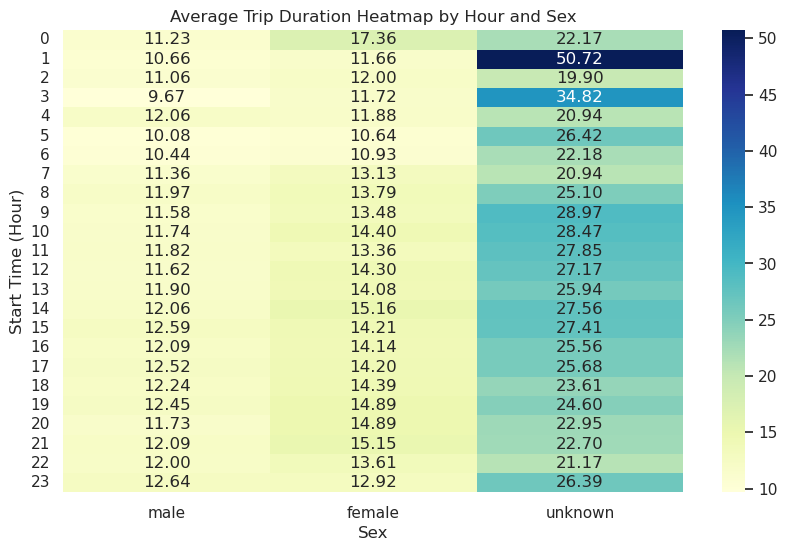

In [148]:
# Group the data by both hour of start_time and user_type
pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='sex', values='trip_duration', aggfunc='mean')
#pivot_df = df_1.pivot_table(index=df_1['start_time'].dt.hour, columns='day_groups', values='user_type', aggfunc='count')

# Reorder the columns
pivot_df = pivot_df[['male', 'female', 'unknown']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Trip Duration Heatmap by Hour and Sex')
plt.xlabel('Sex')
plt.ylabel('Start Time (Hour)')

#### Neighborhood start, trip duration and sex

In [149]:
# Calculate the mean trip duration for each neighborhood and age group
#neighborhood_trip_durations = df_1[df_1['sex'] != 'unknown'].groupby(['neighborhood_start', 'borough_start', 'sex'])['trip_duration'].mean()
neighborhood_trip_durations = df_1.groupby(['neighborhood_start', 'borough_start', 'sex'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen X' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['male'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Sex'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['male'].cumsum() / df_neighborhood_durations['male'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)
filtered_df

sex                                                          female   male  \
neighborhood_start                            borough_start                  
Governor's Island/Ellis Island/Liberty Island Manhattan       34.40  29.37   
Crown Heights North                           Brooklyn        17.46  28.49   
Battery Park                                  Manhattan       21.22  24.99   
Sunnyside                                     Queens           0.00  24.62   
Columbia Street                               Brooklyn        21.66  18.42   
Park Slope                                    Brooklyn        16.54  18.38   
Financial District South                      Manhattan       21.72  18.23   
Upper West Side South                         Manhattan       24.57  17.97   
Lenox Hill East                               Manhattan       17.73  17.69   
Long Island City/Queens Plaza                 Queens          17.26  17.54   
Yorkville West                                Manhattan       20.55  17.06   
Lincoln Square East                           Manhattan       19.52  16.15   
Lincoln Square West                           Manhattan       21.76  15.93   
World Trade Center                            Manhattan       18.77  15.64   
Upper East Side North                         Manhattan       15.96  15.61   
Williamsburg (North Side)                     Brooklyn        16.39  15.52   
Williamsburg (South Side)                     Brooklyn        17.57  15.38   
Bedford                                       Brooklyn        15.18  15.02   
Clinton West                                  Manhattan       20.07  14.63   
Lenox Hill West                               Manhattan       40.89  14.56   
Financial District North                      Manhattan       16.51  14.51   
Sutton Place/Turtle Bay North                 Manhattan       15.89  14.49   
Battery Park City                             Manhattan       17.64  14.40   
Upper East Side South                         Manhattan       23.55  14.08   
Midtown North                                 Manhattan       21.02  13.97   
Bushwick South                                Brooklyn        16.97  13.83   
Boerum Hill                                   Brooklyn        19.94  13.72   
Seaport                                       Manhattan       17.94  13.61   
Brooklyn Navy Yard                            Brooklyn        14.96  13.43   
Midtown East                                  Manhattan       14.88  13.23   
DUMBO/Vinegar Hill                            Brooklyn        16.47  13.18   
Yorkville East                                Manhattan       18.37  13.11   
Greenpoint                                    Brooklyn        17.43  13.04   
UN/Turtle Bay South                           Manhattan       17.04  13.00   
Downtown Brooklyn/MetroTech                   Brooklyn        15.38  13.00   
Meatpacking/West Village West                 Manhattan       14.45  12.86   
West Chelsea/Hudson Yards                     Manhattan       15.63  12.76   
Hudson Sq                                     Manhattan       17.63  12.65   
South Williamsburg                            Brooklyn        17.46  12.57   
Two Bridges/Seward Park                       Manhattan       14.20  12.54   
Alphabet City                                 Manhattan       14.69  12.25   
Stuyvesant Heights                            Brooklyn        10.69  12.20   
Clinton Hill                                  Brooklyn        12.28  12.09   
SoHo                                          Manhattan       14.07  12.08   
TriBeCa/Civic Center                          Manhattan       14.65  12.08   
Midtown Center                                Manhattan       14.19  11.92   
Lower East Side                               Manhattan       12.87  11.83   
Little Italy/NoLiTa                           Manhattan       13.10  11.67   
Clinton East                                  Manhattan       14.48  11.56   
East Village          

In [150]:
# Calculate the mean trip duration for each neighborhood and age group
neighborhood_trip_durations = df_1[df_1['sex'] != 'unknown'].groupby(['neighborhood_start', 'borough_start', 'sex'])['trip_duration'].mean()
#neighborhood_trip_durations = df_1.groupby(['neighborhood_start', 'borough_start', 'sex'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen X' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['male'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Sex'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['male'].cumsum() / df_neighborhood_durations['male'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['start_station_longitude'], df_1['start_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['start_station_latitude'].mean(), gdf['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    max_age_group = row['Max_Sex']  # Get the age_group with the highest mean trip duration
    
    if max_age_group == 'male':
        color = 'blue'
    elif max_age_group == 'female':
        color = 'pink'
    else:
        color = 'green'
   
    
    # Get the mean trip duration value from the neighborhood_trip_durations DataFrame
    mean_duration = row['male']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_start'].values:
        latitude = gdf.loc[(gdf['neighborhood_start'] == neighborhood) & (gdf['borough_start'] == borough), 'start_station_latitude'].iloc[0]
        longitude = gdf.loc[(gdf['neighborhood_start'] == neighborhood) & (gdf['borough_start'] == borough), 'start_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Sex: {max_sex}\nNeighborhood Start: {neighborhood}\nBorough Start: {borough}\nMean Duration: {mean_duration:.2f}"
        ).add_to(m)
    
# Display the Folium map in the notebook
#display(HTML(m._repr_html_()))

# Save the map as an HTML file
output_file = "09.map_neigh_start_sex_trip_dur.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

#### Neighborhood end, trip duration and sex

In [151]:
# Calculate the mean trip duration for each neighborhood and age group
#neighborhood_trip_durations = df_1[df_1['sex'] != 'unknown'].groupby(['neighborhood_end', 'borough_end', 'sex'])['trip_duration'].mean()
neighborhood_trip_durations = df_1.groupby(['neighborhood_end', 'borough_end', 'sex'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen Y' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['male'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Sex'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['male'].cumsum() / df_neighborhood_durations['male'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)
filtered_df

sex                                                        female   male  \
neighborhood_end                              borough_end                  
Sunnyside                                     Queens         0.00  29.40   
Governor's Island/Ellis Island/Liberty Island Manhattan     36.96  29.37   
Upper West Side South                         Manhattan     21.52  26.65   
Park Slope                                    Brooklyn      23.89  23.13   
Long Island City/Queens Plaza                 Queens        18.09  19.75   
Williamsburg (South Side)                     Brooklyn      23.59  17.83   
Upper East Side North                         Manhattan    107.79  17.76   
Battery Park                                  Manhattan     20.07  17.33   
Yorkville West                                Manhattan     15.22  17.07   
Columbia Street                               Brooklyn      16.53  16.93   
Financial District South                      Manhattan     18.86  16.53   
Lincoln Square East                           Manhattan     19.85  16.36   
Lenox Hill East                               Manhattan     16.67  16.05   
Bushwick South                                Brooklyn      14.22  15.80   
Williamsburg (North Side)                     Brooklyn      17.92  15.73   
Battery Park City                             Manhattan     17.51  15.36   
World Trade Center                            Manhattan     18.02  15.12   
Lincoln Square West                           Manhattan     19.31  15.06   
Boerum Hill                                   Brooklyn      21.26  14.86   
Bedford                                       Brooklyn      14.06  14.86   
Upper East Side South                         Manhattan     18.76  14.72   
Lenox Hill West                               Manhattan     15.25  14.55   
Midtown North                                 Manhattan     18.28  14.27   
Sutton Place/Turtle Bay North                 Manhattan     16.24  14.24   
Financial District North                      Manhattan     16.68  14.03   
Stuyvesant Heights                            Brooklyn      14.29  13.87   
Brooklyn Heights                              Brooklyn      15.65  13.82   
Yorkville East                                Manhattan     33.92  13.71   
Seaport                                       Manhattan     16.62  13.69   
Two Bridges/Seward Park                       Manhattan     13.52  13.57   
Clinton Hill                                  Brooklyn      13.89  13.27   
SoHo                                          Manhattan     13.33  13.02   
Alphabet City                                 Manhattan     14.30  12.98   
Clinton West                                  Manhattan     17.84  12.95   
West Chelsea/Hudson Yards                     Manhattan     16.79  12.93   
Long Island City/Hunters Point                Queens        14.35  12.66   
DUMBO/Vinegar Hill                            Brooklyn      14.55  12.64   
UN/Turtle Bay South                           Manhattan     16.46  12.59   
Midtown East                                  Manhattan     17.98  12.58   
Lower East Side                               Manhattan     13.22  12.37   
Meatpacking/West Village West                 Manhattan     13.97  12.27   
Chinatown                                     Manhattan     13.52  12.25   
Hudson Sq                                     Manhattan     13.75  12.12   
South Williamsburg                            Brooklyn      15.84  12.01   
Clinton East                                  Manhattan     14.37  11.99   
Little Italy/NoLiTa                           Manhattan     13.63  11.92   
Downtown Brooklyn/MetroTech                   Brooklyn      15.64  11.92   
TriBeCa/Civic Center                          Manhattan     14.84  11.90   
Stuy Town/Peter Cooper Village                Manhattan     12.82  11.87   
Murray Hill                                   Manhattan     13.83  11.57   
East Williamsburg                             Br

In [152]:
# Calculate the mean trip duration for each neighborhood and age group
neighborhood_trip_durations = df_1[df_1['sex'] != 'unknown'].groupby(['neighborhood_end', 'borough_end', 'sex'])['trip_duration'].mean()
#neighborhood_trip_durations = df_1.groupby(['neighborhood_end', 'borough_end', 'sex'])['trip_duration'].mean()

# Unstack the age group to create columns for each age group
df_neighborhood_durations = neighborhood_trip_durations.unstack().fillna(0).astype(float)

# Sort neighborhoods based on descending mean trip duration for the 'Gen Y' age group
df_neighborhood_durations = df_neighborhood_durations.sort_values(by=['male'], ascending=False)

# Choose the age group with the highest mean trip duration for each row
df_neighborhood_durations['Max_Sex'] = df_neighborhood_durations.idxmax(axis=1)

# Calculate Pareto percentages for 'Gen X' age group
pareto = 100 * df_neighborhood_durations['male'].cumsum() / df_neighborhood_durations['male'].sum()

# Add Pareto percentages to the DataFrame
df_neighborhood_durations['Percentage'] = pareto

# Filter the data based on Pareto percentage
filtered_df = df_neighborhood_durations[df_neighborhood_durations['Percentage'] <= 81]

# Round the float values to 2 decimals
filtered_df = filtered_df.round(2)

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_1['end_station_longitude'], df_1['end_station_latitude'])
gdf = gpd.GeoDataFrame(df_1, geometry=geometry)

# Create a map centered around the mean latitude and longitude
map_center = [gdf['end_station_latitude'].mean(), gdf['end_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Iterate through each row in the filtered DataFrame
for idx, row in filtered_df.iterrows():
    neighborhood = idx[0]
    borough = idx[1]
    max_age_group = row['Max_Sex']  # Get the age_group with the highest mean trip duration
    
    if max_age_group == 'male':
        color = 'blue'
    elif max_age_group == 'female':
        color = 'pink'
    else:
        color = 'green'
    
    # Get the mean trip duration value from the neighborhood_trip_durations DataFrame
    mean_duration = row['male']
    
    # Check if the neighborhood exists in the DataFrame before accessing its latitude and longitude
    if neighborhood in gdf['neighborhood_end'].values:
        latitude = gdf.loc[(gdf['neighborhood_end'] == neighborhood) & (gdf['borough_end'] == borough), 'end_station_latitude'].iloc[0]
        longitude = gdf.loc[(gdf['neighborhood_end'] == neighborhood) & (gdf['borough_end'] == borough), 'end_station_longitude'].iloc[0]
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Sex: {max_sex}\nNeighborhood End: {neighborhood}\nBorough End: {borough}\nMean Duration: {mean_duration:.2f}"
        ).add_to(m)
        
# Display the Folium map in the notebook
#HTML(m._repr_html_())

# Save the map as an HTML file
output_file = "10.map_neigh_end_sex_trip_dur.html"
m.save(output_file)

# Display a link to the saved HTML file
display(HTML(f"<p style='font-size: 16px;'>Click to display map <a href='{output_file}' target='_blank' style='font-size: 16px;'>{output_file}</a></p>"))

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">The overview of our customers</p>
    <ol>
    <li>As mentioned previously, male contribute over 65% and female ~20% which area should be focused.
    <li>The average trip duration for the male is the fastest compare to other sex.
    <li>On the other hand, the average trip duration for 20% with unknown contribute the highest average trip duration.</ol>
</div>

# Understanding the price structure

#### Pricing to determine revenue

<ul style ="font-family:Verdana; font-size:16px; text-align:justify">
    <li>Annual Citi Bike memberships cost \$149 (\$99 at launch) and provide members with an unlimited number of 45-minute rides.
<li>Rides longer than 45 minutes result in overage charges ranging from \$2.50 for an additional 25 minutes to more than \$9.00 for additional time.
<li>Seven-day passes are available for \$25 with similar trip time constraints.
<li>24-hour passes are available for \$9.95, both with similar trip time constraints.
<li>Bikes that are missing for longer than 24 hours can result in a /$1,200 fee (plus tax) charged to the account holder that took out the bike.
<li>New York City Housing Authority residents and credit union members qualify for discounted \$60 annual memberships.</ul>

<p style ="font-family:Verdana; font-size:16px; text-align:justify">The pricing system was established in 2013 with the intention that one-day and seven-day passes for casual users would provide a subsidy for the \$95 annual membership offered to subscribers. In addition to user-generated revenue, Citibike also generated income through sponsorships. Notably, Citibank, the program's primary advertising sponsor, agreed to extend its licensing deal from the original end date in 2019 to 2024. This extension resulted in an additional \$70.5 million being added to its initial sponsorship.</p>
<p style ="font-family:Verdana; font-size:16px; text-align:justify">After a period of declining performance in 2014 compared to 2013, the CEO took action for improvements in 2015. Citibike hired 28 new employees to bolster the corporate team. On the operational front, the company introduced a tracking app to monitor users' trips. By August 2015, a new back-end operating system had been implemented, older kiosks were swapped out for new ones, and approximately 12,000 docking points were either replaced or repaired. Moreover, 134 additional stations were installed, coinciding with the company's rebranding from Alta Bikeshare Systems to Motivate.
<br><br>
Citi Bike also unveiled a new bike model, which closely resembles the previous version but offers enhanced functionality. Around 2,400 of these new bikes were deployed throughout New York City.
<br><br>
In terms of maintenance, the repairs team implemented weekend shifts and conducted more on-street repairs, reducing the need to bring bikes back to the shop. Furthermore, a proactive approach was adopted for stations with low batteries; these were identified and replaced before causing service disruptions. This strategy aimed to prevent malfunctions rather than responding to unusable stations after the fact.</p>
<p style ="font-family:Verdana; font-size:16px; text-align:justify">In order to create business plan for 2016 it is important to have a complete overview about Citibike up to the latest.</p>

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Please note:</b><p style = "font-family:Verdana; font-size:14px"><b>As we do not know  the precise number of each user type and the exact new customers and the current customers, we are unable to calculate the revenue and explore which revenue contribution from each user type, sponsorship and also the type of bike. Our reliable data will be the trips and the average time. Furthermore, we exclude competitor analysis of other similar state citibikes or other modes of transpotation. </b><p>
</div>

## Bikes availabilty vs utility

In [155]:
from IPython.display import display, HTML

stations_2014 =df_1[(df_1['year'] == "2014")]['start_station_name'].nunique()
bikes_2014 =df_1[(df_1['year'] == "2014")]['bike_id'].nunique()
display(HTML(f"<p style='font-size: 16px;'>Stations to end of Dec 2014: {stations_2014} and number of bikes to end of Dec 2014: {bikes_2014} </p>"))

In [156]:
stations_2015 =df_1[(df_1['year'] == "2015")]['start_station_name'].nunique()
bikes_2015 =df_1[(df_1['year'] == "2015")]['bike_id'].nunique()
display(HTML(f"<p style='font-size: 16px;'>Stations to end of Nov 2015: {stations_2015} and number of bikes to end of Nov 2015: {bikes_2015} </p>"))

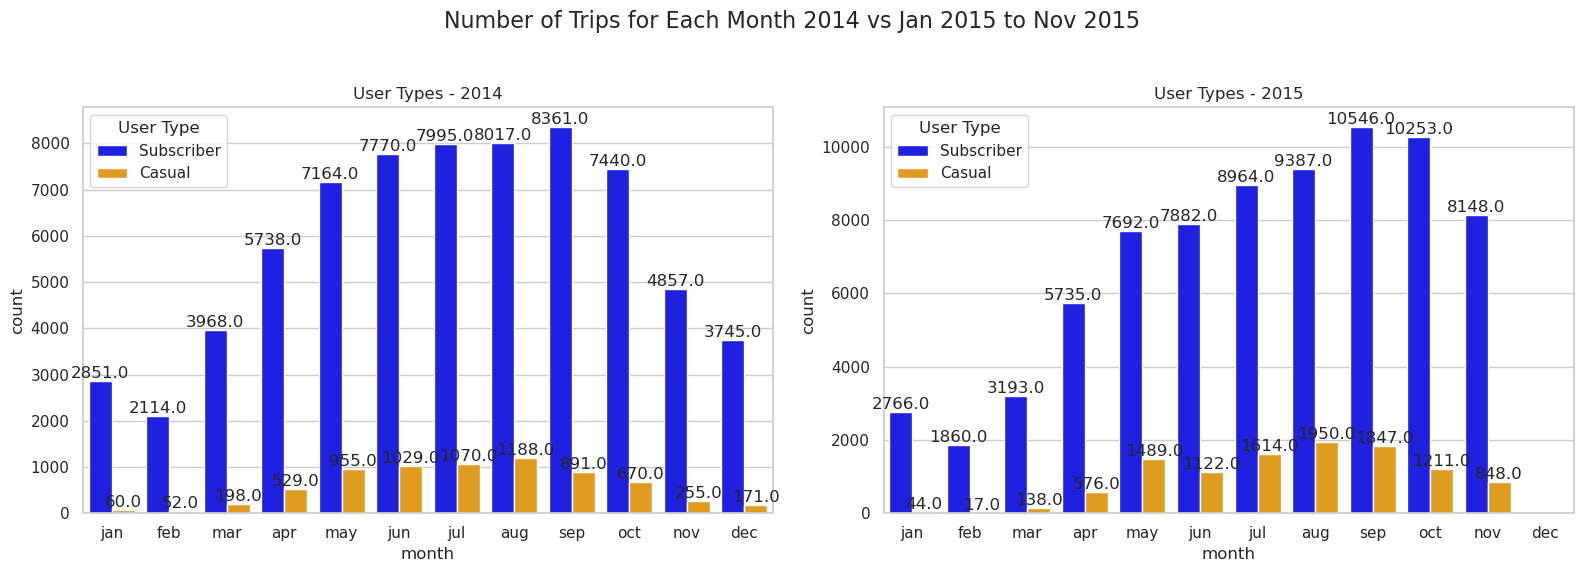

In [157]:
# Create two separate countplots for each year
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot countplot for 2014
ax_2014 = sns.countplot(x='month', hue='user_type', data=df_2014,
                        order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        palette={'Subscriber': 'blue', 'Casual': 'orange'},
                        ax=axes[0])
ax_2014.set_title('User Types - 2014')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2014
ax_2014.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Plot countplot for 2015
ax_2015 = sns.countplot(x='month', hue='user_type', data=df_2015,
                        order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        palette={'Subscriber': 'blue', 'Casual': 'orange'},
                        ax=axes[1])
ax_2015.set_title('User Types - 2015')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2015
ax_2015.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Add title and adjust spacing between subplots
plt.suptitle('Number of Trips for Each Month 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as '07_subs_vs_cas_2014_2015_200230731_bar_monthly.png'
#plt.savefig('03_subs_vs_cas_2014_2015_200230731_bar_monthly.png', dpi=100, bbox_inches="tight")

/tmp/ipykernel_32/3959972270.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2014 = sns.barplot(x='month', y='bike_id',  data=bikes_2014,
/tmp/ipykernel_32/3959972270.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2015 = sns.barplot(x='month', y='bike_id',  data=bikes_2015,


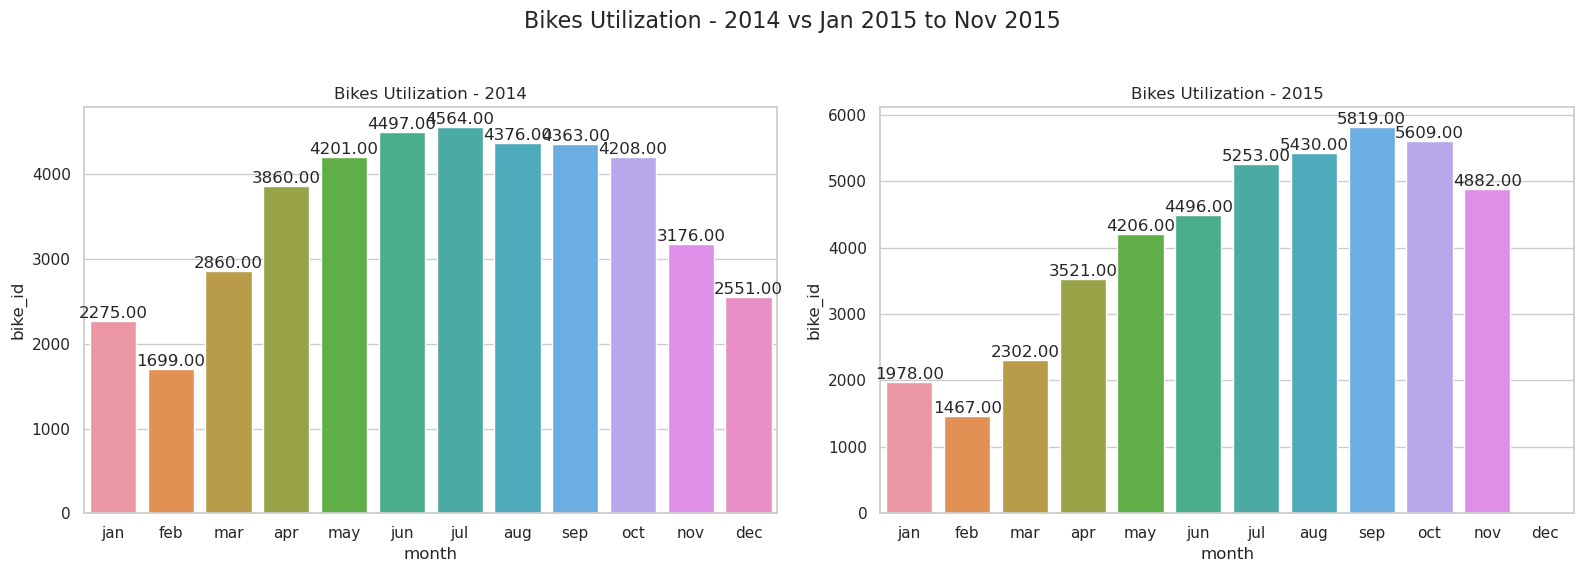

In [195]:
# Create 'month' col
#df_1['month'] = df_1['date'].dt.strftime('%b').str.lower()

# Create 'month' col
#df_1['year'] = df_1['date'].dt.strftime('%Y').str.lower()


# Convert 'year' column to datetime format
#df_1['year'] = pd.to_datetime(df_1['year'], format='%Y')

# Calculate the average trip duration for each 'user_type' and 'month' in 2014
bikes_2014 = df_1[df_1['year'] == '2014'].groupby(['month'])['bike_id'].nunique().reset_index()

# Calculate the average trip duration for each 'user_type' and 'month' in 2015
bikes_2015 = df_1[df_1['year'] == '2015'].groupby(['month'])['bike_id'].nunique().reset_index()

# Create two separate barplots for each year
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define the order of hue (user_type) for correct colors
#hue_order = ['Subscriber', 'Casual']

# Plot barplot for 2014
ax_2014 = sns.barplot(x='month', y='bike_id',  data=bikes_2014,
                      order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                      #palette={'Subscriber': 'blue', 'Casual': 'orange'},
                      #hue_order=hue_order,  # Set the hue order here
                      ci=None, ax=axes[0])
ax_2014.set_title('Bikes Utilization - 2014')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2014
#ax_2014.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Plot barplot for 2015
ax_2015 = sns.barplot(x='month', y='bike_id',  data=bikes_2015,
                      order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                      #palette={'Subscriber': 'blue', 'Casual': 'orange'},
                      #hue_order=hue_order,  # Set the hue order here
                      ci=None, ax=axes[1])
ax_2015.set_title('Bikes Utilization - 2015')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2015
#ax_2015.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Add title and adjust spacing between subplots
plt.suptitle('Bikes Utilization - 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as '03_subs_vs_cas_2014_2015_200230731_bar_monthly.png'
#plt.savefig('10_subs_vs_cas_2014_2015_200230731_bar_monthly_time.png', dpi=100, bbox_inches="tight")


/tmp/ipykernel_32/1906108634.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2014 = sns.barplot(x='month', y='bike_id', hue='user_type', data=bikes_2014,
/tmp/ipykernel_32/1906108634.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2015 = sns.barplot(x='month', y='bike_id', hue='user_type', data=bikes_2015,


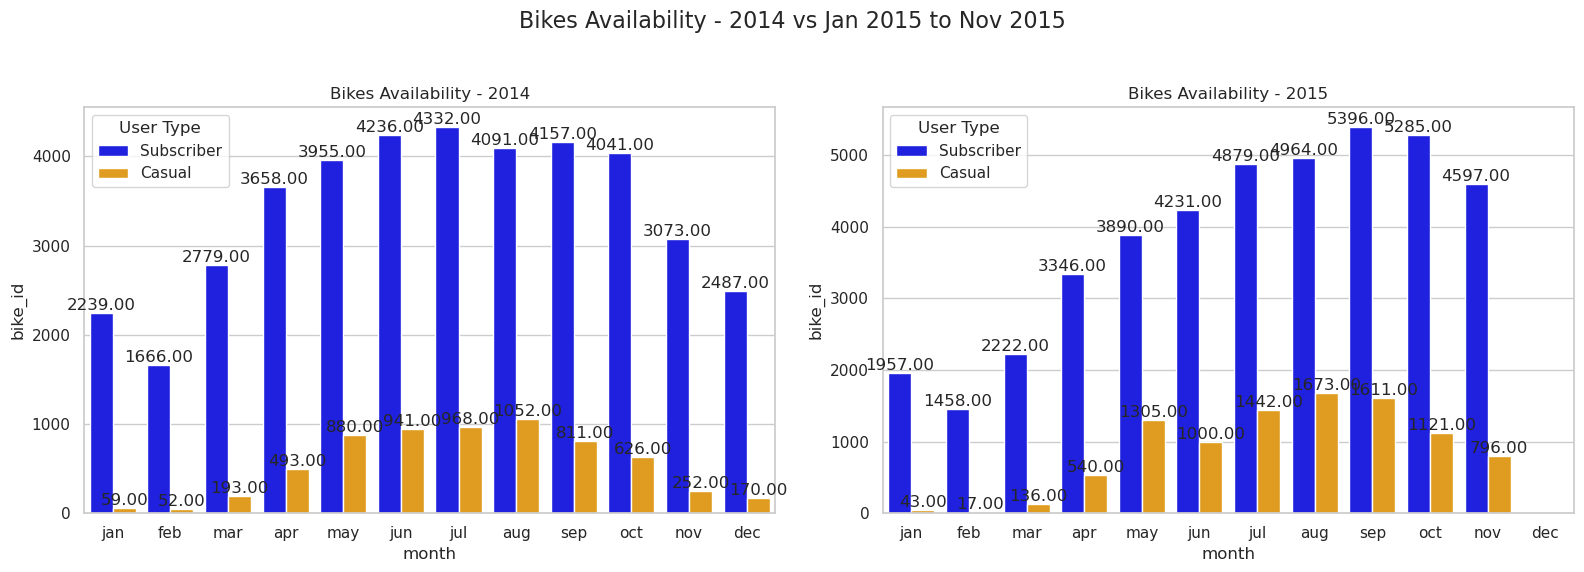

In [161]:
# Create 'month' col
#df_1['month'] = df_1['date'].dt.strftime('%b').str.lower()

# Create 'month' col
#df_1['year'] = df_1['date'].dt.strftime('%Y').str.lower()


# Convert 'year' column to datetime format
#df_1['year'] = pd.to_datetime(df_1['year'], format='%Y')

# Calculate the average trip duration for each 'user_type' and 'month' in 2014
bikes_2014 = df_1[df_1['year'] == '2014'].groupby(['month', 'user_type'])['bike_id'].nunique().reset_index()

# Calculate the average trip duration for each 'user_type' and 'month' in 2015
bikes_2015 = df_1[df_1['year'] == '2015'].groupby(['month', 'user_type'])['bike_id'].nunique().reset_index()

# Create two separate barplots for each year
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define the order of hue (user_type) for correct colors
hue_order = ['Subscriber', 'Casual']

# Plot barplot for 2014
ax_2014 = sns.barplot(x='month', y='bike_id', hue='user_type', data=bikes_2014,
                      order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                      palette={'Subscriber': 'blue', 'Casual': 'orange'},
                      hue_order=hue_order,  # Set the hue order here
                      ci=None, ax=axes[0])
ax_2014.set_title('Bikes Utilization - 2014')

# Add bar labels for each bar in 2014
for p in ax_2014.patches:
    height = p.get_height()
    ax_2014.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2014
ax_2014.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Plot barplot for 2015
ax_2015 = sns.barplot(x='month', y='bike_id', hue='user_type', data=bikes_2015,
                      order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                      palette={'Subscriber': 'blue', 'Casual': 'orange'},
                      hue_order=hue_order,  # Set the hue order here
                      ci=None, ax=axes[1])
ax_2015.set_title('Bikes Utilization - 2015')

# Add bar labels for each bar in 2015
for p in ax_2015.patches:
    height = p.get_height()
    ax_2015.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Show the legend for 2015
ax_2015.legend(title='User Type', labels=['Subscriber', 'Casual'])

# Add title and adjust spacing between subplots
plt.suptitle('Bikes Utilization - 2014 vs Jan 2015 to Nov 2015', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as '03_subs_vs_cas_2014_2015_200230731_bar_monthly.png'
#plt.savefig('10_subs_vs_cas_2014_2015_200230731_bar_monthly_time.png', dpi=100, bbox_inches="tight")


### September 2014 as sample

In [184]:
df_1[(df_1['year'] == '2014') & (df_1['month'] == "sep")]

user_type  bike_id        neighborhood_start borough_start  \
3145    Subscriber  20969.0              East Village     Manhattan   
3146    Subscriber  15432.0                  Union Sq     Manhattan   
3147    Subscriber  15434.0                 Hudson Sq     Manhattan   
3148    Subscriber  18439.0         Battery Park City     Manhattan   
3149    Subscriber  17567.0  Financial District North     Manhattan   
...            ...      ...                       ...           ...   
157369  Subscriber  16800.0               Murray Hill     Manhattan   
157370  Subscriber  14831.0               Murray Hill     Manhattan   
157371  Subscriber  19250.0               Murray Hill     Manhattan   
157372  Subscriber  21638.0       Little Italy/NoLiTa     Manhattan   
157373  Subscriber  20239.0                 Chinatown     Manhattan   

        trip_duration       date          start_time  start_station_id  \
3145         2.950000 2014-09-19 2014-09-19 02:07:22             403.0   
3146        23.833333 2014-09-19 2014-09-19 17:34:31             497.0   
3147         7.983333 2014-09-19 2014-09-19 22:43:40             347.0   
3148         7.366667 2014-09-19 2014-09-19 13:23:50             426.0   
3149        25.616667 2014-09-19 2014-09-19 18:20:52             415.0   
...               ...        ...                 ...               ...   
157369       7.150000 2014-09-08 2014-09-08 09:32:05             519.0   
157370      16.050000 2014-09-08 2014-09-08 19:18:13             519.0   
157371       3.533333 2014-09-08 2014-09-08 19:27:51             546.0   
157372       9.916667 2014-09-08 2014-09-08 19:57:29             151.0   
157373       7.533333 2014-09-08 2014-09-08 21:14:54             308.0   

               start_station_name  start_station_latitude  \
3145               E 2 St & 2 Ave               40.725029   
3146           E 17 St & Broadway               40.737050   
3147     W Houston St & Hudson St               40.728739   
3148        West St & Chambers St               40.717548   
3149    Pearl St & Hanover Square               40.704718   
...                           ...                     ...   
157369      Pershing Square North               40.751873   
157370      Pershing Square North               40.751873   
157371       E 30 St & Park Ave S               40.744449   
157372   Cleveland Pl & Spring St               40.721816   
157373    St James Pl & Oliver St               40.713079   

        start_station_longitude              neighborhood_end borough_end  \
3145                 -73.990697                  East Village   Manhattan   
3146                 -73.990093       Two Bridges/Seward Park   Manhattan   
3147                 -74.007488                  East Chelsea   Manhattan   
3148                 -74.013221                       Seaport   Manhattan   
3149                 -74.009260                  Clinton Hill    Brooklyn   
...                         ...                           ...         ...   
157369               -73.977706                Midtown Center   Manhattan   
157370               -73.977706                  East Village   Manhattan   
157371               -73.983035  Penn Station/Madison Sq West   Manhattan   
157372               -73.997203       Two Bridges/Seward Park   Manhattan   
157373               -73.998512       Greenwich Village South   Manhattan   

                 stop_time  end_station_id              end_station_name  \
3145   2014-09-19 02:10:19           237.0               E 11 St & 2 Ave   
3146   2014-09-19 17:58:21           307.0         Canal St & Rutgers St   
3147   2014-09-19 22:51:39           116.0               W 17 St & 8 Ave   
3148   2014-09-19 13:31:12           224.0         Spruce St & Nassau St   
3149   2014-09-19 18:46:29           384.0       Fulton St & Waverly Ave   
...                    ...             ...                           ...   
157369 2014-09-08 09:39:14           137.0         E 56 St & Madison Ave   
1

In [188]:
import pandas as pd

days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
weeks = range(35, 40)  # Week 

trip_counts_all_weeks = []

for week in weeks:
    trip_counts = []
    for day in days:
        filtered_df = df_1[(df_1['year'] == '2014') & (df_1['month'] == "sep") & (df_1['week'].astype(int)==week) & (df_1['day'] == day)]
        trip_count = filtered_df['user_type'].count()
        trip_counts.append(trip_count)
    trip_counts_all_weeks.append(trip_counts)

trip_counts_df = pd.DataFrame(trip_counts_all_weeks, columns=days)
trip_counts_df.insert(0, 'Week', weeks)

trip_counts_df


Week  monday  tuesday  wednesday  thursday  friday  saturday  sunday
0    35     223      345        320       353     349       245     274
1    36     338      328        369       343     359       156     266
2    37     336      257        361       373     325       273     286
3    38     314      378        364       147     346       272     256
4    39     342      354          0         0       0         0       0

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Please note:</b><p style = "font-family:Verdana; font-size:14px">As we analyze the data, we observe that in September 2014, the highest recorded trip count was 8,361, indicating the utilization of 4,363 bikes. Similarly, September 2015 saw 10,546 trips with 5,396 bikes in use. Membership has experienced significant growth, with figures climbing from around 89,296 in October 2014 to surpassing 120,000 members by 2015. The bike count has also increased from 6,000 in 2013 to 7,454 by September 2015. A crucial question arises: "Do we require more bikes?"
    <br>Delving into calculations, if we target a daily trip count of 9,000 trips per month in 2014 (peak in September), this translates to 300 trips daily. Consequently, a minimum of 3,000 bikes appears sufficient for the year. If we further break this down to an hourly basis—300 trips per day over 20 hours—we find that around 15 trips per hour per bike are needed. Utilizing the average time data, this implies that approximately 15 bikes per hour suffice. Considering a safety stock for backup bikes (given a lack of repair data), let's assume 30 bikes per hour, culminating in 600 bikes per day. This count stands twice as high as the actual data recorded in September 2014.
    <br>
    <b>Hence, while we possess a membership base of nearly 90,000 in October 2014, the trip data only reflects around 9,000 trips. This discrepancy underscores the necessity of user ID tracking to ascertain how many registered members are actively utilizing the bike-sharing service. Despite having close to 90,000 registered members, the actual trip count remains considerably lower, prompting a closer examination of user engagement and the factors affecting it.</b>
  <p>
</div>

In [153]:
df_2=df_1.copy()

In [154]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164370 entries, 0 to 168202
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_type                164370 non-null  object        
 1   bike_id                  164370 non-null  float64       
 2   neighborhood_start       164370 non-null  object        
 3   borough_start            164370 non-null  object        
 4   trip_duration            164370 non-null  float64       
 5   date                     164370 non-null  datetime64[ns]
 6   start_time               164370 non-null  datetime64[ns]
 7   start_station_id         164370 non-null  float64       
 8   start_station_name       164370 non-null  object        
 9   start_station_latitude   164370 non-null  float64       
 10  start_station_longitude  164370 non-null  float64       
 11  neighborhood_end         164370 non-null  object        
 12  borough_end     

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px"><b>In future analyses, we might delve deeper into neighborhood characterization, considering factors such as proximity to subway or other transportation stations, residential, commercial, recreational, and tourism areas. Additionally, since Citibike primarily involves "short rides," the distance will be determined in the data by trip duration which is the time taken from the start station to the stop station.</b><p>
</div>

# Define the Process
<hr>

## Voice of Customers (VoC)
<img style="display: block; margin: 0 auto;" src="https://i.imgur.com/ftF6Pps.png" width="750">
<div style = "font-family: Arial; font-size: 16px">
    To measure neighborhood awareness, perceptions, and experience with Citi Bike, Restoration, in partnership with DOHMH, developed an intercept survey over the summer 2015.The survey findings revealed that a significant majority of individuals in Bedford Stuyvesant (87%) were familiar with Citi Bike. However, only a minority of respondents (18%) had utilized the service. Surprisingly, nearly one third (32%) expressed disagreement with the notion that Citi Bike was "intended for people like me," despite a significant proportion (74%) indicating their preference for having a Citi Bike station near to their residences. Additionally, only 36% of residents reported cycling within the past year. Notably, there was minimal awareness (9%) of the pre-existing discounted annual membership option available to NYCHA residents.
</div>

<table style="color:black;
           display:fill;
           border-colapse: colapse;
           width: 100%;
           border: 1px solid black;
           border-collapse: collapse;
           border-style: solid;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
  <h3 style = "text-align:center">Table 1.2. SIPOC Analysis</h3>
  <tr>
    <th>Supplier (S)
    <th colspan="2">Input (I)</th>    
    <th colspan="4">Process (P)</th>
    <th colspan="2">Output (O)</th>
    <th colspan="2">Customer (C)</th>  
  </tr>
    <td>Citibike kiosk
    <br>Apps</td>
    <td colspan="2">Rent
        <ul>
            <li>Master card
            <li>Payment receipt
            <li>Key by inputing the pass code number or apps by scanning QR codes or inputing vehicle ID Number in apps. 
            <li>Bike park out and lock out(classic bikes and e-bikes)
        </ul></td> 
    <td style="background:LightSkyBlue;text-align:center">Pay for rent through kiosk or mobile apps</td>
    <td style="background:LightSkyBlue;text-align:center">Unlock it</td>
    <td style="background:LightSkyBlue;text-align:center">Ride it</td>
    <td style="background:LightSkyBlue">Park it </td>
    <td colspan="2" style="margin: auto; display:fill; word-wrap: break-word">
        <ul>
            <li>Travel report
            <li>Bike park in and lock in
        </ul>
    </td>
    <td colspan="2" style="margin: auto; display:fill; word-wrap: break-word">
        <ul>
            <li>Rider
            <li>Open dock in any station
        </ul>
    </td>
 </table>
<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">Discussion should be conducted with the process' owner</p>
</div>

## Stakeholder Analysis
<hr>
<span style ="font-family:Verdana; font-size:16px; text-align:justify">In this project we will only be mapping the stakeholders that were mentioned in articles or sources with high impacts and major role to the automatidata project.</span>

<h3 style = "text-align:center">Table 1.3. Stakeholder Analysis</h3>
<table style="color:black;
           display:fill;
           border-colapse: colapse;
           width: 100%;
           border: 1px solid black;
           border-collapse: collapse;
           border-style: solid;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
  
  <tr>
    <th>Stakeholders</th>
    <th>Role</th>
    <th colspan="2">Involvement</th>    
    <th>Power or Influence (H/M/L)</th>
    <th>Interest (H/M/L)</th>
    <th colspan="2">Engagement</th>  
  </tr>
  <tr>
    <td>Jamal Harris, Director, Customer Data
</td>
    <td style = "text-align:left">      
      Project sponsor 
    </td>
    <td colspan="2" style ="text-align:left">
    Makes high-level decisions; serves as team resource
    </td>
    <td style ="text-align:center">
      H 
    </td> 
    <td style ="text-align:center">
      L
    </td>
    <td colspan="2" style ="text-align:left">
      Communicate regularly, but not daily. Ask questions and give updates. 
    </td>
  </tr>
  <tr>
    <td>Sara Romero, VP, Marketing
      and Ernest Cox, VP, Product Development</td>
    <td style = "text-align:left">      
      Project owner 
    </td>
    <td colspan="2" style ="text-align:left">
     <ul>
         <li>advisory role and providing valid information
         <li>Implementation of preventive, diagnosis and treatment measures
         <li>Allow re-export of surplus imported data or any required items to support project
         <li>Formulation of the business requirements
        <li>Formulation and implementation of equitable distribution of execution
        </ul> 
    </td>
    <td style ="text-align:center">
      M 
    </td> 
    <td style ="text-align:center">
      H 
    </td>
    <td colspan="2" style ="text-align:left">
      <ul>
        <li>Informing and public education
        <li>Monitoring the proper implementation of interventions
        <li>Coordination in informing
        <li>Official information reference in the transportation management and
control
        <li>Training and consulting with other related organizations and institutions
        </ul> 
    </td>
  </tr>
  <tr>
    <td>Wahyu Ardhitama, Head of Data Analytics</td>
    <td style = "text-align:left">      
      Project leader 
    </td>
    <td colspan="2" style ="text-align:left">
     <ul>
      <li>Project-rules making and planning
     <li>Facilitate and synergy in inter-sectorial cooperation
     <li>Identifying problems and providing solutions in the form of executive
       approvals
     </ul> 
    </td>
    <td style ="text-align:center">
      M 
    </td> 
    <td style ="text-align:center">
      H 
    </td>
    <td colspan="2" style ="text-align:left">
       <ul>
      <li>Synergy and strengthening of various capabilities across the team and organization,
       directing and Mobilizing all capacities within the team.
      <li>Lead project from the start to clossing.
      </ul> 
    </td>
  </tr>
  
  
 </table>

 <h3 style = "text-align:center">Table 1.4. Project Charter</h3>
<table style="color:black;
           display:fill;
           border-colapse: colapse;
           width: 100%;
           border: 1px solid black;
           border-collapse: collapse;
           border-style: solid;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
  
  <tr>
    <th colspan ="4" style="text-align:center">Project NYC Citibike Business Plan</th>
  </tr>
    <tr>
    <th colspan ="4" style="text-align:center">2nd Aug 2023</th>
  </tr>
  <tr>
      <th colspan ="4" style="text-align:center">Document Status: <del>Draft</del> | In Review | <del>Approved</del></th>
  </tr>
  <tr>
      <th colspan ="4" style="text-align:center">Executive Summary</th>
  </tr>
  <tr>
      <td colspan ="4" style="text-align:center">develop a prediction model that predicts bike trip using location and time of day data.</td>
  </tr>
  <tr style ="background:LightSkyBlue;text-align:center">
      <td colspan ="2">Business Case</td>
      <td colspan ="2">Problem/Opportunity Statement</td>
  </tr>
 <tr style="text-align:left">
     <td colspan ="2">After the program's one-year anniversary in May 2014, membership experienced a decline from 105,355 in May to 96,318 in June. The downward trend persisted in July, leading to a total of 93,501 members. An audit conducted between May 2013 and May 2014 highlighted issues with irregular maintenance, poorly cleaned bicycles, and inadequate docking stations, all of which inconvenienced riders and hindered the system's growth. Furthermore, numerous complaints were received from customers.
<br>By October 2014, membership had further decreased to 89,286, resulting in an estimated loss of  ~\$1.53 millions (calculated based on a price of \$95 per membership). Fortunately, the executed improvement initiatives yielded positive results. Membership rebounded beyond the 2014 level, surpassing 120,000 members, which translates to an increase of over ~\$2.9 millions  (calculated at a price of \$95 per membership). With the introduction of a new price of $149, the total increase equates to \$4.5 millions. In addition, with the transition of the annual membership cost for NYHCA resident enrollment from an upfront payment of \$60 per year to a monthly fee of \$5,  it can be reasonably estimated (given the absence of specific financial data) that the initiatives have the potential to accumulate over \$2 million.</td>
      <td colspan ="2">Launched in 2013, by the end of that year, memberships had surged to 94,125, accompanied by a fleet of 6,000 bikes and 300 stations. Despite receiving numerous customer complaints about its services, Citi Bike went ahead and raised its annual membership fee from \$95 to \$149, which led to an anticipated decline in membership. Nevertheless, following a series of improvement initiatives as mentioned earlier, by September 2015, the fleet had expanded significantly, encompassing 7,454 Citi Bikes. This milestone represented a substantial advancement toward reaching the 2017 goal and the phase II expansion of Citibike. This new count constituted over 50% of the target, which aimed for 750 stations and 12,000 bikes by the conclusion of 2017. Furthermore, the count of stations had surged by 40.24% in comparison to the numbers from 2014. The team in New York City is dedicated to examining trips that are particularly susceptible to influences such as the distance between start/departure and end/destination stations, as well as the time of day. This analytical effort aims to bolster the company's strategies for enhancing performance.</td>  
  </tr>

 <tr style ="background:LightSkyBlue;text-align:center">
      <td colspan ="2">Goal Statement</td>
      <td colspan ="2">Deliverables (Key Results)</td>
 </tr>
 <tr style="text-align:left">
      <td colspan ="2">Primary metric:
     <ul>
         <li>Total trip
     </ul>
     Secondary Metric:
     <ul>
         <li>Average trip duration
         <li>Customer calls
     </ul>
     </td>
      <td colspan ="2">Primary Key Results:
     <ul>
         <li>Total number of trips
     </ul>
     Secondary Key Results:
     <ul>
         <li>Minutes
         <li>Calls per ride
     </ul>
     </td>
  </tr>
 
 <tr style ="background:LightSkyBlue;text-align:center">
      <td colspan ="2">Benefits, Cost, and Budget</td>
      <td colspan ="2">Scope and Exclusion</td>
 </tr>
 <tr style="text-align:left">
      <td colspan ="2">Benefits:
     <ul>
         <li>Increase number of trip and duration of ride
         <li>Customer satisfaction
     </ul>
     Costs:
     <ul>
         <li>Unservice/loss order
         <li>investment for new location and old location (bikes, kiosk, station, system, etc.)   
     </ul>
     Budget Needed:
           <span>TBD</span>
     </td>
      <td colspan ="2">In-Scope:
     <ul>
         <li>In area New York
         <li>Borough and neighborhood location   
         <li>2014 and 2015
     </ul>
     Out-of-Scope:
     <ul>
         <li>Revenue
         <li>Lean measure such as ,fastest processes, routes etc.
         <li>Bike types
         <li>Location characterization (commercial, residential, etc)
         <li>Supply and IT
         <li>Maintenance
         <li>Competitor
     </ul>
     </td>
  </tr>   
 
 <tr style ="background:LightSkyBlue;text-align:center">
      <td colspan ="2">Project Team</td>
      <td colspan ="2">Measuring Success</td>
 </tr>
 <tr style="text-align:left">
      <td colspan ="2"> 
     <ul>
         <li>Sponsor: Jamal Harris, Director, Customer Data
         <li>Owner: Sara Romero, VP, Marketing and Ernest Cox, VP, Product Development
         <li>Leader: Wahyu Ardhitama, Head of Data Analytics
         <li>Member: Nina Locklear, Director, Procurement, Adhira Patel, API Strategist, Megan Pirato, Data Warehousing Specialist, Rick Andersson, Manager, Data Governance, Tessa Blackwell, Data Analyst, Brianne Sand, Director, IT and Shareefah Hakimi, Project Manager
     </ul>
     </td>
  
  <td colspan ="2">Deliverables after solutions implementation:
     <ul>
         <li>Predict the neighborhood station to invest using area characterization(next)
         <li>Optimize total trip
         <li>Optimize season trip 
     </ul>
  </td>
  </tr>
  </table>

# Correlation

In [ ]:
df_2.select_dtypes(['object']).columns

In [ ]:
df_2.select_dtypes(['number']).columns

In [ ]:
# Select a subset of columns to visualize
columns_to_plot = ['trip_duration', 'zip_code_start', 'zip_code_end', 'distance_km']
#'temp','wdsp', 'prcp', 
#'fog', 'rain_drizzle', 'snow_ice_pellets', 
#'hail','thunder', 'tornado_funnel_cloud', 
#'am_rush', 'daytime','pm_rush', 'nighttime'

# Sample a fraction of the data (adjust the fraction as needed)
sample_fraction = 0.2  # You can adjust this value

# Randomly sample rows from the dataframe
sampled_df = df_2.sample(frac=sample_fraction, random_state=42)

# Set Seaborn's plotting parameters to speed up rendering
plot_kws = {"palette": "coolwarm", "alpha": 0.5}

# Create pair plots for the selected columns using the sampled data
#sns.set(style="ticks")
sns.pairplot(data=sampled_df, vars=columns_to_plot, hue="user_type", diag_kind="kde", plot_kws=plot_kws)


In [ ]:
# Select a subset of columns to visualize
#columns_to_plot = ['trip_duration', 'zip_code_start', 'zip_code_end', 'distance_km']
columns_to_plot =['temp','wdsp', 'prcp'] 
#'fog', 'rain_drizzle', 'snow_ice_pellets', 
#'hail','thunder', 'tornado_funnel_cloud', 
#'am_rush', 'daytime','pm_rush', 'nighttime'

# Sample a fraction of the data (adjust the fraction as needed)
sample_fraction = 0.2  # You can adjust this value

# Randomly sample rows from the dataframe
sampled_df = df_2.sample(frac=sample_fraction, random_state=42)

# Set Seaborn's plotting parameters to speed up rendering
plot_kws = {"palette": "coolwarm", "alpha": 0.5}

# Create pair plots for the selected columns using the sampled data
#sns.set(style="ticks")
sns.pairplot(data=sampled_df, vars=columns_to_plot, hue="user_type", diag_kind="kde", plot_kws=plot_kws)


In [ ]:
# Select a subset of columns to visualize
#columns_to_plot = ['trip_duration', 'zip_code_start', 'zip_code_end', 'distance_km']
#columns_to_plot =['temp','wdsp', 'prcp'] 
#columns_to_plot =['fog', 'rain_drizzle', 'snow_ice_pellets'] 
#'hail','thunder', 'tornado_funnel_cloud', 
columns_to_plot =['am_rush', 'daytime','pm_rush', 'nighttime']

# Sample a fraction of the data (adjust the fraction as needed)
sample_fraction = 0.2  # You can adjust this value

# Randomly sample rows from the dataframe
sampled_df = df_2.sample(frac=sample_fraction, random_state=42)

# Set Seaborn's plotting parameters to speed up rendering
plot_kws = {"palette": "coolwarm", "alpha": 0.5}

# Create pair plots for the selected columns using the sampled data
#sns.set(style="ticks")
sns.pairplot(data=sampled_df, vars=columns_to_plot, hue="user_type", diag_kind="kde", plot_kws=plot_kws)


In [ ]:
# Select a subset of columns to visualize
#columns_to_plot = ['trip_duration', 'zip_code_start', 'zip_code_end', 'distance_km']
#columns_to_plot =['temp','wdsp', 'prcp'] 
columns_to_plot =['fog', 'rain_drizzle', 'snow_ice_pellets','hail','thunder', 'tornado_funnel_cloud'] 
#columns_to_plot =['am_rush', 'daytime','pm_rush', 'nighttime']

# Sample a fraction of the data (adjust the fraction as needed)
sample_fraction = 0.2  # You can adjust this value

# Randomly sample rows from the dataframe
sampled_df = df_2.sample(frac=sample_fraction, random_state=42)

# Set Seaborn's plotting parameters to speed up rendering
plot_kws = {"palette": "coolwarm", "alpha": 0.5}

# Create pair plots for the selected columns using the sampled data
#sns.set(style="ticks")
sns.pairplot(data=sampled_df, vars=columns_to_plot, hue="user_type", diag_kind="kde", plot_kws=plot_kws)


### Trip duration and distance km

In [ ]:
# Filter the DataFrame for user_type == "Subscriber"
#filtered_df = df_2[df_2['user_type'] == 'Subscriber']

# Create a scatter plot of trip_duration and distance_km, with a line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x=df_2['distance_km'], y=df_2['trip_duration'], scatter_kws={'s': 10, 'alpha': 0.5, 'color': sns.color_palette('Set1')[0]}, line_kws={'color': sns.color_palette('Set1')[1]})
plt.title('Trip Duration vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration')
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.grid(True)

#### Choose user type as dependant variable

In [ ]:
# Assuming df is your DataFrame
df_2.to_csv('nyc_citibike_trip_2014_2015_20230801_v2.csv', index=False)

In [ ]:
df_3=df_2.copy()

In [ ]:
df_3['user_type'] = (df_3['user_type'] == "Subscriber")
df_3['user_type'] = df_3['user_type'].astype(int)

In [ ]:
df_3['user_type'].value_counts()

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Results:</b><p style = "font-family:Verdana; font-size:14px">The 'user_type' column contains binary values: 0 for 'Casual' and 1 for 'Subscriber'. Previously, we elaborated on the trip duration, categorizing it as a 'short ride' where too far for a walk but too close for a taxi, a car or a bus. This mode of transportation is more similar to taking a bus from one station to another and differs from using a taxi.</p>

In [ ]:
# Drop Assign the result back to df1.
drop_cols = ['bike_id', 'start_time','start_station_id', 'start_station_latitude', 'start_station_longitude','stop_time',
            'end_station_id', 'end_station_latitude', 'end_station_longitude','birth_year','age']
df_3 = df_3.drop(drop_cols, axis=1)

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Results:</b><p style = "font-family:Verdana; font-size:14px">Drop categorical features would involve one-hot encoding, which would add a bunch of columns to the dataset, adding model complexity and leading to overfitting, this will also help processing time.</p>
</div>

In [ ]:
df_3.corr()['user_type'].sort_values(ascending=False).iloc[1:]

In [ ]:
plt.figure(figsize=(12,6))
df_3.corr()['user_type'].sort_values(ascending=False).iloc[1:].plot(kind='bar')

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px"><b>There is a strong correlation with the 'user_type' when the hours are during rush hours in the morning, evening, and nighttime, as well as with weather conditions such as snow, rain, fog, wind speed, and precipitation. All the values are close to 0 indicate a weak or no correlation.</b><p>
</div>

#### Choose over time based on price structure

<table style="color:black;
           display:fill;
           border-colapse: colapse;
           width: 100%;
           border: 1px solid black;
           border-collapse: collapse;
           border-style: solid;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
  <h3 style = "text-align:center">Table 1.5. 2015 Price Structure</h3>
  <tr>
    <th>Description</th>
    <th>Time Limit</th>    
    <th>Classic Bike</th>
    <th>E-Bike</th>
    <th>Additional Time</th>  
  </tr>
  <tr>
    <td>Annual Pass (1 year unlimited)</td>
    <td>45 mins</td> 
    <td style="background:LightSkyBlue;text-align:center">\$149 (10% off with Citibank card)</td>
    <td>+\$0.1/min</td>
    <td style="margin: auto; display:fill; word-wrap: break-word">+\$0.1/min</td>
 </tr>
  <tr>
    <td>Day Pass</td>
    <td>30 mins</td> 
    <td style="background:LightSkyBlue;text-align:center">\$9.95</td>
    <td>+\$0.1/min</td>
    <td style="margin: auto; display:fill; word-wrap: break-word">+\$4 per 15 mins</td>
 </tr>
 <tr>
    <td>Seven Day Pass</td>
    <td>30 mins</td> 
    <td style="background:LightSkyBlue;text-align:center">\$25</td>
    <td>+\$0.23/min</td>
    <td style="margin: auto; display:fill; word-wrap: break-word">+\$4 per 15 mins</td>
 </tr>
 </table>
<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">. The table might not reflect the exact pricing structure as in 2015. Therefore, we aim to introduce a concept of overtime services (referred to as "ot" hereafter). For subscribers, overtime is considered when the trip duration exceeds 45 minutes, while for casual users, overtime is applicable when the trip duration surpasses 30 minutes within a single day.</p>
</div>

#### Create the represent bins

#### Ot_30

In [ ]:
# Define 'ot_30()' function for overtime of 30 minutes
def ot_30(row):
    if row['trip_duration']>=30 and row['user_type'] == 'Casual':
        value = 1
    else:
        value = 0
    return value

#### Ot_45

In [ ]:
# Define 'ot_40()' function for overtime of 40 minutes
def ot_45(row):
    if row['trip_duration']>=45 and row['user_type'] == 'Subscriber':
        value = 1
    else:
        value = 0
    return value

In [ ]:
df_3['ot_30'] = df_3.apply(ot_30, axis=1)
df_3['ot_45'] = df_3.apply(ot_45, axis=1)

In [ ]:
df_3.head()

In [ ]:
plt.figure(figsize=(12,6))
df_3.corr()['user_type'].sort_values(ascending=False).iloc[1:].plot(kind='bar')

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_3.corr(), annot=True, cmap='viridis', annot_kws={"size": 8})
plt.tight_layout()

#### Explore features

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Features Distribution in Trip', fontsize=16)

# Feature1
sns.boxplot(ax=axes[0, 0], x='user_type', y='trip_duration', data=df_3, palette="magma", hue='user_type')
axes[0, 0].set_title('Trip Duration')

# Feature2
sns.boxplot(ax=axes[0, 1], x='user_type', y='distance_km', data=df_3, palette="magma", hue='user_type')
axes[0, 1].set_title('Distance (km)')

# Feature3
sns.countplot(ax=axes[0, 2], x='user_type', data=df_3, palette="magma")
axes[0, 2].set_title('User Type Count')

# Feature1
sns.kdeplot(ax=axes[1, 0], data=df_3, x='trip_duration', hue='user_type', palette="magma")
axes[1, 0].set_title('Trip Duration KDE')

# Feature2
sns.kdeplot(ax=axes[1, 1], data=df_3, x='distance_km', hue='user_type', palette="magma")
axes[1, 1].set_title('Distance KDE')

# Feature3
sns.countplot(ax=axes[1, 2], x='user_type', data=df_3, palette="magma")
axes[1, 2].set_title('User Type Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Features Distribution in Trip', fontsize=16)

# Feature1
sns.boxplot(ax=axes[0, 0], x='user_type', y='zip_code_start', data=df_3, palette="magma")
axes[0, 0].set_title('zip_code_start')

# Feature2
sns.boxplot(ax=axes[0, 1], x='user_type', y='zip_code_end', data=df_3, palette="magma")
axes[0, 1].set_title('zip_code_end')

# Feature3
sns.boxplot(ax=axes[0, 2], x='user_type', y='pm_rush', data=df_3, palette="magma")
axes[0, 2].set_title('pm_rush')

# Feature1
sns.kdeplot(ax=axes[1, 0], data=df_3, x='zip_code_start', hue='user_type', palette="magma")
axes[1, 0].set_title('zip_code_start')

# Feature2
sns.kdeplot(ax=axes[1, 1], data=df_3, x='zip_code_end', hue='user_type', palette="magma")
axes[1, 1].set_title('zip_code_end')

# Feature3
sns.kdeplot(ax=axes[1, 2], data=df_3, x='pm_rush', hue='user_type', palette="magma")
axes[1, 2].set_title('pm_rush')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
fig.suptitle('Features Distribution in Trip', fontsize=16)

# Feature1
sns.boxplot(ax=axes[0, 0], x='user_type', y='am_rush', data=df_3, palette="magma")
axes[0, 0].set_title('am_rush')

# Feature2
sns.boxplot(ax=axes[0, 1], x='user_type', y='daytime', data=df_3, palette="magma")
axes[0, 1].set_title('daytime')

# Feature3
sns.boxplot(ax=axes[0, 2], x='user_type', y='nighttime', data=df_3, palette="magma")
axes[0, 2].set_title('nighttime')

# Feature1
sns.kdeplot(ax=axes[1, 0], data=df_3, x='am_rush', hue='user_type', palette="magma")
axes[1, 0].set_title('am_rush')

# Feature2
sns.kdeplot(ax=axes[1, 1], data=df_3, x='daytime', hue='user_type', palette="magma")
axes[1, 1].set_title('daytime')

# Feature3
sns.kdeplot(ax=axes[1, 2], data=df_3, x='nighttime', hue='user_type', palette="magma")
axes[1, 2].set_title('nighttime')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Features Distribution in Trip', fontsize=16)

# Feature1
sns.boxplot(ax=axes[0, 0], x='user_type', y='temp', data=df_3, palette="magma")
axes[0, 0].set_title('Temperature')

# Feature2
sns.boxplot(ax=axes[0, 1], x='user_type', y='wdsp', data=df_3, palette="magma")
axes[0, 1].set_title('Wind Speed')

# Feature3
sns.boxplot(ax=axes[0, 2], x='user_type', y='prcp', data=df_3, palette="magma")
axes[0, 2].set_title('Precipitation')

# Feature1
sns.kdeplot(ax=axes[1, 0], data=df_3, x='temp', hue='user_type', palette="magma")
axes[1, 0].set_title('Temperature KDE')

# Feature2
sns.kdeplot(ax=axes[1, 1], data=df_3, x='wdsp', hue='user_type', palette="magma")
axes[1, 1].set_title('Wind Speed KDE')

# Feature3
sns.kdeplot(ax=axes[1, 2], data=df_3, x='prcp', hue='user_type', palette="magma")
axes[1, 2].set_title('Precipitation KDE')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Features Distribution in Trip',fontsize=16)

# Feature1
sns.boxplot(ax=axes[0, 0], x='user_type', y='fog', data=df_3, palette="magma")
axes[0, 0].set_title('fog')

# Feature2
sns.boxplot(ax=axes[0, 1], x='user_type', y='rain_drizzle', data=df_3, palette="magma")
axes[0, 1].set_title('rain_drizzle')

# Feature3
sns.boxplot(ax=axes[0, 2], x='user_type', y='prcp', data=df_3, palette="magma")
axes[0, 2].set_title('prcp')

# Feature1
sns.kdeplot(ax=axes[1, 0], data=df_3, x='fog', hue='user_type', palette="magma")
axes[1, 0].set_title('fog')

# Feature2
sns.kdeplot(ax=axes[1, 1], data=df_3, x='rain_drizzle', hue='user_type', palette="magma")
axes[1, 1].set_title('rain_drizzle')

# Feature3
sns.kdeplot(ax=axes[1, 2], data=df_3, x='snow_ice_pellets', hue='user_type', palette="magma")
axes[1, 2].set_title('snow_ice_pellets')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#### Choose the features to create the model

In [ ]:
df_3.select_dtypes(['object']).columns

In [ ]:
# Drop Assign the result back to df1.
drop_cols = ['borough_start', 'start_station_name','borough_end', 'end_station_name','day_groups', 'week', 'month']
df_3 = df_3.drop(drop_cols, axis=1)

In [ ]:
df_3.select_dtypes(['number']).columns

In [ ]:
# Drop Assign the result back to df1.
drop_cols = ['zip_code_start', 'zip_code_end']
df_3 = df_3.drop(drop_cols, axis=1)

#### Create dummies

In [ ]:
# Apply one-hot encoding
df_dummy = pd.get_dummies(df_3)

In [ ]:
df_dummy.head()

In [ ]:
# Drop Assign the result back to df1.
drop_cols = ['date']
df_dummy = df_dummy.drop(drop_cols, axis=1)

# Final Checkpoint

In [ ]:
# Assuming df is your DataFrame
df_dummy.to_csv('nyc_citibike_trip_2014_2015_20230801_v3.csv', index=False)

In [ ]:
from IPython.display import display, HTML
# Link HTML files for pages
output_file_01 = "https://www.kaggle.com/code/wahyuardhitama/proj005-p01-nyc-citibike-20230731"
output_file_03 = "https://www.kaggle.com/code/wahyuardhitama/proj005-ml-models-p03-nyc-citibike-20230824"

# Display links to the saved HTML files
display(HTML(f"<p style='font-size: 18px;'>Back to <a href='{output_file_01}' target='_blank' style='font-size: 18px;'>P01 </a>or go to <a href='{output_file_03}' target='_blank' style='font-size: 18px;'>P03 </a></p>"))

<img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50"><div style = "font-family: Arial; font-size: 16px">
    <h1>Execute</h1></div>

## Conclussion
<hr>

<div class="alert alert-block alert-success" style="font-family:verdana; font-size:14px">
<ol>The objectives in the project as mentioned are driven by Customer's insight (Voice of Customers).
<li> Expand to the east with priority near the top trip neighborhood stations and explore the character of the top locations. The Pareto analysis reveals that the top 80% of trip neighborhoods constitute around 50% of all neighborhoods in 2015.
<li>The growth observed in 2015 demonstrates a clear seasonality pattern, characterized by a gradual rise during the summer months, reaching its peak in September during the fall, and subsequently experiencing a gradual decline. This trend allows us to concentrate on medium to large maintenance activities during the slower seasons. These maintenance activities could include workshop repairs, strategic planning, or acquiring new assets. The execution of these maintenance efforts can be initiated after the winter period, just before the onset of the summer season when the number of riders is expected to rise. This is an opportune time to implement on-the-spot repairs as needed.
<li>Allocate resources for repair and maintenance on-site, with a particular focus on quality checks in top trip areas during off-peak hours.
<li>Establish initiatives for safe cycling, including safety training and education, distribution of safety equipment, and related endeavors.
<li>Foster community partnerships and programs, such as bike ambassadors, youth and family engagement, grants for low-income individuals, etc.
<li>Hire both seasonal and permanent staff members who can actively engage with communities and contribute to the organization's objectives.
<li>Implement marketing and promotional awareness campaigns, such as #Bike4Youth and bike health events, as well as prominently displaying the NYCHA residents rate $5 per month at stations.
<li><ul>The feature selection and engineering:
<li>The dataset includes string features for both neighborhood start and neighborhood end, encompassing 70 neighborhoods each. However, incorporating these features adds a substantial number of columns to the dataset, thereby increasing model complexity and the risk of overfitting. As a result, establishing priorities which hopefully are the most obvious ones were generated during the first round of modeling. Feature retention is essential for both improving processing time and mitigating overfitting. Consequently, we have made the decision to exclude certain location-related details such as borough, station name, and zip code. These exclusions are based on their similarity in purpose and intent to other location points within the dataset.
<li>Our augmentation encompasses the inclusion of several new columns: hours classification, am rush, day time, pm rush, and night time. Additionally, we've introduced age group, month season, day and service overtime columns.
<li>Other avenues of feature engineering remain unexplored. For instance, we could contemplate the creation of three novel columns, categorizing trip distances as short, medium, or far. Also, we can distinct the bike id into e-bike and reg-bike columns. Moreover, leveraging Pareto data, we can stratify trips into quartiles: the top 25% as high trips, the middle 50% as medium trips, the subsequent 80% as low trips, and any beyond the 80% threshold as developmental trips. 
<br>
As also mentioned earlier, the availability of user IDs allows us to categorize bikers into distinct groups such as platinum, frequent, high, medium, and low bikers. <b>This approach underscores the importance of user ID tracking, enabling us to determine the precise number of registered members who actively engage with the bike-sharing service. This, in turn, aids us in determining the optimal allocation of bike investments based on the observed demand patterns. Furthermore, we can conduct surveys to gain insights by sampling from the members, determining whether it is the demand or supply side that requires attention and adjustments. </b> This approach unlocks further potential for feature refinement.</ul>
<br><br>
</div>